In [1966]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import torch
from torch.utils.data import Dataset
import torchvision
import torchvision.transforms as transforms

# Q1.

In [1114]:
# Data download and preprocessing

DOWNLOAD_MNIST = True # If already download , set as False
train_data = torchvision.datasets.MNIST(
root ='./ mnist /',
train =True , # this is training data
# transform = torchvision . transforms . ToTensor () ,
download = DOWNLOAD_MNIST ,)
test_data = torchvision . datasets . MNIST ( root ='./ mnist /', train = False )

# change the features to numpy
X_train = train_data.train_data.numpy()
X_test = test_data.test_data.numpy()

# change the labels to numpy
Y_train = train_data.train_labels.numpy()
Y_test = test_data.test_labels.numpy()

/Users/fuwang/opt/anaconda3/lib/python3.9/site-packages/torchvision/datasets/mnist.py:75: UserWarning: train_data has been renamed data
  warnings.warn("train_data has been renamed data")
/Users/fuwang/opt/anaconda3/lib/python3.9/site-packages/torchvision/datasets/mnist.py:80: UserWarning: test_data has been renamed data
  warnings.warn("test_data has been renamed data")
/Users/fuwang/opt/anaconda3/lib/python3.9/site-packages/torchvision/datasets/mnist.py:65: UserWarning: train_labels has been renamed targets
  warnings.warn("train_labels has been renamed targets")
/Users/fuwang/opt/anaconda3/lib/python3.9/site-packages/torchvision/datasets/mnist.py:70: UserWarning: test_labels has been renamed targets
  warnings.warn("test_labels has been renamed targets")


# Q2.

## (a)

The label in Y_train is 5


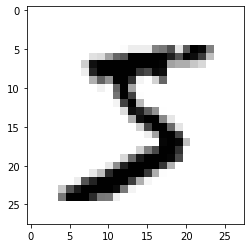

In [1097]:
fig, ax = plt.subplots(1,1)
plottable_image = np.reshape(X_train[0], (28, 28))
ax.imshow(plottable_image, cmap='gray_r')
print('The label in Y_train is', Y_train[0])

## (b)

In [1098]:
X_train.shape

(60000, 28, 28)

In [1099]:
X_test.shape

(10000, 28, 28)

In [1100]:
def NormalizeData(data):
    return (data - np.min(data)) / (np.max(data) - np.min(data))

In [1101]:
x_test_normal = NormalizeData(X_test)

In [1102]:
x_train_normal = NormalizeData(X_train)

## (c)

In [1103]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder

In [1104]:
# Label Encoding
labelencoder = LabelEncoder()
Y_train_label = labelencoder.fit_transform(np.array(Y_train))

# One-Hot Encoder
enc = OneHotEncoder(sparse = False,handle_unknown='ignore')
Y_train_encode = enc.fit_transform(Y_train_label.reshape(-1,1))

In [1105]:
print(Y_train_encode)

[[0. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]]


In [12]:
Y_test_label = labelencoder.fit_transform(np.array(Y_test))
Y_test_encode = enc.fit_transform(Y_test_label.reshape(-1,1))

In [13]:
print(Y_test_encode)

[[0. 0. 0. ... 1. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


## Benefits

One hot encoding makes our training data more useful and expressive, and it can be rescaled easily. By using numeric values, we more easily determine a probability for our values. In particular, one hot encoding is used for our output values, since it provides more nuanced predictions than single labels.

Determining the state has a low and constant cost of accessing one flip-flop

Changing the state has the constant cost of accessing two flip-flops

Easy to design and modify

Easy to detect illegal states

Using an one-hot encoding typically allows a state machine to run at a faster clock rate than any other encoding of that state machine

# Q3.

## (a)

### KNN

In [14]:
from sklearn.neighbors import KNeighborsClassifier
from mlxtend.plotting import plot_decision_regions

In [15]:
trainsamples, nx_train, ny_train = x_train_normal.shape
X_train_data = x_train_normal.reshape((trainsamples,nx_train*ny_train))

In [16]:
testsample, nx_test,ny_test = x_test_normal.shape
X_test_data = x_test_normal.reshape((testsample,nx_test*ny_test))

In [17]:
knn = KNeighborsClassifier(n_neighbors=10)
knn.fit(X_train_data,Y_train_encode)

KNeighborsClassifier(n_neighbors=10)

In [18]:
knn.score(X_test_data,Y_test_encode)

0.9558

In [19]:
print(f'Test error for KNN Alogrithm is {round(1-0.9558,4)*100}%')

Test error for KNN Alogrithm is 4.42%


Here, the test error for KNN is out perform than what we have in the report (5%)

### Adaboost

In [20]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier

In [21]:
treebase = DecisionTreeClassifier(criterion='entropy',max_depth=15)

In [22]:
ada_clf = AdaBoostClassifier(n_estimators=100,learning_rate=0.3, base_estimator=treebase)

In [23]:
ada_clf.fit(X_train_data,Y_train_label)

AdaBoostClassifier(base_estimator=DecisionTreeClassifier(criterion='entropy',
                                                         max_depth=15),
                   learning_rate=0.3, n_estimators=100)

In [24]:
ada_clf.score(X_test_data,Y_test_label)

0.9644

In [25]:
print(f'Test error for AdaBoost Alogrithm is {round((1-0.9659)*100,3)}%')

Test error for AdaBoost Alogrithm is 3.41%


### SVM

In [26]:
from sklearn.svm import SVC

In [27]:
svm = SVC(kernel='rbf',cache_size=500)

In [28]:
svm.fit(X_train_data,Y_train_label)

SVC(cache_size=500)

In [29]:
svm.score(X_test_data,Y_test_label)

0.9792

In [30]:
print(f'Test error for SVM Alogrithm is {round((1-0.9799)*100,3)}%')

Test error for SVM Alogrithm is 2.01%


Here, the test error for SVM is higher than what we have in the report (1.4%). This happens may due to the choice of different random state that some train splits have a better performance than the others.

## (b)

### RandomForest

In [31]:
from sklearn.ensemble import RandomForestClassifier

In [32]:
rf_clf = RandomForestClassifier(bootstrap=True, max_depth=30,
                      max_features='sqrt', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=5,
                      min_weight_fraction_leaf=0.0, n_estimators=1400,
                      n_jobs=None, oob_score=False, random_state=42, verbose=0,
                      warm_start=False)
rf_clf.fit(X_train_data,Y_train_label)

RandomForestClassifier(max_depth=30, max_features='sqrt', min_samples_split=5,
                       n_estimators=1400, random_state=42)

In [33]:
rf_clf.score(X_test_data,Y_test_label)

0.9717

In [39]:
print('test set accuracy(Random Forest): 0.9717')

test set accuracy(Random Forest): 0.9717


In [35]:
from sklearn.model_selection import cross_val_score

### GridSearchCV with Logistic Regression

In [36]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

In [37]:
pipe1 = Pipeline([('pca',PCA(n_components=2)),                  # reduce dimensions
                 ('lr',LogisticRegression(solver='saga',
                                          max_iter=1000)),  # classifier
                ])

In [42]:
X_trainnew =[]
X_testnew =[]
for i in range(len(x_train_normal)):
    X_trainnew.append(x_train_normal[i].flatten())
    
for i in range(len(x_test_normal)):
    X_testnew.append(x_test_normal[i].flatten())
# Set it as array
X_trainnew = np.array(X_trainnew)
X_testnew = np.array(X_testnew)

In [43]:
params1 = {'pca__n_components':[2,10,20,30,40,50],
          'lr__penalty':['l1','l2'],
          'lr__C':[.01,1,10,100]}

gscv = GridSearchCV(pipe1, params1, cv=3).fit(X_trainnew,Y_train_label)

gscv.best_params_

/Users/fuwang/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
/Users/fuwang/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
/Users/fuwang/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
/Users/fuwang/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
/Users/fuwang/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sa

{'lr__C': 10, 'lr__penalty': 'l2', 'pca__n_components': 50}

In [44]:
score = gscv.score(X_testnew,Y_test_label)
print(f'test set accuracy(Logistic Regression): {score:0.3f}')

test set accuracy(Logistic Regression): 0.912


### Using CNN 

In [48]:
import tensorflow as tf
from collections import deque
from tensorflow.keras import Input
from tensorflow.keras import layers,Model

In [50]:
model = tf.keras.Sequential()
model.add(layers.Flatten(input_shape = [28,28]))
tf.keras.layers.Conv2D(16,(3,3),padding = 'same', activation = 'relu')
tf.keras.layers.Conv2D(32,(7,7),padding = 'same', activation = 'softmax')
model.add(tf.keras.layers.Dense(units = 250, activation = 'relu'))
model.add(tf.keras.layers.Dense(units =  250, activation = 'softmax'))
model.compile(optimizer = "Adam", loss = "sparse_categorical_crossentropy",metrics = ['accuracy'])
history = model.fit(x_train_normal,Y_train_label, epochs = 20,validation_data = 0)
model.evaluate(x_test_normal,Y_test_label)
              

Epoch 1/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2705 - accuracy: 0.9258
Epoch 2/20
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1028 - accuracy: 0.9702
Epoch 3/20
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0697 - accuracy: 0.9785
Epoch 4/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0510 - accuracy: 0.9842
Epoch 5/20
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0382 - accuracy: 0.9882
Epoch 6/20
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0282 - accuracy: 0.9909
Epoch 7/20
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0230 - accuracy: 0.9932
Epoch 8/20
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0182 - accuracy: 0.9943
Epoch 9/20
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0146 - accuracy: 0.9954
Epoch 10/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.011

[0.09960538148880005, 0.9807999730110168]

In [51]:
print(f'Test error for CNN Alogrithm is {round((1-0.9807000160217285)*100,3)}%')

Test error for CNN Alogrithm is 1.93%


Here, by using CNN Algotithm, the test error finally out perform all three of the classifier I
implemented in part 2(a)

# Q4.

## 3. ANN

### (a) & (b)

The first plot is the average training/test cross-entropy error vs number of epochs

The second plot is the classification error (in percentage) vs. number of epochs,

In [1812]:
import torch
import torch.nn as nn
import torch.nn.functional as F          # adds some efficiency
from torch.utils.data import DataLoader  # lets us load data in batches
from torchvision import datasets, transforms
from matplotlib.pyplot import figure



In [1813]:
transform = transforms.ToTensor()

In [1814]:
train_data = datasets.MNIST(root='../Data', train=True, download=True, transform=transform)
train_data
test_data = datasets.MNIST(root='../Data', train=False, download=True, transform=transform)
test_data

Dataset MNIST
    Number of datapoints: 10000
    Root location: ../Data
    Split: Test
    StandardTransform
Transform: ToTensor()

In [1815]:
class Model(nn.Module):
    
    def __init__(self, in_features = 784, h1 = 100, out_features = 10):
        # one single layer neural network
        super().__init__()
        self.fc1 = nn.Linear(in_features,h1)
        self.out = nn.Linear(h1,out_features)
    
    def forward(self,x):
        
        x = F.relu(self.fc1(x))
        x = self.out(x)
        
        return F.log_softmax(x, dim=1) 

In [1816]:
# initialize the model we defined and define the loss 
model = Model()
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.1)

In [1817]:
model

Model(
  (fc1): Linear(in_features=784, out_features=100, bias=True)
  (out): Linear(in_features=100, out_features=10, bias=True)
)

In [1818]:
torch.manual_seed(101)  # for reproduce 

train_loader = DataLoader(train_data, batch_size=100, shuffle=True)

test_loader = DataLoader(test_data, batch_size=500, shuffle=False)

In [1819]:
# 1st trainning
import time
start_time = time.time()

torch.manual_seed(42)
epochs = 150
train_losses = []
test_losses = []
train_correct = []
test_correct = []

for i in range(epochs):
    trn_corr = 0
    tst_corr = 0
    
    # Run the training batches
    for b, (X_train, y_train) in enumerate(train_loader):
        
        b+=1
        
        # Apply the model
        y_pred = model(X_train.view(100, -1))  # Here we flatten X_train
        loss = criterion(y_pred, y_train)
 
        # Tally the number of correct predictions
        predicted = torch.max(y_pred.data, 1)[1]
        batch_corr = (predicted == y_train).sum()
        trn_corr += batch_corr
        
        # Update parameters
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        # Print interim results
        if b%200 == 0 and i%30 == 0:
            print(f'epoch: {i:2}  batch: {b:4} [{100*b:6}/60000]  loss: {loss.item():10.8f}  \
accuracy: {trn_corr.item()*100/(100*b):7.3f}%')
    
    # Update train loss & accuracy for the epoch
    train_losses.append(loss)
    train_correct.append(trn_corr)
        
    # Run the testing batches
    with torch.no_grad():
        for b, (X_test, y_test) in enumerate(test_loader):

            # Apply the model
            y_val = model(X_test.view(500, -1))  # Here we flatten X_test

            # Tally the number of correct predictions
            predicted = torch.max(y_val.data, 1)[1] 
            tst_corr += (predicted == y_test).sum()
    
    # Update test loss & accuracy for the epoch
    loss = criterion(y_val, y_test)
    test_losses.append(loss)
    test_correct.append(tst_corr)
        
print(f'\nDuration: {time.time() - start_time:.0f} seconds') # print the time elapsed    

epoch:  0  batch:  200 [ 20000/60000]  loss: 0.39356124  accuracy:  79.700%
epoch:  0  batch:  400 [ 40000/60000]  loss: 0.33373317  accuracy:  84.562%
epoch:  0  batch:  600 [ 60000/60000]  loss: 0.33077142  accuracy:  86.598%
epoch: 30  batch:  200 [ 20000/60000]  loss: 0.04866486  accuracy:  99.275%
epoch: 30  batch:  400 [ 40000/60000]  loss: 0.02032987  accuracy:  99.312%
epoch: 30  batch:  600 [ 60000/60000]  loss: 0.01567509  accuracy:  99.292%
epoch: 60  batch:  200 [ 20000/60000]  loss: 0.00707829  accuracy:  99.910%
epoch: 60  batch:  400 [ 40000/60000]  loss: 0.00752921  accuracy:  99.915%
epoch: 60  batch:  600 [ 60000/60000]  loss: 0.00548673  accuracy:  99.922%
epoch: 90  batch:  200 [ 20000/60000]  loss: 0.00654491  accuracy:  99.995%
epoch: 90  batch:  400 [ 40000/60000]  loss: 0.00246160  accuracy:  99.995%
epoch: 90  batch:  600 [ 60000/60000]  loss: 0.00059715  accuracy:  99.995%
epoch: 120  batch:  200 [ 20000/60000]  loss: 0.00101315  accuracy: 100.000%
epoch: 120 

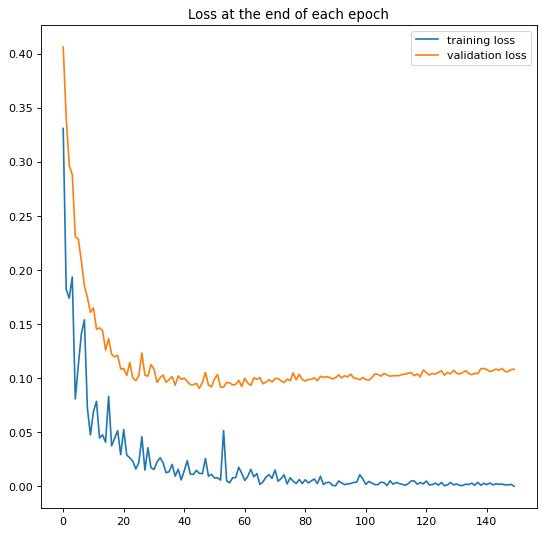

In [1820]:
trl = [loss.item() for loss in train_losses ]
tel = [loss.item() for loss in test_losses ]



figure(figsize=(8, 8), dpi=80)
plt.plot(trl, label='training loss')
plt.plot(tel, label='validation loss')
plt.title('Loss at the end of each epoch')
plt.legend();

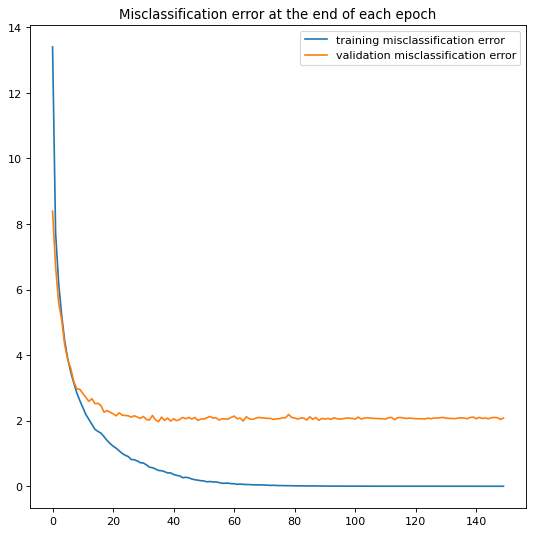

In [1821]:
figure(figsize=(8, 8), dpi=80)
plt.plot([100-t/600 for t in train_correct], label='training misclassification error')
plt.plot([100-t/100 for t in test_correct], label='validation misclassification error')
plt.title('Misclassification error at the end of each epoch')
plt.legend();

In [1822]:
test_cc = [t/100 for t in test_correct]
max_index = test_cc.index(max(test_cc))
print(f'epoch with the best reslut: {max_index}')
print(f'best test accuracy is: {test_cc[max_index]}')

epoch with the best reslut: 35
best test accuracy is: 98.02999877929688


In [1128]:
# 2nd trainning
start_time = time.time()

torch.manual_seed(44)
epochs = 150
train_losses = []
test_losses = []
train_correct = []
test_correct = []

for i in range(epochs):
    trn_corr = 0
    tst_corr = 0
    
    # Run the training batches
    for b, (X_train, y_train) in enumerate(train_loader):
        
        b+=1
        
        # Apply the model
        y_pred = model(X_train.view(100, -1))  # Here to flatten X_train
        loss = criterion(y_pred, y_train)
 
        # Tally the number of correct predictions
        predicted = torch.max(y_pred.data, 1)[1]
        batch_corr = (predicted == y_train).sum()
        trn_corr += batch_corr
        
        # Update parameters
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        # Print interim results
        if b%200 == 0 and i%30 == 0:
            print(f'epoch: {i:2}  batch: {b:4} [{100*b:6}/60000]  loss: {loss.item():10.8f}  \
accuracy: {trn_corr.item()*100/(100*b):7.3f}%')
    
    # Update train loss & accuracy for the epoch
    train_losses.append(loss)
    train_correct.append(trn_corr)
        
    # Run the testing batches
    with torch.no_grad():
        for b, (X_test, y_test) in enumerate(test_loader):

            # Apply the model
            y_val = model(X_test.view(500, -1))  # Here we flatten X_test

            # Tally the number of correct predictions
            predicted = torch.max(y_val.data, 1)[1] 
            tst_corr += (predicted == y_test).sum()
    
    # Update test loss & accuracy for the epoch
    loss = criterion(y_val, y_test)
    test_losses.append(loss)
    test_correct.append(tst_corr)
        
print(f'\nDuration: {time.time() - start_time:.0f} seconds') # print the time elapsed    

epoch:  0  batch:  200 [ 20000/60000]  loss: 0.00142337  accuracy: 100.000%
epoch:  0  batch:  400 [ 40000/60000]  loss: 0.00238367  accuracy: 100.000%
epoch:  0  batch:  600 [ 60000/60000]  loss: 0.00128410  accuracy: 100.000%
epoch: 30  batch:  200 [ 20000/60000]  loss: 0.00131633  accuracy: 100.000%
epoch: 30  batch:  400 [ 40000/60000]  loss: 0.00242944  accuracy: 100.000%
epoch: 30  batch:  600 [ 60000/60000]  loss: 0.00039310  accuracy: 100.000%
epoch: 60  batch:  200 [ 20000/60000]  loss: 0.00183145  accuracy: 100.000%
epoch: 60  batch:  400 [ 40000/60000]  loss: 0.00088600  accuracy: 100.000%
epoch: 60  batch:  600 [ 60000/60000]  loss: 0.00136517  accuracy: 100.000%
epoch: 90  batch:  200 [ 20000/60000]  loss: 0.00090845  accuracy: 100.000%
epoch: 90  batch:  400 [ 40000/60000]  loss: 0.00091003  accuracy: 100.000%
epoch: 90  batch:  600 [ 60000/60000]  loss: 0.00106497  accuracy: 100.000%
epoch: 120  batch:  200 [ 20000/60000]  loss: 0.00103335  accuracy: 100.000%
epoch: 120 

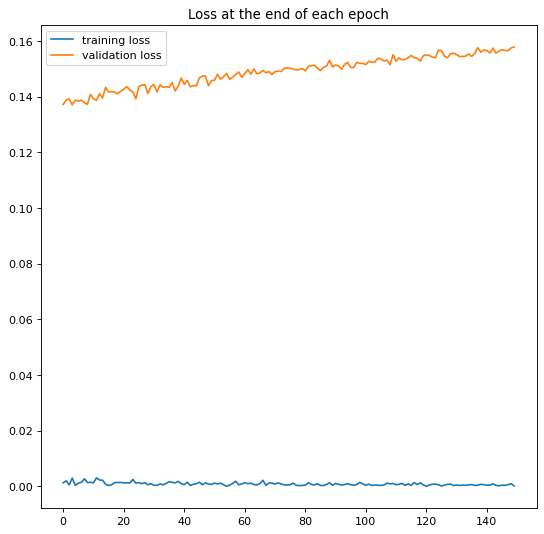

In [1129]:
trl = [loss.item() for loss in train_losses ]
tel = [loss.item() for loss in test_losses ]



figure(figsize=(8, 8), dpi=80)
plt.plot(trl, label='training loss')
plt.plot(tel, label='validation loss')
plt.title('Loss at the end of each epoch')
plt.legend();


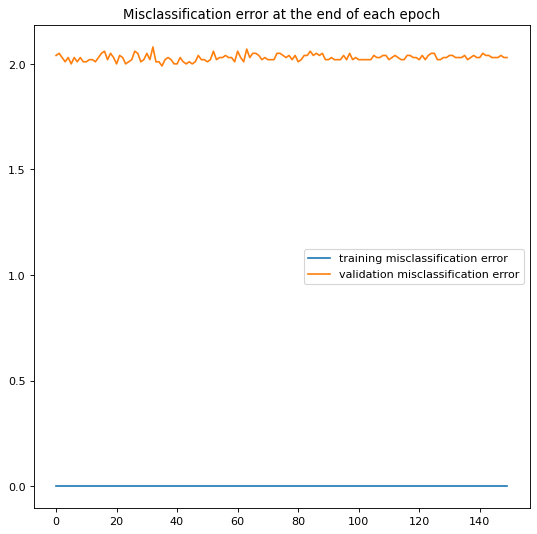

In [1130]:
figure(figsize=(8, 8), dpi=80)
plt.plot([100-t/600 for t in train_correct], label='training misclassification error')
plt.plot([100-t/100 for t in test_correct], label='validation misclassification error')
plt.title('Misclassification error at the end of each epoch')
plt.legend();

In [ ]:
test_cc = [t/100 for t in test_correct]
max_index = test_cc.index(max(test_cc))
print(f'epoch with the best reslut: {max_index}')
print(f'best test accuracy is: {test_cc[max_index]}')

In [660]:
# 3rd trainning
start_time = time.time()

torch.manual_seed(52)
epochs = 150
train_losses = []
test_losses = []
train_correct = []
test_correct = []

for i in range(epochs):
    trn_corr = 0
    tst_corr = 0
    
    # Run the training batches
    for b, (X_train, y_train) in enumerate(train_loader):
        
        b+=1
        
        # Apply the model
        y_pred = model(X_train.view(100, -1))  # Here we flatten X_train
        loss = criterion(y_pred, y_train)
 
        # Tally the number of correct predictions
        predicted = torch.max(y_pred.data, 1)[1]
        batch_corr = (predicted == y_train).sum()
        trn_corr += batch_corr
        
        # Update parameters
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        # Print interim results
        if b%200 == 0 and i%30 == 0:
            print(f'epoch: {i:2}  batch: {b:4} [{100*b:6}/60000]  loss: {loss.item():10.8f}  \
accuracy: {trn_corr.item()*100/(100*b):7.3f}%')
    
    # Update train loss & accuracy for the epoch
    train_losses.append(loss)
    train_correct.append(trn_corr)
        
    # Run the testing batches
    with torch.no_grad():
        for b, (X_test, y_test) in enumerate(test_loader):

            # Apply the model
            y_val = model(X_test.view(500, -1))  # Here we flatten X_test

            # Tally the number of correct predictions
            predicted = torch.max(y_val.data, 1)[1] 
            tst_corr += (predicted == y_test).sum()
    
    # Update test loss & accuracy for the epoch
    loss = criterion(y_val, y_test)
    test_losses.append(loss)
    test_correct.append(tst_corr)
        
print(f'\nDuration: {time.time() - start_time:.0f} seconds') # print the time elapsed 

epoch:  0  batch:  200 [ 20000/60000]  loss: 0.00083876  accuracy: 100.000%
epoch:  0  batch:  400 [ 40000/60000]  loss: 0.00108778  accuracy: 100.000%
epoch:  0  batch:  600 [ 60000/60000]  loss: 0.00057049  accuracy: 100.000%
epoch: 30  batch:  200 [ 20000/60000]  loss: 0.00027540  accuracy: 100.000%
epoch: 30  batch:  400 [ 40000/60000]  loss: 0.00073948  accuracy: 100.000%
epoch: 30  batch:  600 [ 60000/60000]  loss: 0.00030312  accuracy: 100.000%
epoch: 60  batch:  200 [ 20000/60000]  loss: 0.00029385  accuracy: 100.000%
epoch: 60  batch:  400 [ 40000/60000]  loss: 0.00017869  accuracy: 100.000%
epoch: 60  batch:  600 [ 60000/60000]  loss: 0.00011337  accuracy: 100.000%
epoch: 90  batch:  200 [ 20000/60000]  loss: 0.00026005  accuracy: 100.000%
epoch: 90  batch:  400 [ 40000/60000]  loss: 0.00027494  accuracy: 100.000%
epoch: 90  batch:  600 [ 60000/60000]  loss: 0.00042380  accuracy: 100.000%
epoch: 120  batch:  200 [ 20000/60000]  loss: 0.00062476  accuracy: 100.000%
epoch: 120 

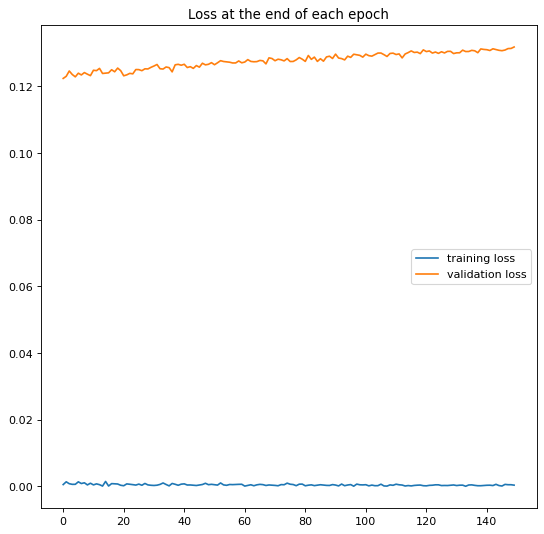

In [661]:
trl = [loss.item() for loss in train_losses ]
tel = [loss.item() for loss in test_losses ]



figure(figsize=(8, 8), dpi=80)
plt.plot(trl, label='training loss')
plt.plot(tel, label='validation loss')
plt.title('Loss at the end of each epoch')
plt.legend();

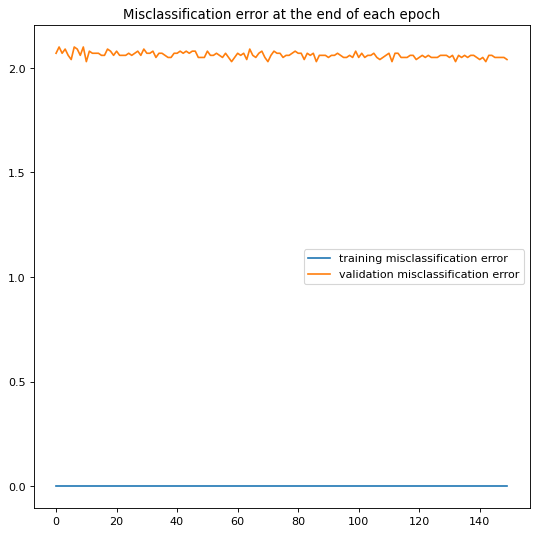

In [662]:
figure(figsize=(8, 8), dpi=80)
plt.plot([100-t/600 for t in train_correct], label='training misclassification error')
plt.plot([100-t/100 for t in test_correct], label='validation misclassification error')
plt.title('Misclassification error at the end of each epoch')
plt.legend();

In [ ]:
test_cc = [t/100 for t in test_correct]
max_index = test_cc.index(max(test_cc))
print(f'epoch with the best reslut: {max_index}')
print(f'best test accuracy is: {test_cc[max_index]}')

In [663]:
# 4th trainning
start_time = time.time()

torch.manual_seed(22)
epochs = 150
train_losses = []
test_losses = []
train_correct = []
test_correct = []

for i in range(epochs):
    trn_corr = 0
    tst_corr = 0
    
    # Run the training batches
    for b, (X_train, y_train) in enumerate(train_loader):
        
        b+=1
        
        # Apply the model
        y_pred = model(X_train.view(100, -1))  # Here we flatten X_train
        loss = criterion(y_pred, y_train)
 
        # Tally the number of correct predictions
        predicted = torch.max(y_pred.data, 1)[1]
        batch_corr = (predicted == y_train).sum()
        trn_corr += batch_corr
        
        # Update parameters
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        # Print interim results
        if b%200 == 0 and i%30 == 0:
            print(f'epoch: {i:2}  batch: {b:4} [{100*b:6}/60000]  loss: {loss.item():10.8f}  \
accuracy: {trn_corr.item()*100/(100*b):7.3f}%')
    
    # Update train loss & accuracy for the epoch
    train_losses.append(loss)
    train_correct.append(trn_corr)
        
    # Run the testing batches
    with torch.no_grad():
        for b, (X_test, y_test) in enumerate(test_loader):

            # Apply the model
            y_val = model(X_test.view(500, -1))  # Here we flatten X_test

            # Tally the number of correct predictions
            predicted = torch.max(y_val.data, 1)[1] 
            tst_corr += (predicted == y_test).sum()
    
    # Update test loss & accuracy for the epoch
    loss = criterion(y_val, y_test)
    test_losses.append(loss)
    test_correct.append(tst_corr)
        
print(f'\nDuration: {time.time() - start_time:.0f} seconds') # print the time elapsed 

epoch:  0  batch:  200 [ 20000/60000]  loss: 0.00015524  accuracy: 100.000%
epoch:  0  batch:  400 [ 40000/60000]  loss: 0.00037434  accuracy: 100.000%
epoch:  0  batch:  600 [ 60000/60000]  loss: 0.00047704  accuracy: 100.000%
epoch: 30  batch:  200 [ 20000/60000]  loss: 0.00004869  accuracy: 100.000%
epoch: 30  batch:  400 [ 40000/60000]  loss: 0.00019146  accuracy: 100.000%
epoch: 30  batch:  600 [ 60000/60000]  loss: 0.00025352  accuracy: 100.000%
epoch: 60  batch:  200 [ 20000/60000]  loss: 0.00075640  accuracy: 100.000%
epoch: 60  batch:  400 [ 40000/60000]  loss: 0.00017650  accuracy: 100.000%
epoch: 60  batch:  600 [ 60000/60000]  loss: 0.00029315  accuracy: 100.000%
epoch: 90  batch:  200 [ 20000/60000]  loss: 0.00025815  accuracy: 100.000%
epoch: 90  batch:  400 [ 40000/60000]  loss: 0.00020435  accuracy: 100.000%
epoch: 90  batch:  600 [ 60000/60000]  loss: 0.00039428  accuracy: 100.000%
epoch: 120  batch:  200 [ 20000/60000]  loss: 0.00019074  accuracy: 100.000%
epoch: 120 

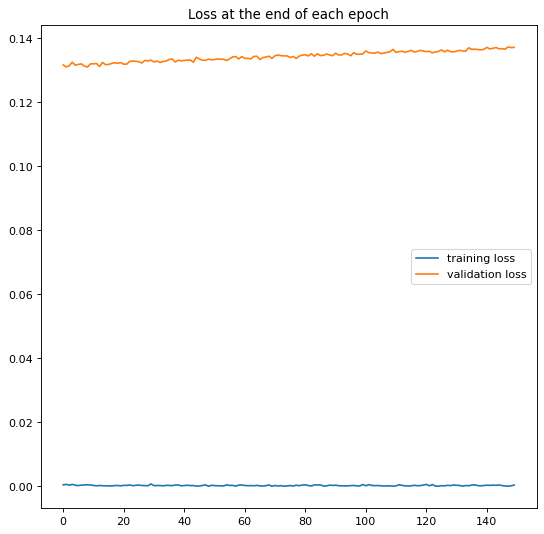

In [664]:
trl = [loss.item() for loss in train_losses ]
tel = [loss.item() for loss in test_losses ]



figure(figsize=(8, 8), dpi=80)
plt.plot(trl, label='training loss')
plt.plot(tel, label='validation loss')
plt.title('Loss at the end of each epoch')
plt.legend();

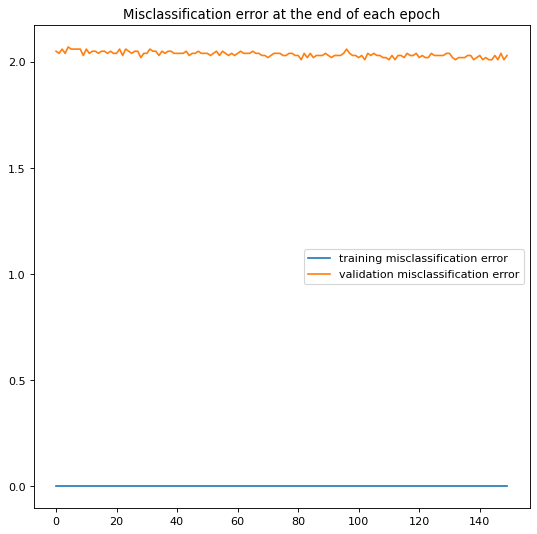

In [665]:
figure(figsize=(8, 8), dpi=80)
plt.plot([100-t/600 for t in train_correct], label='training misclassification error')
plt.plot([100-t/100 for t in test_correct], label='validation misclassification error')
plt.title('Misclassification error at the end of each epoch')
plt.legend();

In [ ]:
test_cc = [t/100 for t in test_correct]
max_index = test_cc.index(max(test_cc))
print(f'epoch with the best reslut: {max_index}')
print(f'best test accuracy is: {test_cc[max_index]}')

In [666]:
# 5th trainning
start_time = time.time()

torch.manual_seed(77)
epochs = 150
train_losses = []
test_losses = []
train_correct = []
test_correct = []

for i in range(epochs):
    trn_corr = 0
    tst_corr = 0
    
    # Run the training batches
    for b, (X_train, y_train) in enumerate(train_loader):
        
        b+=1
        
        # Apply the model
        y_pred = model(X_train.view(100, -1))  # Here we flatten X_train
        loss = criterion(y_pred, y_train)
 
        # Tally the number of correct predictions
        predicted = torch.max(y_pred.data, 1)[1]
        batch_corr = (predicted == y_train).sum()
        trn_corr += batch_corr
        
        # Update parameters
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        # Print interim results
        if b%200 == 0 and i%30 == 0:
            print(f'epoch: {i:2}  batch: {b:4} [{100*b:6}/60000]  loss: {loss.item():10.8f}  \
accuracy: {trn_corr.item()*100/(100*b):7.3f}%')
    
    # Update train loss & accuracy for the epoch
    train_losses.append(loss)
    train_correct.append(trn_corr)
        
    # Run the testing batches
    with torch.no_grad():
        for b, (X_test, y_test) in enumerate(test_loader):

            # Apply the model
            y_val = model(X_test.view(500, -1))  # Here we flatten X_test

            # Tally the number of correct predictions
            predicted = torch.max(y_val.data, 1)[1] 
            tst_corr += (predicted == y_test).sum()
    
    # Update test loss & accuracy for the epoch
    loss = criterion(y_val, y_test)
    test_losses.append(loss)
    test_correct.append(tst_corr)
        
print(f'\nDuration: {time.time() - start_time:.0f} seconds') # print the time elapsed 

epoch:  0  batch:  200 [ 20000/60000]  loss: 0.00032810  accuracy: 100.000%
epoch:  0  batch:  400 [ 40000/60000]  loss: 0.00021325  accuracy: 100.000%
epoch:  0  batch:  600 [ 60000/60000]  loss: 0.00039641  accuracy: 100.000%
epoch: 30  batch:  200 [ 20000/60000]  loss: 0.00031812  accuracy: 100.000%
epoch: 30  batch:  400 [ 40000/60000]  loss: 0.00024417  accuracy: 100.000%
epoch: 30  batch:  600 [ 60000/60000]  loss: 0.00013397  accuracy: 100.000%
epoch: 60  batch:  200 [ 20000/60000]  loss: 0.00018389  accuracy: 100.000%
epoch: 60  batch:  400 [ 40000/60000]  loss: 0.00034384  accuracy: 100.000%
epoch: 60  batch:  600 [ 60000/60000]  loss: 0.00011700  accuracy: 100.000%
epoch: 90  batch:  200 [ 20000/60000]  loss: 0.00020042  accuracy: 100.000%
epoch: 90  batch:  400 [ 40000/60000]  loss: 0.00009319  accuracy: 100.000%
epoch: 90  batch:  600 [ 60000/60000]  loss: 0.00013690  accuracy: 100.000%
epoch: 120  batch:  200 [ 20000/60000]  loss: 0.00018510  accuracy: 100.000%
epoch: 120 

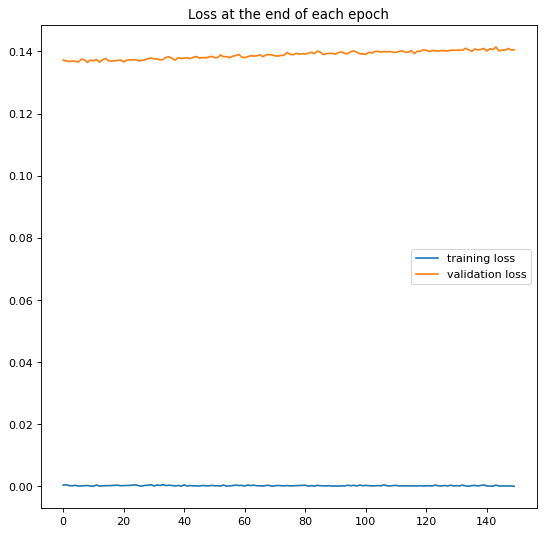

In [667]:
trl = [loss.item() for loss in train_losses ]
tel = [loss.item() for loss in test_losses ]



figure(figsize=(8, 8), dpi=80)
plt.plot(trl, label='training loss')
plt.plot(tel, label='validation loss')
plt.title('Loss at the end of each epoch')
plt.legend();

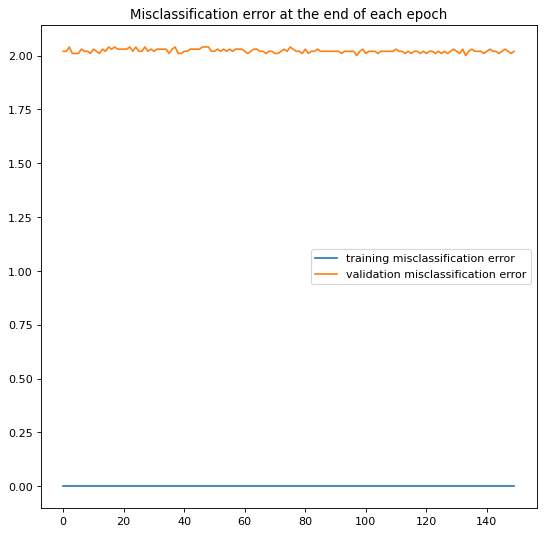

In [668]:
figure(figsize=(8, 8), dpi=80)
plt.plot([100-t/600 for t in train_correct], label='training misclassification error')
plt.plot([100-t/100 for t in test_correct], label='validation misclassification error')
plt.title('Misclassification error at the end of each epoch')
plt.legend();

In [ ]:
test_cc = [t/100 for t in test_correct]
max_index = test_cc.index(max(test_cc))
print(f'epoch with the best reslut: {max_index}')
print(f'best test accuracy is: {test_cc[max_index]}')

In [669]:
# 6th trainning
start_time = time.time()

torch.manual_seed(71)
epochs = 150
train_losses = []
test_losses = []
train_correct = []
test_correct = []

for i in range(epochs):
    trn_corr = 0
    tst_corr = 0
    
    # Run the training batches
    for b, (X_train, y_train) in enumerate(train_loader):
        
        b+=1
        
        # Apply the model
        y_pred = model(X_train.view(100, -1))  # Here we flatten X_train
        loss = criterion(y_pred, y_train)
 
        # Tally the number of correct predictions
        predicted = torch.max(y_pred.data, 1)[1]
        batch_corr = (predicted == y_train).sum()
        trn_corr += batch_corr
        
        # Update parameters
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        # Print interim results
        if b%200 == 0 and i%30 == 0:
            print(f'epoch: {i:2}  batch: {b:4} [{100*b:6}/60000]  loss: {loss.item():10.8f}  \
accuracy: {trn_corr.item()*100/(100*b):7.3f}%')
    
    # Update train loss & accuracy for the epoch
    train_losses.append(loss)
    train_correct.append(trn_corr)
        
    # Run the testing batches
    with torch.no_grad():
        for b, (X_test, y_test) in enumerate(test_loader):

            # Apply the model
            y_val = model(X_test.view(500, -1))  # Here we flatten X_test

            # Tally the number of correct predictions
            predicted = torch.max(y_val.data, 1)[1] 
            tst_corr += (predicted == y_test).sum()
    
    # Update test loss & accuracy for the epoch
    loss = criterion(y_val, y_test)
    test_losses.append(loss)
    test_correct.append(tst_corr)
        
print(f'\nDuration: {time.time() - start_time:.0f} seconds') # print the time elapsed 

epoch:  0  batch:  200 [ 20000/60000]  loss: 0.00021223  accuracy: 100.000%
epoch:  0  batch:  400 [ 40000/60000]  loss: 0.00030008  accuracy: 100.000%
epoch:  0  batch:  600 [ 60000/60000]  loss: 0.00011667  accuracy: 100.000%
epoch: 30  batch:  200 [ 20000/60000]  loss: 0.00009274  accuracy: 100.000%
epoch: 30  batch:  400 [ 40000/60000]  loss: 0.00016770  accuracy: 100.000%
epoch: 30  batch:  600 [ 60000/60000]  loss: 0.00026743  accuracy: 100.000%
epoch: 60  batch:  200 [ 20000/60000]  loss: 0.00006439  accuracy: 100.000%
epoch: 60  batch:  400 [ 40000/60000]  loss: 0.00037118  accuracy: 100.000%
epoch: 60  batch:  600 [ 60000/60000]  loss: 0.00020274  accuracy: 100.000%
epoch: 90  batch:  200 [ 20000/60000]  loss: 0.00018378  accuracy: 100.000%
epoch: 90  batch:  400 [ 40000/60000]  loss: 0.00023930  accuracy: 100.000%
epoch: 90  batch:  600 [ 60000/60000]  loss: 0.00012491  accuracy: 100.000%
epoch: 120  batch:  200 [ 20000/60000]  loss: 0.00023352  accuracy: 100.000%
epoch: 120 

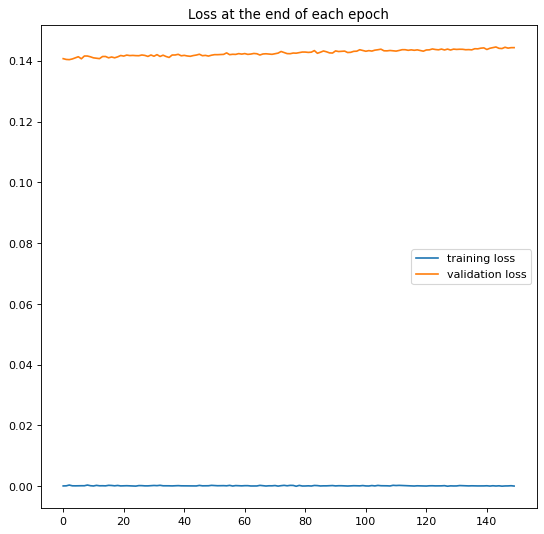

In [670]:
trl = [loss.item() for loss in train_losses ]
tel = [loss.item() for loss in test_losses ]



figure(figsize=(8, 8), dpi=80)
plt.plot(trl, label='training loss')
plt.plot(tel, label='validation loss')
plt.title('Loss at the end of each epoch')
plt.legend();

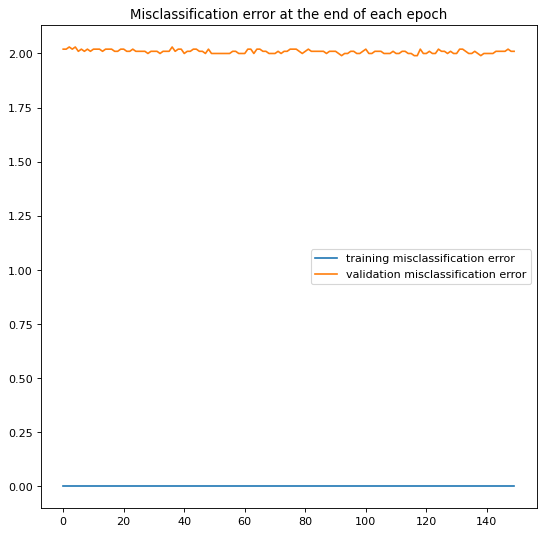

In [671]:
figure(figsize=(8, 8), dpi=80)
plt.plot([100-t/600 for t in train_correct], label='training misclassification error')
plt.plot([100-t/100 for t in test_correct], label='validation misclassification error')
plt.title('Misclassification error at the end of each epoch')
plt.legend();

In [ ]:
test_cc = [t/100 for t in test_correct]
max_index = test_cc.index(max(test_cc))
print(f'epoch with the best reslut: {max_index}')
print(f'best test accuracy is: {test_cc[max_index]}')

### Difference between a&b

By comparing to those two different types of plots we can find out that for plots in (a), the validation loss starts to increase after a point. In my model at learning rate 0.1, it starts the increasing trend at the beginning of the 2nd trainning and loss gradually getting more and more during the rest training. 

For the plots in (b), we will find out that the misclassification error (in percentage) eventually converged to a certain percentage, in this model it's around 2%, and it does not change much as we keep doing more trainnings


As a result, this model obtain its best prediction in around the 4th trainning. 

### (c)

In [1133]:
from sklearn.metrics import confusion_matrix
from torchvision.utils import make_grid

In [1134]:
# Extract the data all at once, not in batches
test_load_all = DataLoader(test_data, batch_size=10000, shuffle=False)

In [1135]:
with torch.no_grad():
    correct = 0
    for X_test, y_test in test_load_all:
        y_val = model(X_test.view(len(X_test), -1))  # pass in a flattened view of X_test
        predicted = torch.max(y_val,1)[1]
        correct += (predicted == y_test).sum()
print(f'Test accuracy: {correct.item()}/{len(test_data)} = {correct.item()*100/(len(test_data)):7.3f}%')

Test accuracy: 9797/10000 =  97.970%


In [1136]:
# print a row of values for reference
np.set_printoptions(formatter=dict(int=lambda x: f'{x:4}'))
print(np.arange(10).reshape(1,10))
print()

# print the confusion matrix
print(confusion_matrix(predicted.view(-1), y_test.view(-1)))

[[   0    1    2    3    4    5    6    7    8    9]]

[[ 971    0    4    0    1    3    4    1    5    0]
 [   0 1124    2    0    0    0    2    2    1    3]
 [   1    3 1009    4    3    0    0    7    2    0]
 [   1    1    1  989    0    7    1    4    7    3]
 [   1    0    2    0  965    2    5    0    3    7]
 [   0    0    0    4    0  867    2    0    4    3]
 [   2    1    3    0    3    5  943    0    4    1]
 [   1    1    4    3    2    1    1 1004    2    3]
 [   2    5    6    3    2    5    0    4  943    7]
 [   1    0    1    7    6    2    0    6    3  982]]


In [1137]:
right_guess = np.array([])
for i in range(len(predicted.view(-1))):
    if predicted[i] == y_test[i]:
        right_guess = np.append(right_guess,i).astype('int64')
        
# Display the number of corrected guess
len(right_guess)

9797

In [1138]:
# Set up an iterator to feed batched rows
r = 100   # row size
row = iter(np.array_split(right_guess,len(right_guess)//r+1))

Label: [   7    2    1    0    4    1    4    9    5    9    0    6    9    0
    1    5    9    7    3    4    9    6    6    5    4    0    7    4
    0    1    3    1    3    4    7    2    7    1    2    1    1    7
    4    2    3    5    1    2    4    4    6    3    5    5    6    0
    4    1    9    5    7    8    9    3    7    4    6    4    3    0
    7    0    2    9    1    7    3    2    9    7    7    6    2    7
    8    4    7    3    6    1    3    6    9    3    1    4    1    7
    6    9]
Guess: [   7    2    1    0    4    1    4    9    5    9    0    6    9    0
    1    5    9    7    3    4    9    6    6    5    4    0    7    4
    0    1    3    1    3    4    7    2    7    1    2    1    1    7
    4    2    3    5    1    2    4    4    6    3    5    5    6    0
    4    1    9    5    7    8    9    3    7    4    6    4    3    0
    7    0    2    9    1    7    3    2    9    7    7    6    2    7
    8    4    7    3    6    1    3    6    9    3 

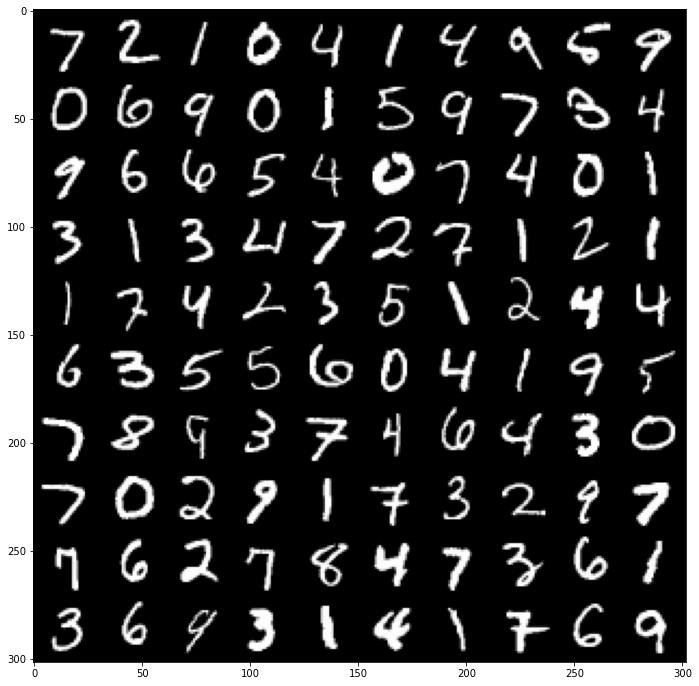

In [1139]:
nextrow = next(row)
# print("Index:", nextrow)
print("Label:", y_test.index_select(0,torch.tensor(nextrow)).numpy())
print("Guess:", predicted.index_select(0,torch.tensor(nextrow)).numpy())

images = X_test.index_select(0,torch.tensor(nextrow))
im = make_grid(images, nrow=10)
plt.figure(figsize=(30,12))
plt.imshow(np.transpose(im.numpy(), (1, 2, 0)));

In [1871]:
weights = []
for wei in model.parameters():
    weights.append(wei.detach().cpu().numpy())

In [1872]:
weights[0].shape

(100, 784)

In [1855]:
weights[0].reshape(10,10,28,28).shape

(10, 10, 28, 28)

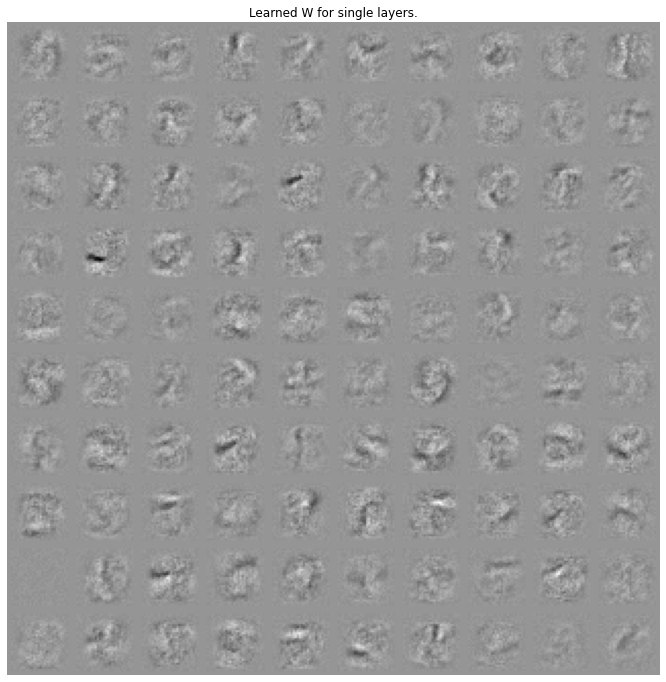

In [1854]:

# Assemble to images.
fc_images = weights[0].reshape(10, 10, 28, 28)
pad_images = np.zeros((10, 10, 32, 32))
pad_images[:, :, 2:30, 2:30] = fc_images
fc_vis = np.transpose(pad_images, (0, 2, 1, 3)).reshape(320, 320)

# Show weights.
plt.figure(figsize=(12, 12))
plt.imshow(fc_vis, cmap='gray')
plt.title("Learned W for single layers.")
plt.axis("off")
plt.show()

### (d)

For computational efficiency, I will only test those parameters invidually and remains the other parameters the same as what I did in part a&b instead of testing all the combinations.

###  learning rate of 0.01

In [1562]:
model = Model()
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.01)

In [1563]:
torch.manual_seed(101)  # for reproduce 

train_loader = DataLoader(train_data, batch_size=100, shuffle=True)

test_loader = DataLoader(test_data, batch_size=500, shuffle=False)

In [1564]:
# 1st trainning
import time
start_time = time.time()

torch.manual_seed(42)
epochs = 150
train_losses = []
test_losses = []
train_correct = []
test_correct = []

for i in range(epochs):
    trn_corr = 0
    tst_corr = 0
    
    # Run the training batches
    for b, (X_train, y_train) in enumerate(train_loader):
        
        b+=1
        
        # Apply the model
        y_pred = model(X_train.view(100, -1))  # Here to flatten X_train
        loss = criterion(y_pred, y_train)
 
        # Tally the number of correct predictions
        predicted = torch.max(y_pred.data, 1)[1]
        batch_corr = (predicted == y_train).sum()
        trn_corr += batch_corr
        
        # Update parameters
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        # Print interim results
        if b%200 == 0 and i%30 == 0:
            print(f'epoch: {i:2}  batch: {b:4} [{100*b:6}/60000]  loss: {loss.item():10.8f}  \
accuracy: {trn_corr.item()*100/(100*b):7.3f}%')
    
    # Update train loss & accuracy for the epoch
    train_losses.append(loss)
    train_correct.append(trn_corr)
        
    # Run the testing batches
    with torch.no_grad():
        for b, (X_test, y_test) in enumerate(test_loader):

            # Apply the model
            y_val = model(X_test.view(500, -1))  # Here we flatten X_test

            # Tally the number of correct predictions
            predicted = torch.max(y_val.data, 1)[1] 
            tst_corr += (predicted == y_test).sum()
    
    # Update test loss & accuracy for the epoch
    loss = criterion(y_val, y_test)
    test_losses.append(loss)
    test_correct.append(tst_corr)
        
print(f'\nDuration: {time.time() - start_time:.0f} seconds') # print the time elapsed    

epoch:  0  batch:  200 [ 20000/60000]  loss: 1.84344923  accuracy:  46.445%
epoch:  0  batch:  400 [ 40000/60000]  loss: 1.29715204  accuracy:  60.015%
epoch:  0  batch:  600 [ 60000/60000]  loss: 0.95308661  accuracy:  66.705%
epoch: 30  batch:  200 [ 20000/60000]  loss: 0.18246056  accuracy:  94.595%
epoch: 30  batch:  400 [ 40000/60000]  loss: 0.12887622  accuracy:  94.655%
epoch: 30  batch:  600 [ 60000/60000]  loss: 0.20161596  accuracy:  94.653%
epoch: 60  batch:  200 [ 20000/60000]  loss: 0.14518161  accuracy:  96.380%
epoch: 60  batch:  400 [ 40000/60000]  loss: 0.17732511  accuracy:  96.460%
epoch: 60  batch:  600 [ 60000/60000]  loss: 0.12826741  accuracy:  96.465%
epoch: 90  batch:  200 [ 20000/60000]  loss: 0.12456366  accuracy:  97.395%
epoch: 90  batch:  400 [ 40000/60000]  loss: 0.05908205  accuracy:  97.457%
epoch: 90  batch:  600 [ 60000/60000]  loss: 0.05060227  accuracy:  97.407%
epoch: 120  batch:  200 [ 20000/60000]  loss: 0.05129230  accuracy:  98.070%
epoch: 120 

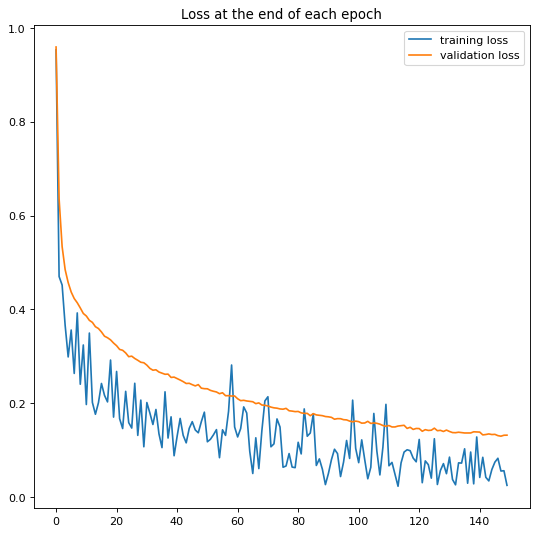

In [1565]:
trl = [loss.item() for loss in train_losses ]
tel = [loss.item() for loss in test_losses ]



figure(figsize=(8, 8), dpi=80)
plt.plot(trl, label='training loss')
plt.plot(tel, label='validation loss')
plt.title('Loss at the end of each epoch')
plt.legend();

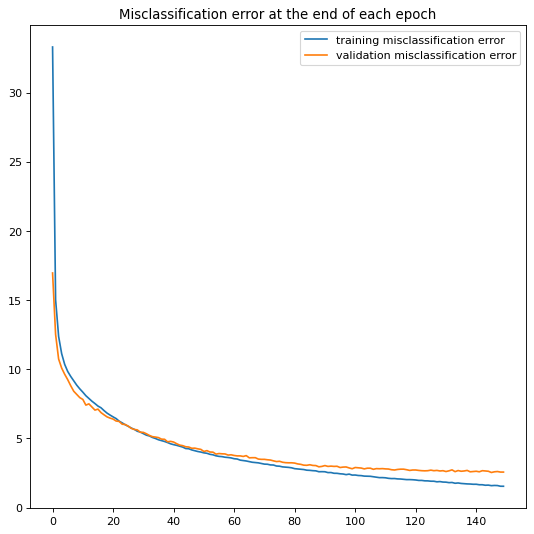

In [1566]:
figure(figsize=(8, 8), dpi=80)
plt.plot([100-t/600 for t in train_correct], label='training misclassification error')
plt.plot([100-t/100 for t in test_correct], label='validation misclassification error')
plt.title('Misclassification error at the end of each epoch')
plt.legend();

In [1571]:
test_cc = [t/100 for t in test_correct]
max_index = test_cc.index(max(test_cc))
max_index

145

In [1572]:
test_cc[max_index]

tensor(97.4600)

###  learning rate of 0.2

In [1573]:
model = Model()
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.2)

In [1574]:
torch.manual_seed(101)  # for reproduce 

train_loader = DataLoader(train_data, batch_size=100, shuffle=True)

test_loader = DataLoader(test_data, batch_size=500, shuffle=False)

In [1575]:
# 1st trainning
import time
start_time = time.time()

torch.manual_seed(42)
epochs = 150
train_losses = []
test_losses = []
train_correct = []
test_correct = []

for i in range(epochs):
    trn_corr = 0
    tst_corr = 0
    
    # Run the training batches
    for b, (X_train, y_train) in enumerate(train_loader):
        
        b+=1
        
        # Apply the model
        y_pred = model(X_train.view(100, -1))  # Here to flatten X_train
        loss = criterion(y_pred, y_train)
 
        # Tally the number of correct predictions
        predicted = torch.max(y_pred.data, 1)[1]
        batch_corr = (predicted == y_train).sum()
        trn_corr += batch_corr
        
        # Update parameters
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        # Print interim results
        if b%200 == 0 and i%30 == 0:
            print(f'epoch: {i:2}  batch: {b:4} [{100*b:6}/60000]  loss: {loss.item():10.8f}  \
accuracy: {trn_corr.item()*100/(100*b):7.3f}%')
    
    # Update train loss & accuracy for the epoch
    train_losses.append(loss)
    train_correct.append(trn_corr)
        
    # Run the testing batches
    with torch.no_grad():
        for b, (X_test, y_test) in enumerate(test_loader):

            # Apply the model
            y_val = model(X_test.view(500, -1))  # Here we flatten X_test

            # Tally the number of correct predictions
            predicted = torch.max(y_val.data, 1)[1] 
            tst_corr += (predicted == y_test).sum()
    
    # Update test loss & accuracy for the epoch
    loss = criterion(y_val, y_test)
    test_losses.append(loss)
    test_correct.append(tst_corr)
        
print(f'\nDuration: {time.time() - start_time:.0f} seconds') # print the time elapsed    

epoch:  0  batch:  200 [ 20000/60000]  loss: 0.33184668  accuracy:  83.310%
epoch:  0  batch:  400 [ 40000/60000]  loss: 0.26827747  accuracy:  86.910%
epoch:  0  batch:  600 [ 60000/60000]  loss: 0.25720170  accuracy:  88.675%
epoch: 30  batch:  200 [ 20000/60000]  loss: 0.01170894  accuracy:  99.910%
epoch: 30  batch:  400 [ 40000/60000]  loss: 0.00960306  accuracy:  99.905%
epoch: 30  batch:  600 [ 60000/60000]  loss: 0.00358533  accuracy:  99.905%
epoch: 60  batch:  200 [ 20000/60000]  loss: 0.00224586  accuracy: 100.000%
epoch: 60  batch:  400 [ 40000/60000]  loss: 0.00261511  accuracy: 100.000%
epoch: 60  batch:  600 [ 60000/60000]  loss: 0.00239754  accuracy: 100.000%
epoch: 90  batch:  200 [ 20000/60000]  loss: 0.00242839  accuracy: 100.000%
epoch: 90  batch:  400 [ 40000/60000]  loss: 0.00090159  accuracy: 100.000%
epoch: 90  batch:  600 [ 60000/60000]  loss: 0.00031360  accuracy: 100.000%
epoch: 120  batch:  200 [ 20000/60000]  loss: 0.00029939  accuracy: 100.000%
epoch: 120 

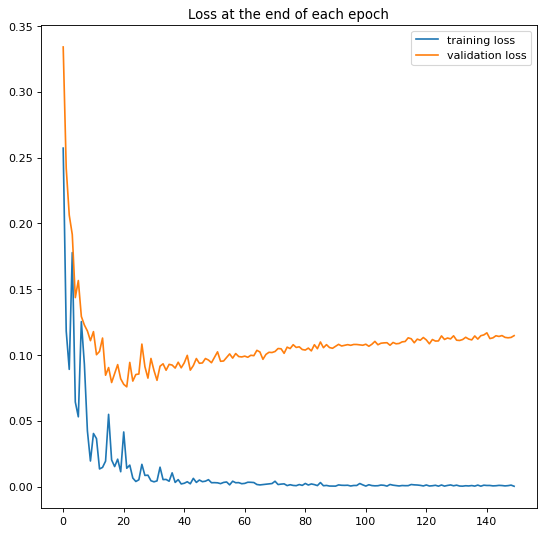

In [1580]:
trl = [loss.item() for loss in train_losses ]
tel = [loss.item() for loss in test_losses ]



figure(figsize=(8, 8), dpi=80)
plt.plot(trl, label='training loss')
plt.plot(tel, label='validation loss')
plt.title('Loss at the end of each epoch')
plt.legend();

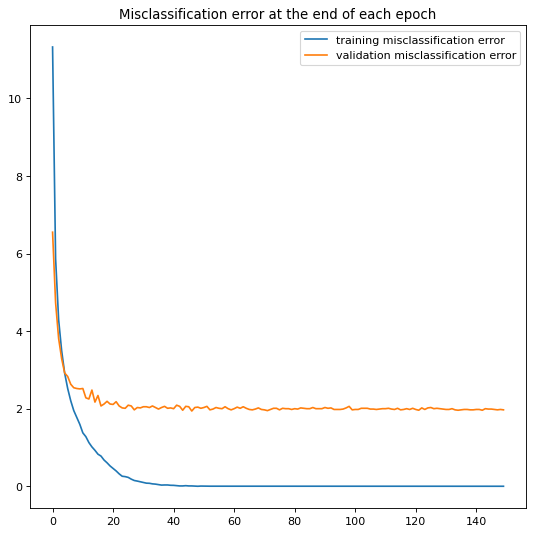

In [1581]:
figure(figsize=(8, 8), dpi=80)
plt.plot([100-t/600 for t in train_correct], label='training misclassification error')
plt.plot([100-t/100 for t in test_correct], label='validation misclassification error')
plt.title('Misclassification error at the end of each epoch')
plt.legend();

In [1582]:
test_cc = [t/100 for t in test_correct]
max_index = test_cc.index(max(test_cc))
max_index
test_cc[max_index]

46

In [1583]:
test_cc[max_index]

tensor(98.0600)

###  learning rate of 0.5

In [1584]:
model = Model()
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.5)

In [1585]:
# 1st trainning
import time
start_time = time.time()

torch.manual_seed(42)
epochs = 150
train_losses = []
test_losses = []
train_correct = []
test_correct = []

for i in range(epochs):
    trn_corr = 0
    tst_corr = 0
    
    # Run the training batches
    for b, (X_train, y_train) in enumerate(train_loader):
        
        b+=1
        
        # Apply the model
        y_pred = model(X_train.view(100, -1))  # Here to flatten X_train
        loss = criterion(y_pred, y_train)
 
        # Tally the number of correct predictions
        predicted = torch.max(y_pred.data, 1)[1]
        batch_corr = (predicted == y_train).sum()
        trn_corr += batch_corr
        
        # Update parameters
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        # Print interim results
        if b%200 == 0 and i%30 == 0:
            print(f'epoch: {i:2}  batch: {b:4} [{100*b:6}/60000]  loss: {loss.item():10.8f}  \
accuracy: {trn_corr.item()*100/(100*b):7.3f}%')
    
    # Update train loss & accuracy for the epoch
    train_losses.append(loss)
    train_correct.append(trn_corr)
        
    # Run the testing batches
    with torch.no_grad():
        for b, (X_test, y_test) in enumerate(test_loader):

            # Apply the model
            y_val = model(X_test.view(500, -1))  # Here we flatten X_test

            # Tally the number of correct predictions
            predicted = torch.max(y_val.data, 1)[1] 
            tst_corr += (predicted == y_test).sum()
    
    # Update test loss & accuracy for the epoch
    loss = criterion(y_val, y_test)
    test_losses.append(loss)
    test_correct.append(tst_corr)
        
print(f'\nDuration: {time.time() - start_time:.0f} seconds') # print the time elapsed    

epoch:  0  batch:  200 [ 20000/60000]  loss: 0.28557912  accuracy:  84.925%
epoch:  0  batch:  400 [ 40000/60000]  loss: 0.16596991  accuracy:  88.882%
epoch:  0  batch:  600 [ 60000/60000]  loss: 0.14686930  accuracy:  90.790%
epoch: 30  batch:  200 [ 20000/60000]  loss: 0.00130168  accuracy: 100.000%
epoch: 30  batch:  400 [ 40000/60000]  loss: 0.00146324  accuracy: 100.000%
epoch: 30  batch:  600 [ 60000/60000]  loss: 0.00114082  accuracy: 100.000%
epoch: 60  batch:  200 [ 20000/60000]  loss: 0.00050415  accuracy: 100.000%
epoch: 60  batch:  400 [ 40000/60000]  loss: 0.00048773  accuracy: 100.000%
epoch: 60  batch:  600 [ 60000/60000]  loss: 0.00030979  accuracy: 100.000%
epoch: 90  batch:  200 [ 20000/60000]  loss: 0.00044649  accuracy: 100.000%
epoch: 90  batch:  400 [ 40000/60000]  loss: 0.00018102  accuracy: 100.000%
epoch: 90  batch:  600 [ 60000/60000]  loss: 0.00011979  accuracy: 100.000%
epoch: 120  batch:  200 [ 20000/60000]  loss: 0.00014493  accuracy: 100.000%
epoch: 120 

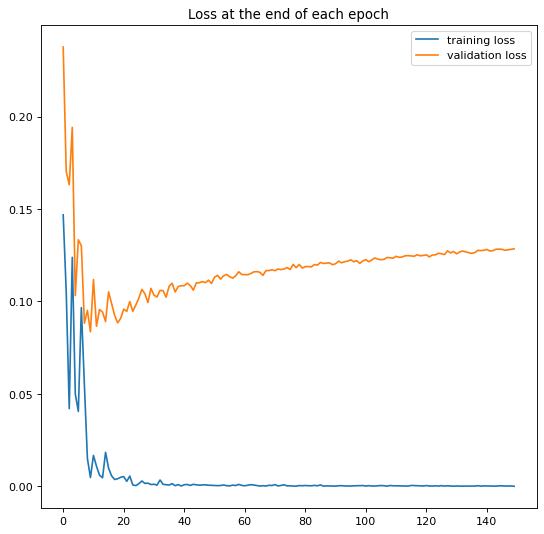

In [1586]:
trl = [loss.item() for loss in train_losses ]
tel = [loss.item() for loss in test_losses ]



figure(figsize=(8, 8), dpi=80)
plt.plot(trl, label='training loss')
plt.plot(tel, label='validation loss')
plt.title('Loss at the end of each epoch')
plt.legend();

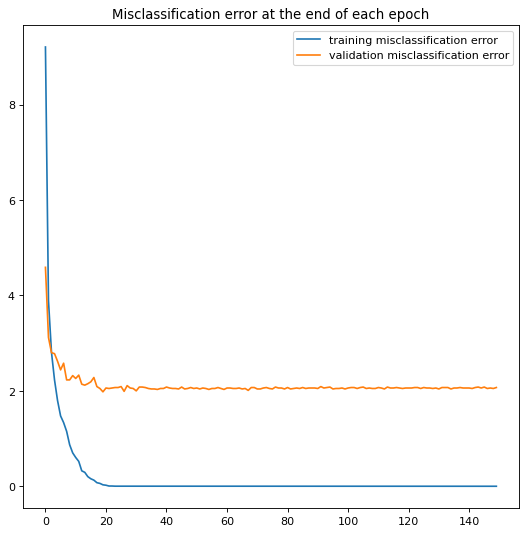

In [1587]:
figure(figsize=(8, 8), dpi=80)
plt.plot([100-t/600 for t in train_correct], label='training misclassification error')
plt.plot([100-t/100 for t in test_correct], label='validation misclassification error')
plt.title('Misclassification error at the end of each epoch')
plt.legend();

In [1588]:
test_cc = [t/100 for t in test_correct]
max_index = test_cc.index(max(test_cc))
max_index

19

In [1589]:
test_cc[max_index]

tensor(98.0200)

### momentum of 0.0

Which is the same as what we did in part a&b

In [1593]:
model = Model()
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.1,momentum = 0.0)

In [1594]:
torch.manual_seed(101)  # for reproduce 

train_loader = DataLoader(train_data, batch_size=100, shuffle=True)

test_loader = DataLoader(test_data, batch_size=500, shuffle=False)

In [1595]:
# 1st trainning
import time
start_time = time.time()

torch.manual_seed(42)
epochs = 150
train_losses = []
test_losses = []
train_correct = []
test_correct = []

for i in range(epochs):
    trn_corr = 0
    tst_corr = 0
    
    # Run the training batches
    for b, (X_train, y_train) in enumerate(train_loader):
        
        b+=1
        
        # Apply the model
        y_pred = model(X_train.view(100, -1))  # Here to flatten X_train
        loss = criterion(y_pred, y_train)
 
        # Tally the number of correct predictions
        predicted = torch.max(y_pred.data, 1)[1]
        batch_corr = (predicted == y_train).sum()
        trn_corr += batch_corr
        
        # Update parameters
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        # Print interim results
        if b%200 == 0 and i%30 == 0:
            print(f'epoch: {i:2}  batch: {b:4} [{100*b:6}/60000]  loss: {loss.item():10.8f}  \
accuracy: {trn_corr.item()*100/(100*b):7.3f}%')
    
    # Update train loss & accuracy for the epoch
    train_losses.append(loss)
    train_correct.append(trn_corr)
        
    # Run the testing batches
    with torch.no_grad():
        for b, (X_test, y_test) in enumerate(test_loader):

            # Apply the model
            y_val = model(X_test.view(500, -1))  # Here we flatten X_test

            # Tally the number of correct predictions
            predicted = torch.max(y_val.data, 1)[1] 
            tst_corr += (predicted == y_test).sum()
    
    # Update test loss & accuracy for the epoch
    loss = criterion(y_val, y_test)
    test_losses.append(loss)
    test_correct.append(tst_corr)
        
print(f'\nDuration: {time.time() - start_time:.0f} seconds') # print the time elapsed    

epoch:  0  batch:  200 [ 20000/60000]  loss: 0.38246700  accuracy:  79.740%
epoch:  0  batch:  400 [ 40000/60000]  loss: 0.33883560  accuracy:  84.558%
epoch:  0  batch:  600 [ 60000/60000]  loss: 0.32703426  accuracy:  86.600%
epoch: 30  batch:  200 [ 20000/60000]  loss: 0.03754072  accuracy:  99.545%
epoch: 30  batch:  400 [ 40000/60000]  loss: 0.01524021  accuracy:  99.530%
epoch: 30  batch:  600 [ 60000/60000]  loss: 0.00761934  accuracy:  99.503%
epoch: 60  batch:  200 [ 20000/60000]  loss: 0.00364678  accuracy:  99.970%
epoch: 60  batch:  400 [ 40000/60000]  loss: 0.00740200  accuracy:  99.970%
epoch: 60  batch:  600 [ 60000/60000]  loss: 0.00483748  accuracy:  99.967%
epoch: 90  batch:  200 [ 20000/60000]  loss: 0.00558591  accuracy:  99.995%
epoch: 90  batch:  400 [ 40000/60000]  loss: 0.00181210  accuracy:  99.998%
epoch: 90  batch:  600 [ 60000/60000]  loss: 0.00049784  accuracy:  99.997%
epoch: 120  batch:  200 [ 20000/60000]  loss: 0.00116861  accuracy: 100.000%
epoch: 120 

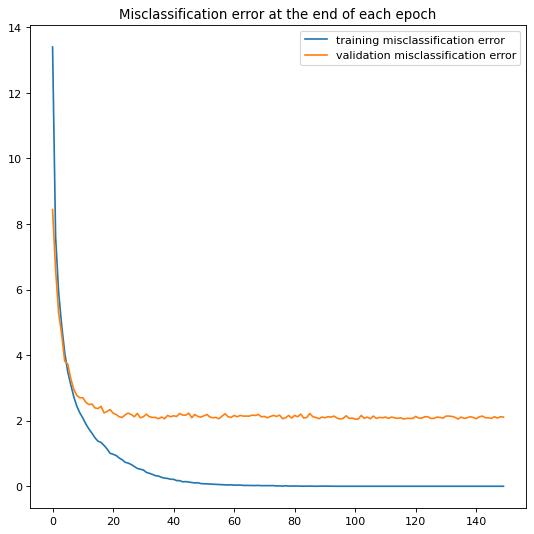

In [1597]:
figure(figsize=(8, 8), dpi=80)
plt.plot([100-t/600 for t in train_correct], label='training misclassification error')
plt.plot([100-t/100 for t in test_correct], label='validation misclassification error')
plt.title('Misclassification error at the end of each epoch')
plt.legend();

In [1598]:
test_cc = [t/100 for t in test_correct]
max_index = test_cc.index(max(test_cc))
max_index

95

In [1599]:
test_cc[max_index]

tensor(97.9500)

In [1600]:
test_cc[max_index]

tensor(97.9500)

### momentum of 0.5

In [1601]:
model = Model()
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.1, momentum=0.5)

In [1602]:
torch.manual_seed(101)  # for reproduce 

train_loader = DataLoader(train_data, batch_size=100, shuffle=True)

test_loader = DataLoader(test_data, batch_size=500, shuffle=False)

In [1603]:
# 1st trainning
import time
start_time = time.time()

torch.manual_seed(42)
epochs = 150
train_losses = []
test_losses = []
train_correct = []
test_correct = []

for i in range(epochs):
    trn_corr = 0
    tst_corr = 0
    
    # Run the training batches
    for b, (X_train, y_train) in enumerate(train_loader):
        
        b+=1
        
        # Apply the model
        y_pred = model(X_train.view(100, -1))  # Here to flatten X_train
        loss = criterion(y_pred, y_train)
 
        # Tally the number of correct predictions
        predicted = torch.max(y_pred.data, 1)[1]
        batch_corr = (predicted == y_train).sum()
        trn_corr += batch_corr
        
        # Update parameters
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        # Print interim results
        if b%200 == 0 and i%30 == 0:
            print(f'epoch: {i:2}  batch: {b:4} [{100*b:6}/60000]  loss: {loss.item():10.8f}  \
accuracy: {trn_corr.item()*100/(100*b):7.3f}%')
    
    # Update train loss & accuracy for the epoch
    train_losses.append(loss)
    train_correct.append(trn_corr)
        
    # Run the testing batches
    with torch.no_grad():
        for b, (X_test, y_test) in enumerate(test_loader):

            # Apply the model
            y_val = model(X_test.view(500, -1))  # Here we flatten X_test

            # Tally the number of correct predictions
            predicted = torch.max(y_val.data, 1)[1] 
            tst_corr += (predicted == y_test).sum()
    
    # Update test loss & accuracy for the epoch
    loss = criterion(y_val, y_test)
    test_losses.append(loss)
    test_correct.append(tst_corr)
        
print(f'\nDuration: {time.time() - start_time:.0f} seconds') # print the time elapsed    

epoch:  0  batch:  200 [ 20000/60000]  loss: 0.33728120  accuracy:  83.720%
epoch:  0  batch:  400 [ 40000/60000]  loss: 0.26278970  accuracy:  87.200%
epoch:  0  batch:  600 [ 60000/60000]  loss: 0.24586096  accuracy:  88.880%
epoch: 30  batch:  200 [ 20000/60000]  loss: 0.01231473  accuracy:  99.920%
epoch: 30  batch:  400 [ 40000/60000]  loss: 0.00870520  accuracy:  99.910%
epoch: 30  batch:  600 [ 60000/60000]  loss: 0.00567897  accuracy:  99.902%
epoch: 60  batch:  200 [ 20000/60000]  loss: 0.00174549  accuracy: 100.000%
epoch: 60  batch:  400 [ 40000/60000]  loss: 0.00175070  accuracy: 100.000%
epoch: 60  batch:  600 [ 60000/60000]  loss: 0.00153420  accuracy:  99.998%
epoch: 90  batch:  200 [ 20000/60000]  loss: 0.00198455  accuracy: 100.000%
epoch: 90  batch:  400 [ 40000/60000]  loss: 0.00094433  accuracy: 100.000%
epoch: 90  batch:  600 [ 60000/60000]  loss: 0.00039620  accuracy: 100.000%
epoch: 120  batch:  200 [ 20000/60000]  loss: 0.00052787  accuracy: 100.000%
epoch: 120 

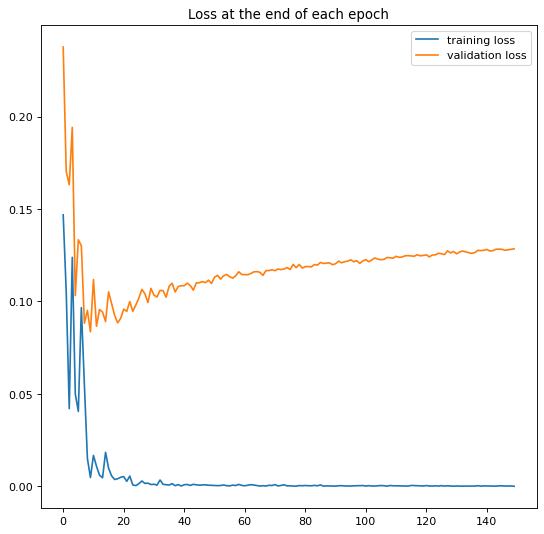

In [1586]:
trl = [loss.item() for loss in train_losses ]
tel = [loss.item() for loss in test_losses ]



figure(figsize=(8, 8), dpi=80)
plt.plot(trl, label='training loss')
plt.plot(tel, label='validation loss')
plt.title('Loss at the end of each epoch')
plt.legend();

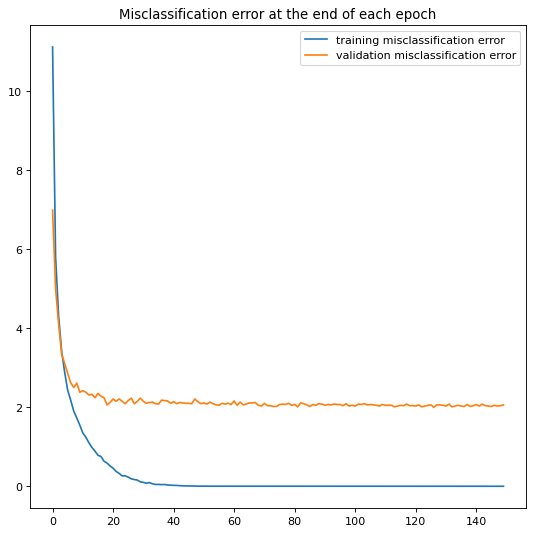

In [1604]:
figure(figsize=(8, 8), dpi=80)
plt.plot([100-t/600 for t in train_correct], label='training misclassification error')
plt.plot([100-t/100 for t in test_correct], label='validation misclassification error')
plt.title('Misclassification error at the end of each epoch')
plt.legend();

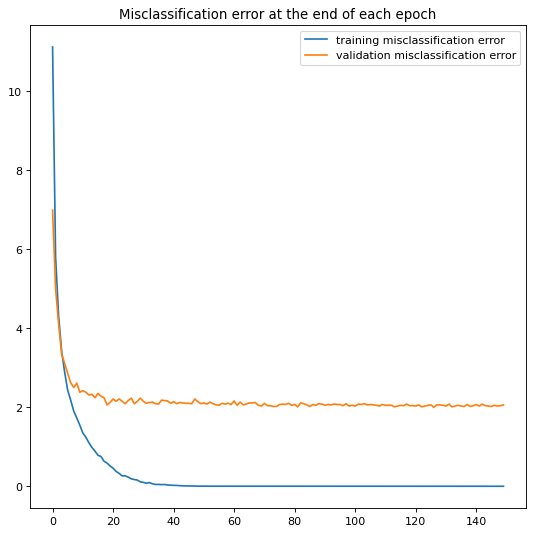

In [1605]:
figure(figsize=(8, 8), dpi=80)
plt.plot([100-t/600 for t in train_correct], label='training misclassification error')
plt.plot([100-t/100 for t in test_correct], label='validation misclassification error')
plt.title('Misclassification error at the end of each epoch')
plt.legend();

In [1606]:
test_cc = [t/100 for t in test_correct]
max_index = test_cc.index(max(test_cc))
max_index

126

In [1607]:
test_cc[max_index]

tensor(98.)

### momentum of 0.9

In [1608]:
model = Model()
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.1, momentum=0.9)

In [1609]:
torch.manual_seed(101)  # for reproduce 

train_loader = DataLoader(train_data, batch_size=100, shuffle=True)

test_loader = DataLoader(test_data, batch_size=500, shuffle=False)

In [1610]:
# 1st trainning
import time
start_time = time.time()

torch.manual_seed(42)
epochs = 150
train_losses = []
test_losses = []
train_correct = []
test_correct = []

for i in range(epochs):
    trn_corr = 0
    tst_corr = 0
    
    # Run the training batches
    for b, (X_train, y_train) in enumerate(train_loader):
        
        b+=1
        
        # Apply the model
        y_pred = model(X_train.view(100, -1))  # Here to flatten X_train
        loss = criterion(y_pred, y_train)
 
        # Tally the number of correct predictions
        predicted = torch.max(y_pred.data, 1)[1]
        batch_corr = (predicted == y_train).sum()
        trn_corr += batch_corr
        
        # Update parameters
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        # Print interim results
        if b%200 == 0 and i%30 == 0:
            print(f'epoch: {i:2}  batch: {b:4} [{100*b:6}/60000]  loss: {loss.item():10.8f}  \
accuracy: {trn_corr.item()*100/(100*b):7.3f}%')
    
    # Update train loss & accuracy for the epoch
    train_losses.append(loss)
    train_correct.append(trn_corr)
        
    # Run the testing batches
    with torch.no_grad():
        for b, (X_test, y_test) in enumerate(test_loader):

            # Apply the model
            y_val = model(X_test.view(500, -1))  # Here we flatten X_test

            # Tally the number of correct predictions
            predicted = torch.max(y_val.data, 1)[1] 
            tst_corr += (predicted == y_test).sum()
    
    # Update test loss & accuracy for the epoch
    loss = criterion(y_val, y_test)
    test_losses.append(loss)
    test_correct.append(tst_corr)
        
print(f'\nDuration: {time.time() - start_time:.0f} seconds') # print the time elapsed    

epoch:  0  batch:  200 [ 20000/60000]  loss: 0.22042771  accuracy:  86.535%
epoch:  0  batch:  400 [ 40000/60000]  loss: 0.13824029  accuracy:  90.177%
epoch:  0  batch:  600 [ 60000/60000]  loss: 0.22732435  accuracy:  91.877%
epoch: 30  batch:  200 [ 20000/60000]  loss: 0.00040831  accuracy: 100.000%
epoch: 30  batch:  400 [ 40000/60000]  loss: 0.00031916  accuracy: 100.000%
epoch: 30  batch:  600 [ 60000/60000]  loss: 0.00007860  accuracy: 100.000%
epoch: 60  batch:  200 [ 20000/60000]  loss: 0.00014098  accuracy: 100.000%
epoch: 60  batch:  400 [ 40000/60000]  loss: 0.00018104  accuracy: 100.000%
epoch: 60  batch:  600 [ 60000/60000]  loss: 0.00007145  accuracy: 100.000%
epoch: 90  batch:  200 [ 20000/60000]  loss: 0.00017235  accuracy: 100.000%
epoch: 90  batch:  400 [ 40000/60000]  loss: 0.00007656  accuracy: 100.000%
epoch: 90  batch:  600 [ 60000/60000]  loss: 0.00004981  accuracy: 100.000%
epoch: 120  batch:  200 [ 20000/60000]  loss: 0.00004457  accuracy: 100.000%
epoch: 120 

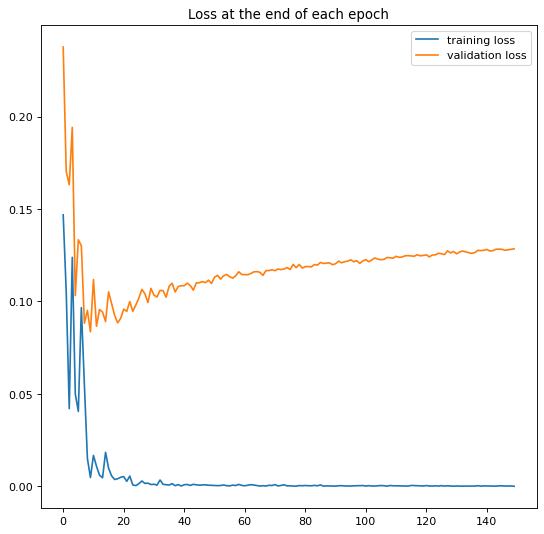

In [1586]:
trl = [loss.item() for loss in train_losses ]
tel = [loss.item() for loss in test_losses ]



figure(figsize=(8, 8), dpi=80)
plt.plot(trl, label='training loss')
plt.plot(tel, label='validation loss')
plt.title('Loss at the end of each epoch')
plt.legend();

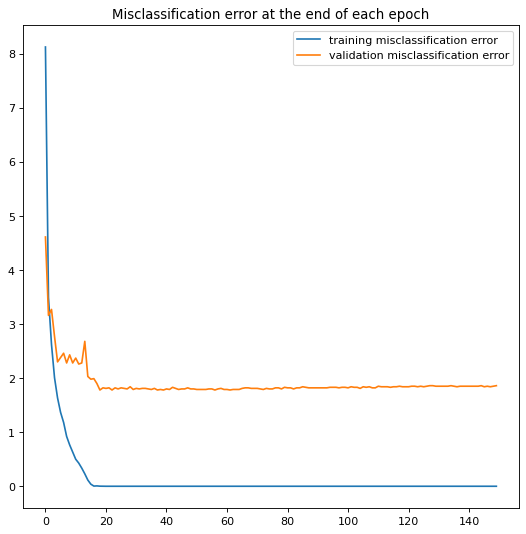

In [1612]:
figure(figsize=(8, 8), dpi=80)
plt.plot([100-t/600 for t in train_correct], label='training misclassification error')
plt.plot([100-t/100 for t in test_correct], label='validation misclassification error')
plt.title('Misclassification error at the end of each epoch')
plt.legend();

In [1613]:
test_cc = [t/100 for t in test_correct]
max_index = test_cc.index(max(test_cc))
max_index

18

In [1614]:
test_cc[max_index]

tensor(98.2200)

## 4. CNN

Since CNN works with immages, we would like to have relatively small batches

In [1856]:
train_loader = DataLoader(train_data, batch_size=10, shuffle=True)
test_loader = DataLoader(test_data, batch_size=10, shuffle=False)

### a&b

In [1857]:
class ConvolutionalNetwork(nn.Module):
    def __init__(self):
        # one 2-D convolutional layers
        super().__init__()
        self.conv1 = nn.Conv2d(1, 16, 3, 1)
        self.out = nn.Linear(13*13*16,10)

    def forward(self, X):
        # one 2-D convolutional layers -> Relu activation -> Maxpooling
        X = F.relu(self.conv1(X))
        X = F.max_pool2d(X, 2, 2)
        X = X.view(-1,13*13*16)      
        X = self.out(X)
        return F.log_softmax(X, dim=1)

In [1858]:
torch.manual_seed(42)
cnn_model = ConvolutionalNetwork()
cnn_model

ConvolutionalNetwork(
  (conv1): Conv2d(1, 16, kernel_size=(3, 3), stride=(1, 1))
  (out): Linear(in_features=2704, out_features=10, bias=True)
)

In [1859]:
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(cnn_model.parameters(), lr=0.1)

In [1860]:
import time
start_time = time.time()

epochs = 90
train_losses = []
test_losses = []
train_correct = []
test_correct = []

for i in range(epochs):
    trn_corr = 0
    tst_corr = 0
    
    # Run the training batches
    for b, (X_train, y_train) in enumerate(train_loader):
        b+=1
        
        # Apply the model
        y_pred = cnn_model(X_train)  # we don't flatten X-train here
        loss = criterion(y_pred, y_train)
 
        # Tally the number of correct predictions
        predicted = torch.max(y_pred.data, 1)[1]
        batch_corr = (predicted == y_train).sum()
        trn_corr += batch_corr
        
        # Update parameters
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        # Print interim results
        if b%6000 == 0 and i%30==0:
            print(f'epoch: {i:2}  batch: {b:4} [{10*b:6}/60000]  loss: {loss.item():10.8f}  \
accuracy: {trn_corr.item()*100/(10*b):7.3f}%')
        
    train_losses.append(loss)
    train_correct.append(trn_corr)
        
    # Run the testing batches
    with torch.no_grad():
        for b, (X_test, y_test) in enumerate(test_loader):

            # Apply the model
            y_val = cnn_model(X_test)

            # Tally the number of correct predictions
            predicted = torch.max(y_val.data, 1)[1] 
            tst_corr += (predicted == y_test).sum()
            
    loss = criterion(y_val, y_test)
    test_losses.append(loss)
    test_correct.append(tst_corr)
        
print(f'\nDuration: {time.time() - start_time:.0f} seconds') # print the time elapsed            

epoch:  0  batch: 6000 [ 60000/60000]  loss: 0.03005195  accuracy:  95.060%
epoch: 30  batch: 6000 [ 60000/60000]  loss: 0.00009294  accuracy:  99.967%
epoch: 60  batch: 6000 [ 60000/60000]  loss: 0.00000144  accuracy: 100.000%

Duration: 1671 seconds


## Plot the loss and accuracy comparisons

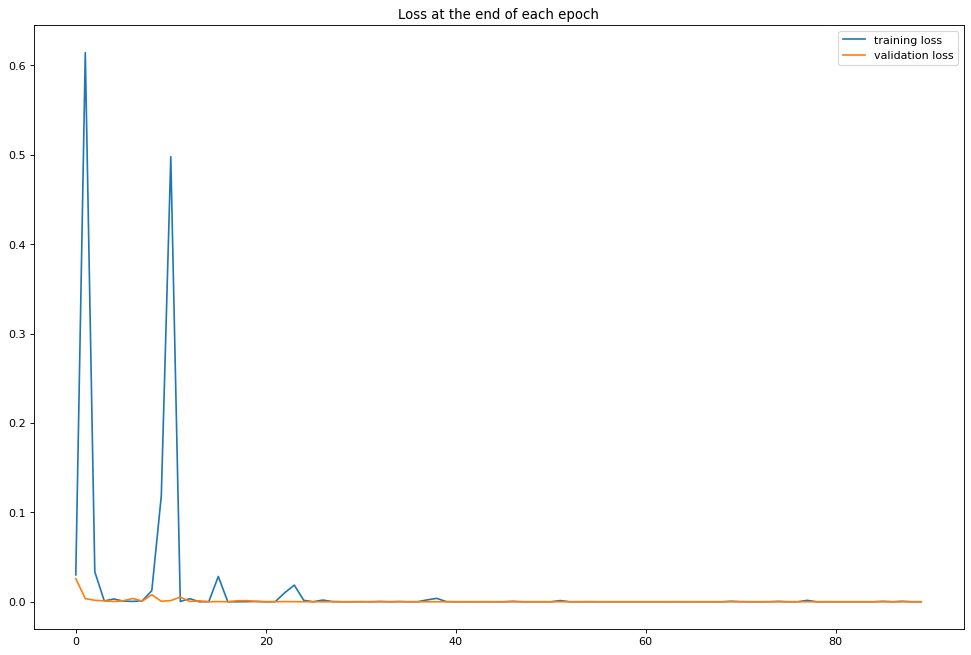

In [1861]:
## loss
trl = [loss.item() for loss in train_losses ]
tel = [loss.item() for loss in test_losses ]

figure(figsize=(15, 10), dpi=80)
plt.plot(trl, label='training loss')
plt.plot(tel, label='validation loss')
plt.title('Loss at the end of each epoch')
plt.legend();

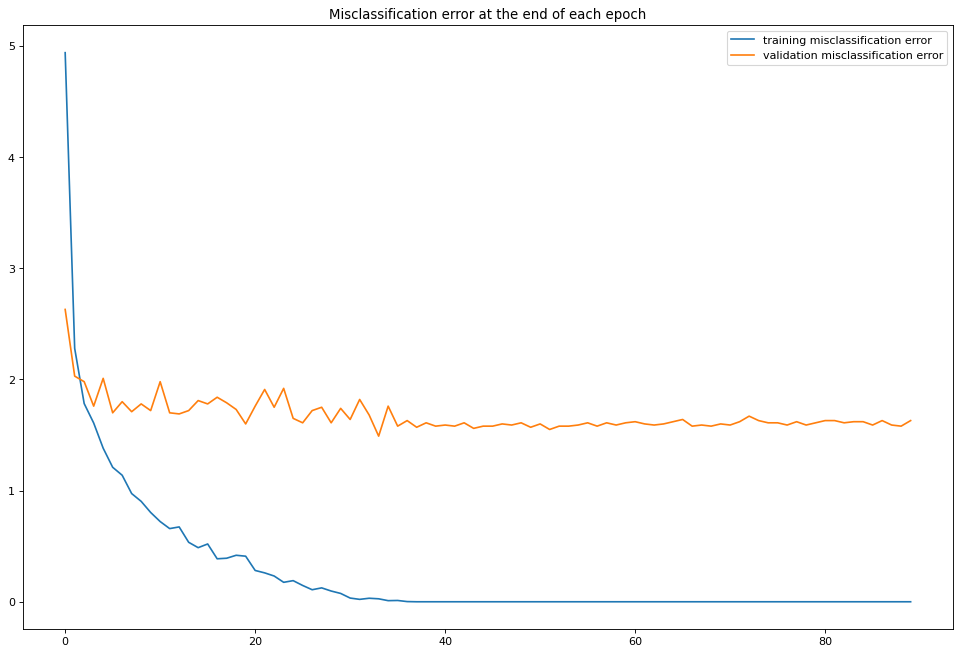

In [1862]:
## Misclassification
figure(figsize=(15, 10), dpi=80)
plt.plot([100-t/600 for t in train_correct], label='training misclassification error')
plt.plot([100-t/100 for t in test_correct], label='validation misclassification error')
plt.title('Misclassification error at the end of each epoch')
plt.legend();

In [1863]:
# Extract the data all at once, not in batches
test_load_all = DataLoader(test_data, batch_size=10000, shuffle=False)

In [1864]:
with torch.no_grad():
    correct = 0
    for X_test, y_test in test_load_all:
        y_val = cnn_model(X_test)  # we don't flatten the data this time
        predicted = torch.max(y_val,1)[1]
        correct += (predicted == y_test).sum()
print(f'Test accuracy: {correct.item()}/{len(test_data)} = {correct.item()*100/(len(test_data)):7.3f}%')

Test accuracy: 9837/10000 =  98.370%


In [1865]:
test_cc = [t/100 for t in test_correct]
max_index = test_cc.index(max(test_cc))
print(f'epoch with the best reslut: {max_index}')
print(f'best test accuracy is: {test_cc[max_index]}')

epoch with the best reslut: 33
best test accuracy is: 98.51000213623047


As we can see that CNN converges faster than ANN and so there is no need to use that many epochs to train the data.

## c

In [1873]:
weights = []
for wei in cnn_model.parameters():
    weights.append(wei.detach().cpu().numpy())

In [1883]:
weights[2].shape

(10, 2704)

<Figure size 1200x1600 with 0 Axes>

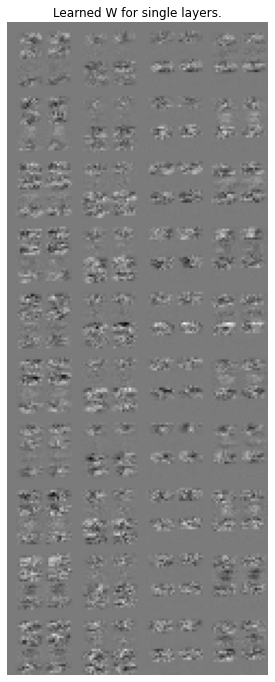

In [1890]:

# Assemble to images.
fc_images = weights[2].reshape(10, 4, 26, 26)
pad_images = np.zeros((10, 4, 30, 30))
pad_images[:, :, 4:30, 4:30] = fc_images
fc_vis = np.transpose(pad_images, (0, 2, 1, 3)).reshape(300, 120)

# Show weights.
figure(figsize=(15, 20), dpi=80)
plt.figure(figsize=(12, 12))
plt.imshow(fc_vis, cmap='gray')
plt.title("Learned W for single layers.")
plt.axis("off")
plt.show()

## d

### lr = 0.01

In [1630]:
torch.manual_seed(42)
cnn_model = ConvolutionalNetwork()
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(cnn_model.parameters(), lr=0.01)

In [1631]:
import time
start_time = time.time()

epochs = 90
train_losses = []
test_losses = []
train_correct = []
test_correct = []

for i in range(epochs):
    trn_corr = 0
    tst_corr = 0
    
    # Run the training batches
    for b, (X_train, y_train) in enumerate(train_loader):
        b+=1
        
        # Apply the model
        y_pred = cnn_model(X_train)  # we don't flatten X-train here
        loss = criterion(y_pred, y_train)
 
        # Tally the number of correct predictions
        predicted = torch.max(y_pred.data, 1)[1]
        batch_corr = (predicted == y_train).sum()
        trn_corr += batch_corr
        
        # Update parameters
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        # Print interim results
        if b%600 == 0 and i%30==0:
            print(f'epoch: {i:2}  batch: {b:4} [{10*b:6}/60000]  loss: {loss.item():10.8f}  \
accuracy: {trn_corr.item()*100/(10*b):7.3f}%')
        
    train_losses.append(loss)
    train_correct.append(trn_corr)
        
    # Run the testing batches
    with torch.no_grad():
        for b, (X_test, y_test) in enumerate(test_loader):

            # Apply the model
            y_val = cnn_model(X_test)

            # Tally the number of correct predictions
            predicted = torch.max(y_val.data, 1)[1] 
            tst_corr += (predicted == y_test).sum()
            
    loss = criterion(y_val, y_test)
    test_losses.append(loss)
    test_correct.append(tst_corr)
        
print(f'\nDuration: {time.time() - start_time:.0f} seconds') # print the time elapsed            

epoch:  0  batch:  600 [  6000/60000]  loss: 0.50055379  accuracy:  77.100%
epoch:  0  batch: 1200 [ 12000/60000]  loss: 0.23785670  accuracy:  82.625%
epoch:  0  batch: 1800 [ 18000/60000]  loss: 0.58887845  accuracy:  84.589%
epoch:  0  batch: 2400 [ 24000/60000]  loss: 0.46157807  accuracy:  85.796%
epoch:  0  batch: 3000 [ 30000/60000]  loss: 1.07298303  accuracy:  86.640%
epoch:  0  batch: 3600 [ 36000/60000]  loss: 0.55626756  accuracy:  87.231%
epoch:  0  batch: 4200 [ 42000/60000]  loss: 0.18289649  accuracy:  87.736%
epoch:  0  batch: 4800 [ 48000/60000]  loss: 0.55979478  accuracy:  88.100%
epoch:  0  batch: 5400 [ 54000/60000]  loss: 0.33777782  accuracy:  88.496%
epoch:  0  batch: 6000 [ 60000/60000]  loss: 0.19239928  accuracy:  88.852%
epoch: 30  batch:  600 [  6000/60000]  loss: 0.00091206  accuracy:  99.083%
epoch: 30  batch: 1200 [ 12000/60000]  loss: 0.04468038  accuracy:  99.125%
epoch: 30  batch: 1800 [ 18000/60000]  loss: 0.09834365  accuracy:  99.133%
epoch: 30  b

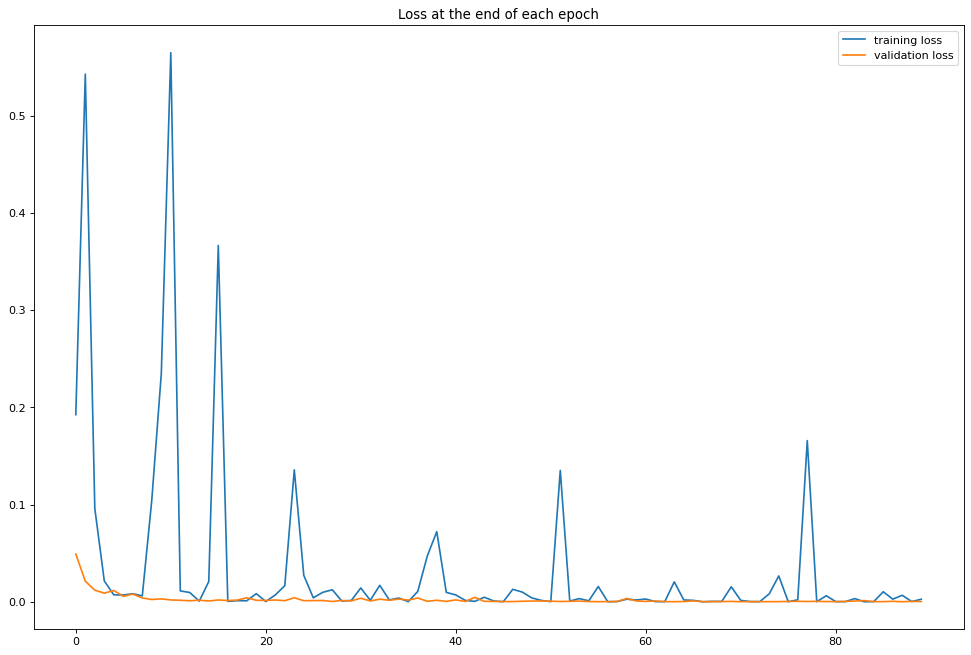

In [1632]:
## loss
trl = [loss.item() for loss in train_losses ]
tel = [loss.item() for loss in test_losses ]

figure(figsize=(15, 10), dpi=80)
plt.plot(trl, label='training loss')
plt.plot(tel, label='validation loss')
plt.title('Loss at the end of each epoch')
plt.legend();

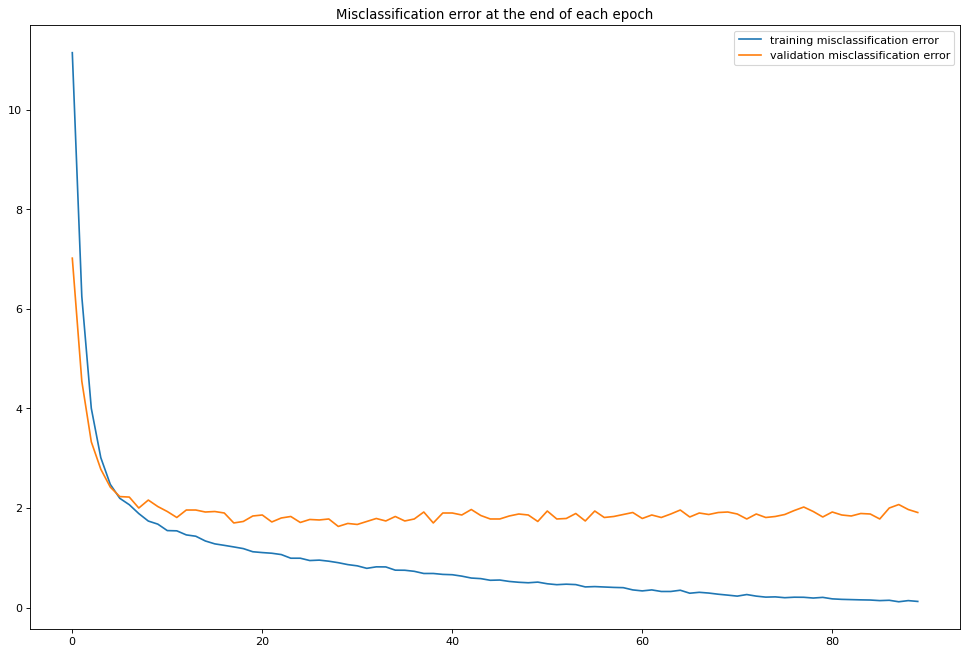

In [1633]:
## Misclassification
figure(figsize=(15, 10), dpi=80)
plt.plot([100-t/600 for t in train_correct], label='training misclassification error')
plt.plot([100-t/100 for t in test_correct], label='validation misclassification error')
plt.title('Misclassification error at the end of each epoch')
plt.legend();

In [1634]:
with torch.no_grad():
    correct = 0
    for X_test, y_test in test_load_all:
        y_val = cnn_model(X_test)  # we don't flatten the data this time
        predicted = torch.max(y_val,1)[1]
        correct += (predicted == y_test).sum()
print(f'Test accuracy: {correct.item()}/{len(test_data)} = {correct.item()*100/(len(test_data)):7.3f}%')

Test accuracy: 9809/10000 =  98.090%


In [1635]:
test_cc = [t/100 for t in test_correct]
max_index = test_cc.index(max(test_cc))
print(f'epoch with the best reslut: {max_index}')
print(f'best test accuracy is: {test_cc[max_index]}')

epoch with the best reslut: 28
best test accuracy is: 98.37000274658203


### lr = 0.2

In [1636]:
torch.manual_seed(42)
cnn_model = ConvolutionalNetwork()
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(cnn_model.parameters(), lr=0.2)

In [1637]:
import time
start_time = time.time()

epochs = 90
train_losses = []
test_losses = []
train_correct = []
test_correct = []

for i in range(epochs):
    trn_corr = 0
    tst_corr = 0
    
    # Run the training batches
    for b, (X_train, y_train) in enumerate(train_loader):
        b+=1
        
        # Apply the model
        y_pred = cnn_model(X_train)  # we don't flatten X-train here
        loss = criterion(y_pred, y_train)
 
        # Tally the number of correct predictions
        predicted = torch.max(y_pred.data, 1)[1]
        batch_corr = (predicted == y_train).sum()
        trn_corr += batch_corr
        
        # Update parameters
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        # Print interim results
        if b%600 == 0 and i%30==0:
            print(f'epoch: {i:2}  batch: {b:4} [{10*b:6}/60000]  loss: {loss.item():10.8f}  \
accuracy: {trn_corr.item()*100/(10*b):7.3f}%')
        
    train_losses.append(loss)
    train_correct.append(trn_corr)
        
    # Run the testing batches
    with torch.no_grad():
        for b, (X_test, y_test) in enumerate(test_loader):

            # Apply the model
            y_val = cnn_model(X_test)

            # Tally the number of correct predictions
            predicted = torch.max(y_val.data, 1)[1] 
            tst_corr += (predicted == y_test).sum()
            
    loss = criterion(y_val, y_test)
    test_losses.append(loss)
    test_correct.append(tst_corr)
        
print(f'\nDuration: {time.time() - start_time:.0f} seconds') # print the time elapsed            

epoch:  0  batch:  600 [  6000/60000]  loss: 0.50748360  accuracy:  84.983%
epoch:  0  batch: 1200 [ 12000/60000]  loss: 0.19890423  accuracy:  88.975%
epoch:  0  batch: 1800 [ 18000/60000]  loss: 0.13588084  accuracy:  90.733%
epoch:  0  batch: 2400 [ 24000/60000]  loss: 0.65372181  accuracy:  91.600%
epoch:  0  batch: 3000 [ 30000/60000]  loss: 0.37344941  accuracy:  92.317%
epoch:  0  batch: 3600 [ 36000/60000]  loss: 0.24777575  accuracy:  92.747%
epoch:  0  batch: 4200 [ 42000/60000]  loss: 0.07369316  accuracy:  93.162%
epoch:  0  batch: 4800 [ 48000/60000]  loss: 0.75884545  accuracy:  93.463%
epoch:  0  batch: 5400 [ 54000/60000]  loss: 0.00106479  accuracy:  93.706%
epoch:  0  batch: 6000 [ 60000/60000]  loss: 0.06649792  accuracy:  93.942%
epoch: 30  batch:  600 [  6000/60000]  loss: 0.00001135  accuracy:  99.283%
epoch: 30  batch: 1200 [ 12000/60000]  loss: 0.16929491  accuracy:  99.408%
epoch: 30  batch: 1800 [ 18000/60000]  loss: 0.00398919  accuracy:  99.361%
epoch: 30  b

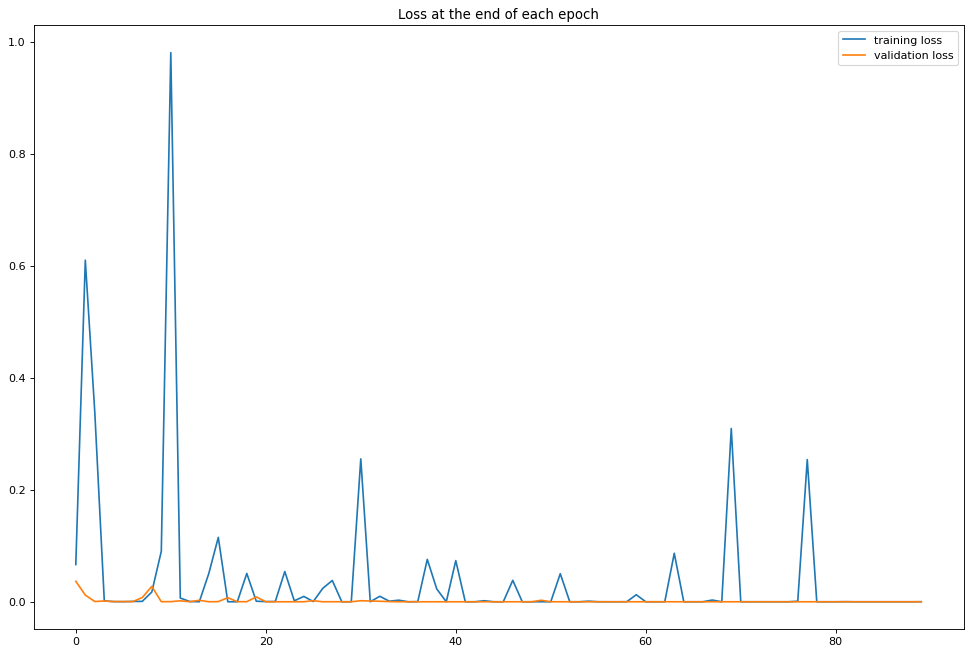

In [1638]:
## loss
trl = [loss.item() for loss in train_losses ]
tel = [loss.item() for loss in test_losses ]

figure(figsize=(15, 10), dpi=80)
plt.plot(trl, label='training loss')
plt.plot(tel, label='validation loss')
plt.title('Loss at the end of each epoch')
plt.legend();

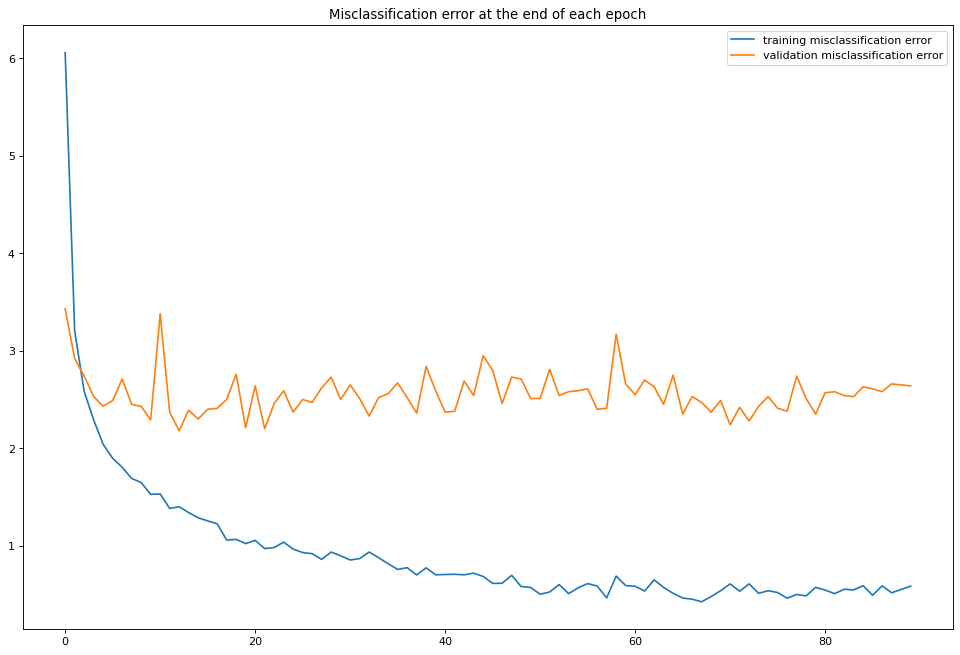

In [1639]:
## Misclassification
figure(figsize=(15, 10), dpi=80)
plt.plot([100-t/600 for t in train_correct], label='training misclassification error')
plt.plot([100-t/100 for t in test_correct], label='validation misclassification error')
plt.title('Misclassification error at the end of each epoch')
plt.legend();

In [1640]:
with torch.no_grad():
    correct = 0
    for X_test, y_test in test_load_all:
        y_val = cnn_model(X_test)  # we don't flatten the data this time
        predicted = torch.max(y_val,1)[1]
        correct += (predicted == y_test).sum()
print(f'Test accuracy: {correct.item()}/{len(test_data)} = {correct.item()*100/(len(test_data)):7.3f}%')

Test accuracy: 9736/10000 =  97.360%


In [1641]:
test_cc = [t/100 for t in test_correct]
max_index = test_cc.index(max(test_cc))
print(f'epoch with the best reslut: {max_index}')
print(f'best test accuracy is: {test_cc[max_index]}')

epoch with the best reslut: 12
best test accuracy is: 97.81999969482422


### lr = 0.5

In [1733]:
torch.manual_seed(42)
cnn_model = ConvolutionalNetwork()
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(cnn_model.parameters(), lr=0.5)

In [1734]:
import time
start_time = time.time()

epochs = 90
train_losses = []
test_losses = []
train_correct = []
test_correct = []

for i in range(epochs):
    trn_corr = 0
    tst_corr = 0
    
    # Run the training batches
    for b, (X_train, y_train) in enumerate(train_loader):
        b+=1
        
        # Apply the model
        y_pred = cnn_model(X_train)  # we don't flatten X-train here
        loss = criterion(y_pred, y_train)
 
        # Tally the number of correct predictions
        predicted = torch.max(y_pred.data, 1)[1]
        batch_corr = (predicted == y_train).sum()
        trn_corr += batch_corr
        
        # Update parameters
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        # Print interim results
        if b%600 == 0 and i%30==0:
            print(f'epoch: {i:2}  batch: {b:4} [{10*b:6}/60000]  loss: {loss.item():10.8f}  \
accuracy: {trn_corr.item()*100/(10*b):7.3f}%')
        
    train_losses.append(loss)
    train_correct.append(trn_corr)
        
    # Run the testing batches
    with torch.no_grad():
        for b, (X_test, y_test) in enumerate(test_loader):

            # Apply the model
            y_val = cnn_model(X_test)

            # Tally the number of correct predictions
            predicted = torch.max(y_val.data, 1)[1] 
            tst_corr += (predicted == y_test).sum()
            
    loss = criterion(y_val, y_test)
    test_losses.append(loss)
    test_correct.append(tst_corr)
        
print(f'\nDuration: {time.time() - start_time:.0f} seconds') # print the time elapsed            

epoch:  0  batch:  600 [  6000/60000]  loss: 2.36434174  accuracy:  55.417%
epoch:  0  batch: 1200 [ 12000/60000]  loss: 2.30287886  accuracy:  33.033%
epoch:  0  batch: 1800 [ 18000/60000]  loss: 2.31059504  accuracy:  25.622%
epoch:  0  batch: 2400 [ 24000/60000]  loss: 2.26221704  accuracy:  21.800%
epoch:  0  batch: 3000 [ 30000/60000]  loss: 2.33690834  accuracy:  19.470%
epoch:  0  batch: 3600 [ 36000/60000]  loss: 2.30793858  accuracy:  17.975%
epoch:  0  batch: 4200 [ 42000/60000]  loss: 2.29981470  accuracy:  16.871%
epoch:  0  batch: 4800 [ 48000/60000]  loss: 2.28068233  accuracy:  16.044%
epoch:  0  batch: 5400 [ 54000/60000]  loss: 2.36272764  accuracy:  15.428%
epoch:  0  batch: 6000 [ 60000/60000]  loss: 2.33977842  accuracy:  14.873%
epoch: 30  batch:  600 [  6000/60000]  loss: 2.26986527  accuracy:  11.050%
epoch: 30  batch: 1200 [ 12000/60000]  loss: 2.36418343  accuracy:  10.508%
epoch: 30  batch: 1800 [ 18000/60000]  loss: 2.34814286  accuracy:  10.539%
epoch: 30  b

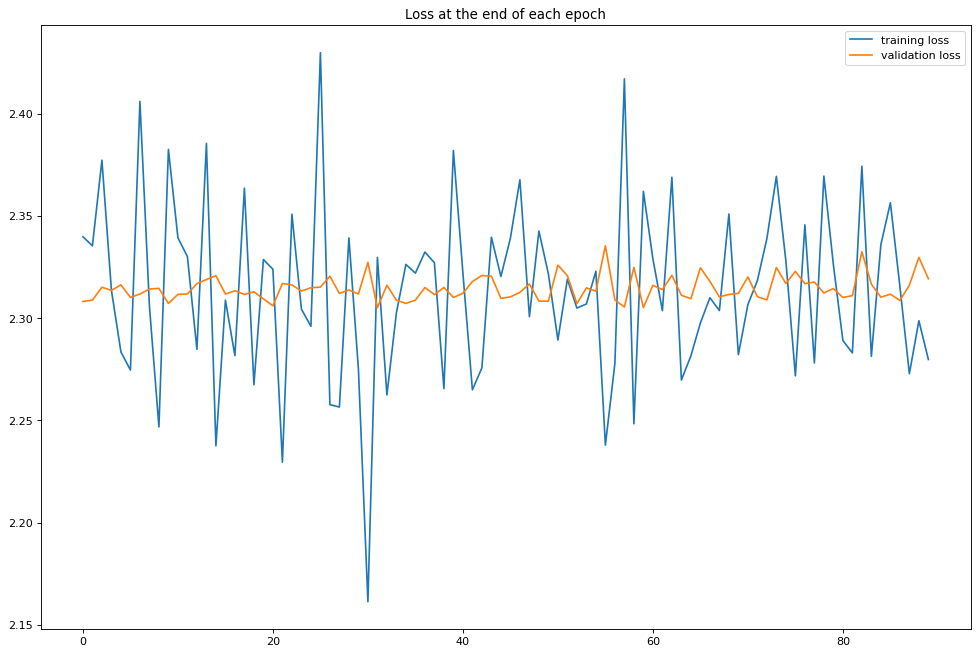

In [1735]:
## loss
trl = [loss.item() for loss in train_losses ]
tel = [loss.item() for loss in test_losses ]

figure(figsize=(15, 10), dpi=80)
plt.plot(trl, label='training loss')
plt.plot(tel, label='validation loss')
plt.title('Loss at the end of each epoch')
plt.legend();

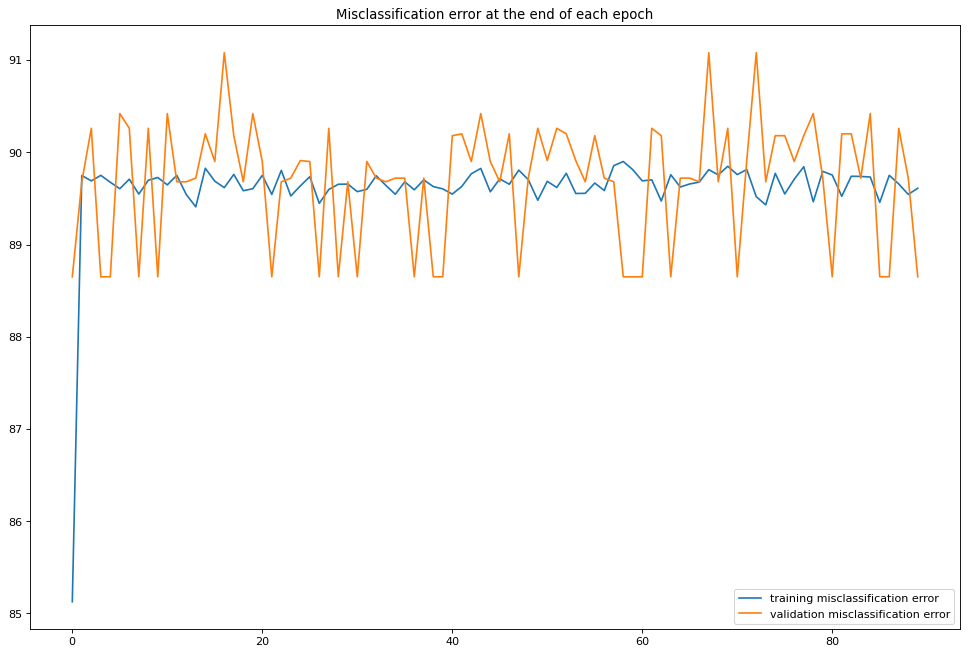

In [1736]:
## Misclassification
figure(figsize=(15, 10), dpi=80)
plt.plot([100-t/600 for t in train_correct], label='training misclassification error')
plt.plot([100-t/100 for t in test_correct], label='validation misclassification error')
plt.title('Misclassification error at the end of each epoch')
plt.legend();

In [1738]:
test_cc = [t/100 for t in test_correct]
max_index = test_cc.index(max(test_cc))
print(f'epoch with the best reslut: {max_index}')
print(f'best test accuracy is: {test_cc[max_index]}')

epoch with the best reslut: 0
best test accuracy is: 11.350000381469727


### momentum = 0.0

In [1648]:
torch.manual_seed(42)
cnn_model = ConvolutionalNetwork()
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(cnn_model.parameters(), lr=0.1,momentum=0.0)

In [1649]:
import time
start_time = time.time()

epochs = 90
train_losses = []
test_losses = []
train_correct = []
test_correct = []

for i in range(epochs):
    trn_corr = 0
    tst_corr = 0
    
    # Run the training batches
    for b, (X_train, y_train) in enumerate(train_loader):
        b+=1
        
        # Apply the model
        y_pred = cnn_model(X_train)  # we don't flatten X-train here
        loss = criterion(y_pred, y_train)
 
        # Tally the number of correct predictions
        predicted = torch.max(y_pred.data, 1)[1]
        batch_corr = (predicted == y_train).sum()
        trn_corr += batch_corr
        
        # Update parameters
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        # Print interim results
        if b%600 == 0 and i%30==0:
            print(f'epoch: {i:2}  batch: {b:4} [{10*b:6}/60000]  loss: {loss.item():10.8f}  \
accuracy: {trn_corr.item()*100/(10*b):7.3f}%')
        
    train_losses.append(loss)
    train_correct.append(trn_corr)
        
    # Run the testing batches
    with torch.no_grad():
        for b, (X_test, y_test) in enumerate(test_loader):

            # Apply the model
            y_val = cnn_model(X_test)

            # Tally the number of correct predictions
            predicted = torch.max(y_val.data, 1)[1] 
            tst_corr += (predicted == y_test).sum()
            
    loss = criterion(y_val, y_test)
    test_losses.append(loss)
    test_correct.append(tst_corr)
        
print(f'\nDuration: {time.time() - start_time:.0f} seconds') # print the time elapsed            

epoch:  0  batch:  600 [  6000/60000]  loss: 0.45184571  accuracy:  84.733%
epoch:  0  batch: 1200 [ 12000/60000]  loss: 0.27163389  accuracy:  89.283%
epoch:  0  batch: 1800 [ 18000/60000]  loss: 0.17342015  accuracy:  91.372%
epoch:  0  batch: 2400 [ 24000/60000]  loss: 0.28377706  accuracy:  92.450%
epoch:  0  batch: 3000 [ 30000/60000]  loss: 0.19070533  accuracy:  93.230%
epoch:  0  batch: 3600 [ 36000/60000]  loss: 0.08363827  accuracy:  93.739%
epoch:  0  batch: 4200 [ 42000/60000]  loss: 0.05873642  accuracy:  94.186%
epoch:  0  batch: 4800 [ 48000/60000]  loss: 0.32344499  accuracy:  94.540%
epoch:  0  batch: 5400 [ 54000/60000]  loss: 0.01723357  accuracy:  94.833%
epoch:  0  batch: 6000 [ 60000/60000]  loss: 0.03005195  accuracy:  95.060%
epoch: 30  batch:  600 [  6000/60000]  loss: 0.00002879  accuracy: 100.000%
epoch: 30  batch: 1200 [ 12000/60000]  loss: 0.00096078  accuracy: 100.000%
epoch: 30  batch: 1800 [ 18000/60000]  loss: 0.00169025  accuracy:  99.989%
epoch: 30  b

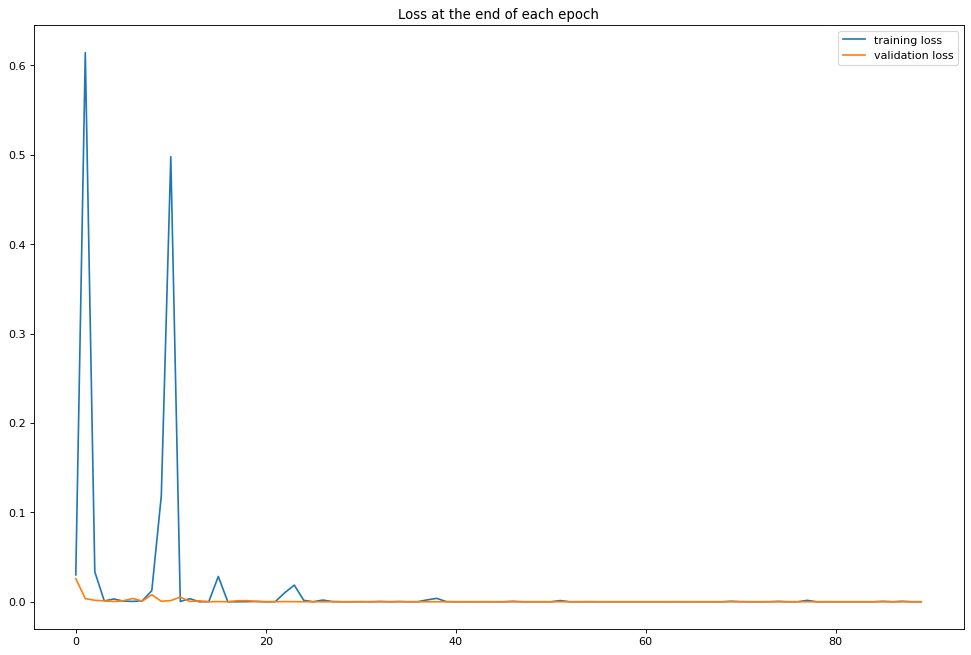

In [1650]:
## loss
trl = [loss.item() for loss in train_losses ]
tel = [loss.item() for loss in test_losses ]

figure(figsize=(15, 10), dpi=80)
plt.plot(trl, label='training loss')
plt.plot(tel, label='validation loss')
plt.title('Loss at the end of each epoch')
plt.legend();

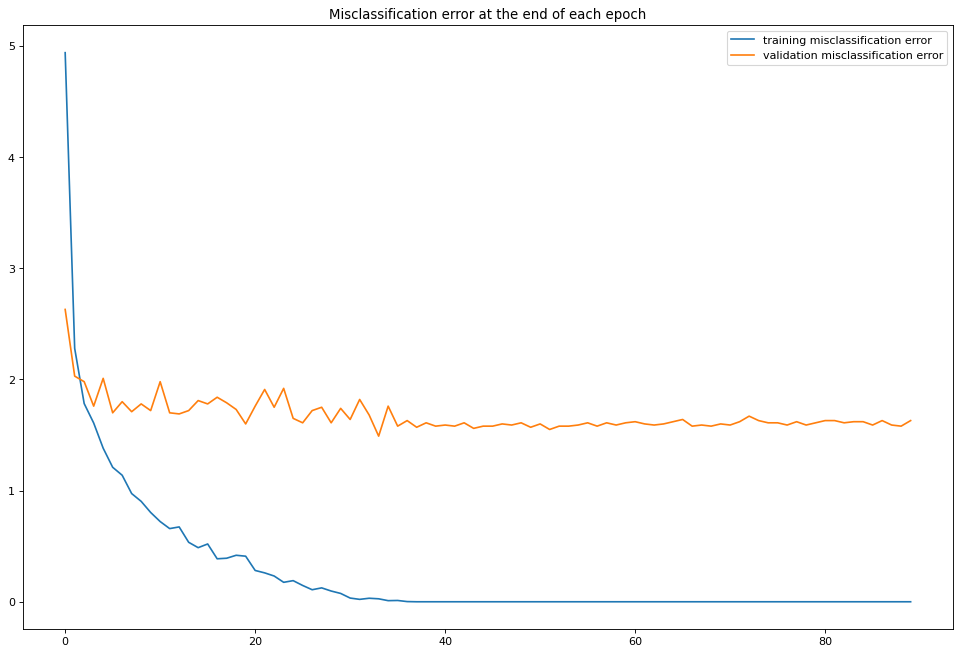

In [1651]:
## Misclassification
figure(figsize=(15, 10), dpi=80)
plt.plot([100-t/600 for t in train_correct], label='training misclassification error')
plt.plot([100-t/100 for t in test_correct], label='validation misclassification error')
plt.title('Misclassification error at the end of each epoch')
plt.legend();

In [1652]:
with torch.no_grad():
    correct = 0
    for X_test, y_test in test_load_all:
        y_val = cnn_model(X_test)  # we don't flatten the data this time
        predicted = torch.max(y_val,1)[1]
        correct += (predicted == y_test).sum()
print(f'Test accuracy: {correct.item()}/{len(test_data)} = {correct.item()*100/(len(test_data)):7.3f}%')

Test accuracy: 9837/10000 =  98.370%


In [1653]:
test_cc = [t/100 for t in test_correct]
max_index = test_cc.index(max(test_cc))
print(f'epoch with the best reslut: {max_index}')
print(f'best test accuracy is: {test_cc[max_index]}')

epoch with the best reslut: 33
best test accuracy is: 98.51000213623047


### momentum = 0.5

In [1654]:
torch.manual_seed(42)
cnn_model = ConvolutionalNetwork()
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(cnn_model.parameters(), lr=0.1,momentum=0.5)

In [1655]:
import time
start_time = time.time()

epochs = 90
train_losses = []
test_losses = []
train_correct = []
test_correct = []

for i in range(epochs):
    trn_corr = 0
    tst_corr = 0
    
    # Run the training batches
    for b, (X_train, y_train) in enumerate(train_loader):
        b+=1
        
        # Apply the model
        y_pred = cnn_model(X_train)  # we don't flatten X-train here
        loss = criterion(y_pred, y_train)
 
        # Tally the number of correct predictions
        predicted = torch.max(y_pred.data, 1)[1]
        batch_corr = (predicted == y_train).sum()
        trn_corr += batch_corr
        
        # Update parameters
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        # Print interim results
        if b%600 == 0 and i%30==0:
            print(f'epoch: {i:2}  batch: {b:4} [{10*b:6}/60000]  loss: {loss.item():10.8f}  \
accuracy: {trn_corr.item()*100/(10*b):7.3f}%')
        
    train_losses.append(loss)
    train_correct.append(trn_corr)
        
    # Run the testing batches
    with torch.no_grad():
        for b, (X_test, y_test) in enumerate(test_loader):

            # Apply the model
            y_val = cnn_model(X_test)

            # Tally the number of correct predictions
            predicted = torch.max(y_val.data, 1)[1] 
            tst_corr += (predicted == y_test).sum()
            
    loss = criterion(y_val, y_test)
    test_losses.append(loss)
    test_correct.append(tst_corr)
        
print(f'\nDuration: {time.time() - start_time:.0f} seconds') # print the time elapsed            

epoch:  0  batch:  600 [  6000/60000]  loss: 0.38100421  accuracy:  87.233%
epoch:  0  batch: 1200 [ 12000/60000]  loss: 0.56988084  accuracy:  91.058%
epoch:  0  batch: 1800 [ 18000/60000]  loss: 0.17154136  accuracy:  92.706%
epoch:  0  batch: 2400 [ 24000/60000]  loss: 0.18195778  accuracy:  93.487%
epoch:  0  batch: 3000 [ 30000/60000]  loss: 0.28279927  accuracy:  94.087%
epoch:  0  batch: 3600 [ 36000/60000]  loss: 0.05191164  accuracy:  94.508%
epoch:  0  batch: 4200 [ 42000/60000]  loss: 0.03662794  accuracy:  94.869%
epoch:  0  batch: 4800 [ 48000/60000]  loss: 0.37893689  accuracy:  95.127%
epoch:  0  batch: 5400 [ 54000/60000]  loss: 0.01030162  accuracy:  95.359%
epoch:  0  batch: 6000 [ 60000/60000]  loss: 0.01470476  accuracy:  95.558%
epoch: 30  batch:  600 [  6000/60000]  loss: 0.00000018  accuracy:  99.900%
epoch: 30  batch: 1200 [ 12000/60000]  loss: 0.00016474  accuracy:  99.908%
epoch: 30  batch: 1800 [ 18000/60000]  loss: 0.00033261  accuracy:  99.878%
epoch: 30  b

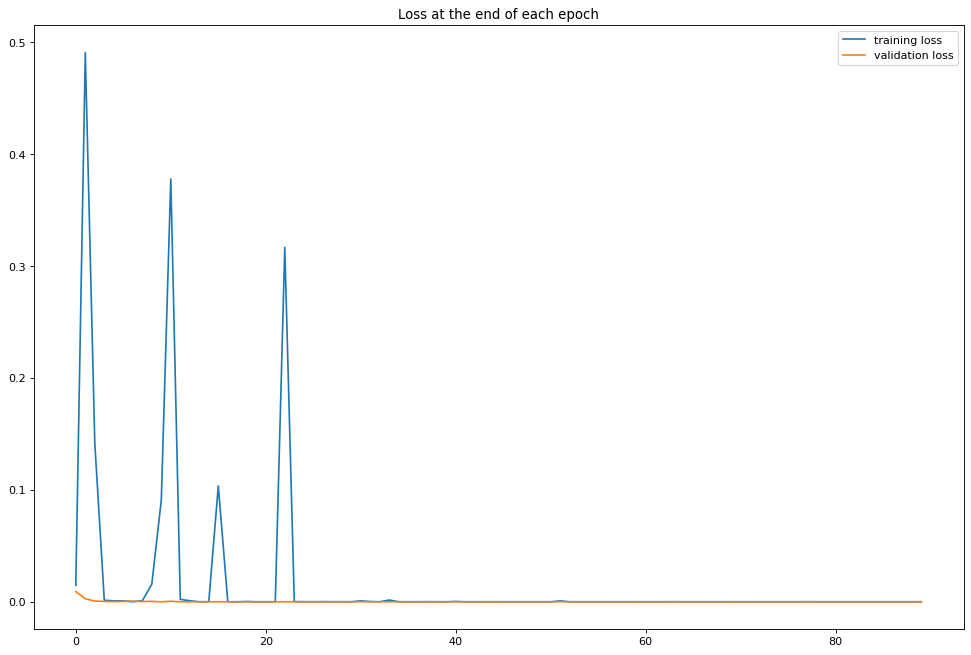

In [1656]:
## loss
trl = [loss.item() for loss in train_losses ]
tel = [loss.item() for loss in test_losses ]

figure(figsize=(15, 10), dpi=80)
plt.plot(trl, label='training loss')
plt.plot(tel, label='validation loss')
plt.title('Loss at the end of each epoch')
plt.legend();

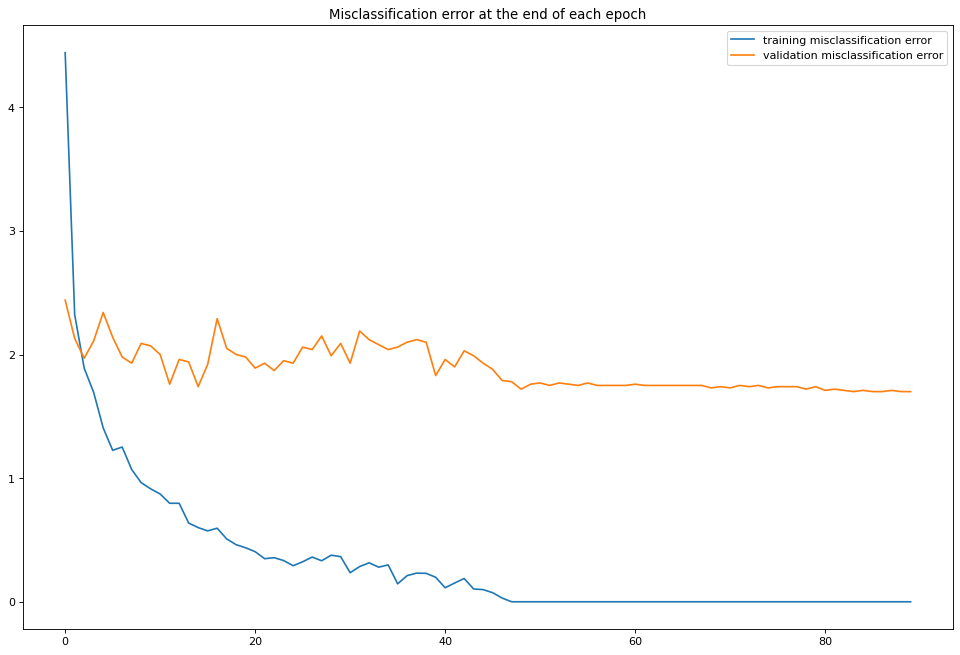

In [1657]:
## Misclassification
figure(figsize=(15, 10), dpi=80)
plt.plot([100-t/600 for t in train_correct], label='training misclassification error')
plt.plot([100-t/100 for t in test_correct], label='validation misclassification error')
plt.title('Misclassification error at the end of each epoch')
plt.legend();

In [1658]:
with torch.no_grad():
    correct = 0
    for X_test, y_test in test_load_all:
        y_val = cnn_model(X_test)  # we don't flatten the data this time
        predicted = torch.max(y_val,1)[1]
        correct += (predicted == y_test).sum()
print(f'Test accuracy: {correct.item()}/{len(test_data)} = {correct.item()*100/(len(test_data)):7.3f}%')

Test accuracy: 9830/10000 =  98.300%


In [1659]:
test_cc = [t/100 for t in test_correct]
max_index = test_cc.index(max(test_cc))
print(f'epoch with the best reslut: {max_index}')
print(f'best test accuracy is: {test_cc[max_index]}')

epoch with the best reslut: 83
best test accuracy is: 98.30000305175781


### momentum = 0.9

In [1660]:
torch.manual_seed(42)
cnn_model = ConvolutionalNetwork()
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(cnn_model.parameters(),lr=0.1,momentum=0.9)

In [1661]:
import time
start_time = time.time()

epochs = 90
train_losses = []
test_losses = []
train_correct = []
test_correct = []

for i in range(epochs):
    trn_corr = 0
    tst_corr = 0
    
    # Run the training batches
    for b, (X_train, y_train) in enumerate(train_loader):
        b+=1
        
        # Apply the model
        y_pred = cnn_model(X_train)  # we don't flatten X-train here
        loss = criterion(y_pred, y_train)
 
        # Tally the number of correct predictions
        predicted = torch.max(y_pred.data, 1)[1]
        batch_corr = (predicted == y_train).sum()
        trn_corr += batch_corr
        
        # Update parameters
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        # Print interim results
        if b%600 == 0 and i%30==0:
            print(f'epoch: {i:2}  batch: {b:4} [{10*b:6}/60000]  loss: {loss.item():10.8f}  \
accuracy: {trn_corr.item()*100/(10*b):7.3f}%')
        
    train_losses.append(loss)
    train_correct.append(trn_corr)
        
    # Run the testing batches
    with torch.no_grad():
        for b, (X_test, y_test) in enumerate(test_loader):

            # Apply the model
            y_val = cnn_model(X_test)

            # Tally the number of correct predictions
            predicted = torch.max(y_val.data, 1)[1] 
            tst_corr += (predicted == y_test).sum()
            
    loss = criterion(y_val, y_test)
    test_losses.append(loss)
    test_correct.append(tst_corr)
        
print(f'\nDuration: {time.time() - start_time:.0f} seconds') # print the time elapsed            

epoch:  0  batch:  600 [  6000/60000]  loss: 1.90247846  accuracy:  67.167%
epoch:  0  batch: 1200 [ 12000/60000]  loss: 0.92838877  accuracy:  71.808%
epoch:  0  batch: 1800 [ 18000/60000]  loss: 2.36757088  accuracy:  66.417%
epoch:  0  batch: 2400 [ 24000/60000]  loss: 2.21867037  accuracy:  52.371%
epoch:  0  batch: 3000 [ 30000/60000]  loss: 2.42204690  accuracy:  44.607%
epoch:  0  batch: 3600 [ 36000/60000]  loss: 2.29519200  accuracy:  38.914%
epoch:  0  batch: 4200 [ 42000/60000]  loss: 2.30479574  accuracy:  34.805%
epoch:  0  batch: 4800 [ 48000/60000]  loss: 2.29844713  accuracy:  31.644%
epoch:  0  batch: 5400 [ 54000/60000]  loss: 2.42215109  accuracy:  29.200%
epoch:  0  batch: 6000 [ 60000/60000]  loss: 2.37732625  accuracy:  27.283%
epoch: 30  batch:  600 [  6000/60000]  loss: 2.26486731  accuracy:  11.283%
epoch: 30  batch: 1200 [ 12000/60000]  loss: 2.44942808  accuracy:  11.050%
epoch: 30  batch: 1800 [ 18000/60000]  loss: 2.38380122  accuracy:  10.778%
epoch: 30  b

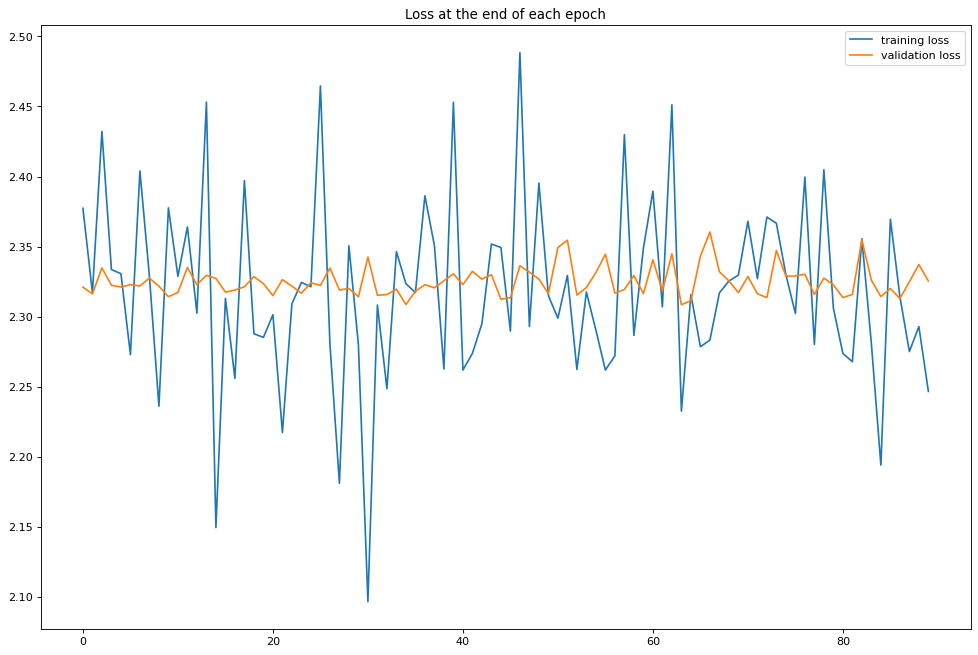

In [1662]:
## loss
trl = [loss.item() for loss in train_losses ]
tel = [loss.item() for loss in test_losses ]

figure(figsize=(15, 10), dpi=80)
plt.plot(trl, label='training loss')
plt.plot(tel, label='validation loss')
plt.title('Loss at the end of each epoch')
plt.legend();

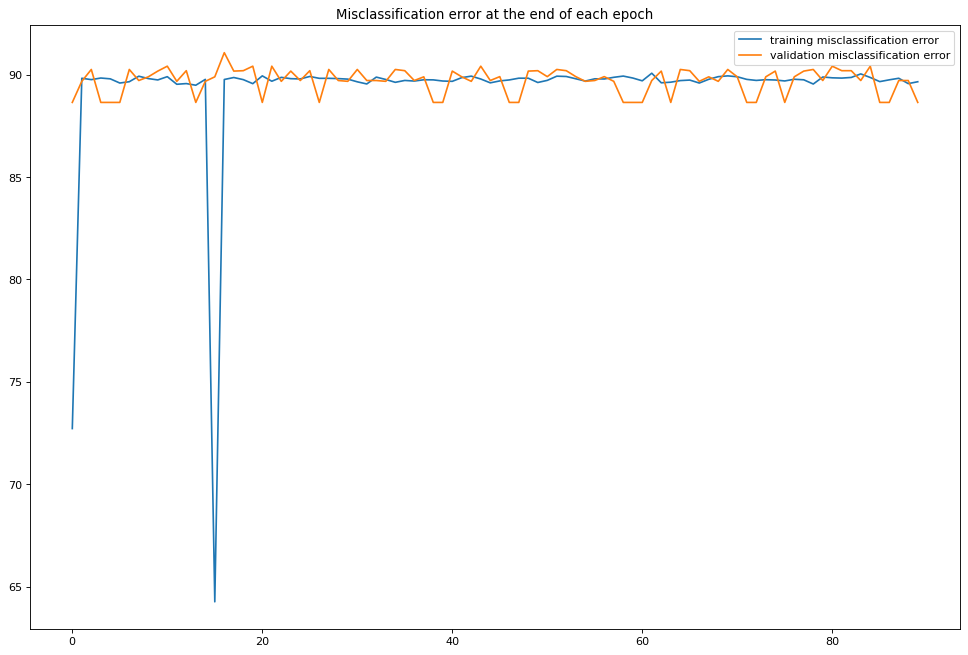

In [1663]:
## Misclassification
figure(figsize=(15, 10), dpi=80)
plt.plot([100-t/600 for t in train_correct], label='training misclassification error')
plt.plot([100-t/100 for t in test_correct], label='validation misclassification error')
plt.title('Misclassification error at the end of each epoch')
plt.legend();

In [1664]:
with torch.no_grad():
    correct = 0
    for X_test, y_test in test_load_all:
        y_val = cnn_model(X_test)  # we don't flatten the data this time
        predicted = torch.max(y_val,1)[1]
        correct += (predicted == y_test).sum()
print(f'Test accuracy: {correct.item()}/{len(test_data)} = {correct.item()*100/(len(test_data)):7.3f}%')

Test accuracy: 1135/10000 =  11.350%


In [1665]:
test_cc = [t/100 for t in test_correct]
max_index = test_cc.index(max(test_cc))
print(f'epoch with the best reslut: {max_index}')
print(f'best test accuracy is: {test_cc[max_index]}')

epoch with the best reslut: 0
best test accuracy is: 11.350000381469727


## 5. Beat the performance of SVM with Gaussian Kernel

As I'm using optim.Adam as my optimizer and therefore I will skip the test for momentums

In [47]:
train_loader = DataLoader(train_data, batch_size=20, shuffle=True)
test_loader = DataLoader(test_data, batch_size=20, shuffle=False)

In [48]:
## two 2-D convolutional layers,two fully connected hidden layers

class ConvolutionalNetwork(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(1, 16, 3, 1)
        self.conv2 = nn.Conv2d(16, 25, 3, 1)
        self.fc1 = nn.Linear(5*5*25, 200)
        self.fc2 = nn.Linear(200, 100)
        self.out = nn.Linear(100,10)

    def forward(self, X):
        X = F.relu(self.conv1(X))
        X = F.max_pool2d(X, 2, 2)
        X = F.relu(self.conv2(X))
        X = F.max_pool2d(X, 2, 2)
        X = X.view(-1, 5*5*25)
        X = F.relu(self.fc1(X))
        X = F.relu(self.fc2(X))
        X = self.out(X)
        return F.log_softmax(X, dim=1)

In [49]:
torch.manual_seed(42)
cnn_model = ConvolutionalNetwork()
cnn_model

ConvolutionalNetwork(
  (conv1): Conv2d(1, 16, kernel_size=(3, 3), stride=(1, 1))
  (conv2): Conv2d(16, 25, kernel_size=(3, 3), stride=(1, 1))
  (fc1): Linear(in_features=625, out_features=200, bias=True)
  (fc2): Linear(in_features=200, out_features=100, bias=True)
  (out): Linear(in_features=100, out_features=10, bias=True)
)

In [50]:
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(cnn_model.parameters(), lr=0.011)

In [51]:
import time
start_time = time.time()

epochs = 90
train_losses = []
test_losses = []
train_correct = []
test_correct = []

for i in range(epochs):
    trn_corr = 0
    tst_corr = 0
    
    # Run the training batches
    for b, (X_train, y_train) in enumerate(train_loader):
        b+=1
        
        # Apply the model
        y_pred = cnn_model(X_train)  # we don't flatten X-train here
        loss = criterion(y_pred, y_train)
 
        # Tally the number of correct predictions
        predicted = torch.max(y_pred.data, 1)[1]
        batch_corr = (predicted == y_train).sum()
        trn_corr += batch_corr
        
        # Update parameters
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        # Print interim results
        if b%6000 == 0 and i%30==0:
            print(f'epoch: {i:2}  batch: {b:4} [{10*b:6}/60000]  loss: {loss.item():10.8f}  \
accuracy: {trn_corr.item()*100/(10*b):7.3f}%')
        
    train_losses.append(loss)
    train_correct.append(trn_corr)
        
    # Run the testing batches
    with torch.no_grad():
        for b, (X_test, y_test) in enumerate(test_loader):

            # Apply the model
            y_val = cnn_model(X_test)

            # Tally the number of correct predictions
            predicted = torch.max(y_val.data, 1)[1] 
            tst_corr += (predicted == y_test).sum()
            
    loss = criterion(y_val, y_test)
    test_losses.append(loss)
    test_correct.append(tst_corr)
        
print(f'\nDuration: {time.time() - start_time:.0f} seconds') # print the time elapsed            


Duration: 2093 seconds


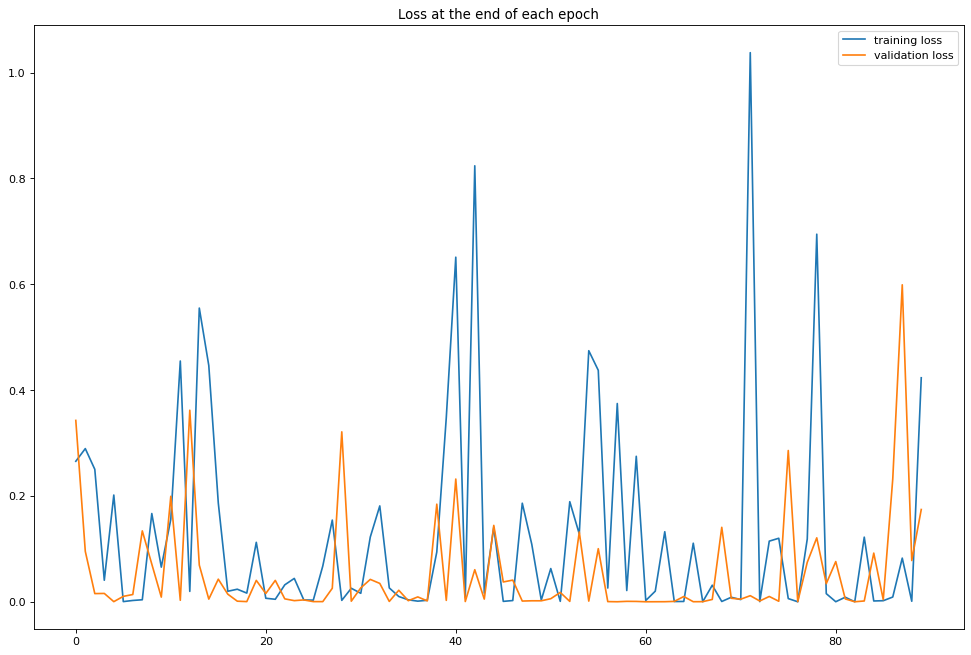

In [52]:
## loss
trl = [loss.item() for loss in train_losses ]
tel = [loss.item() for loss in test_losses ]

figure(figsize=(15, 10), dpi=80)
plt.plot(trl, label='training loss')
plt.plot(tel, label='validation loss')
plt.title('Loss at the end of each epoch')
plt.legend();

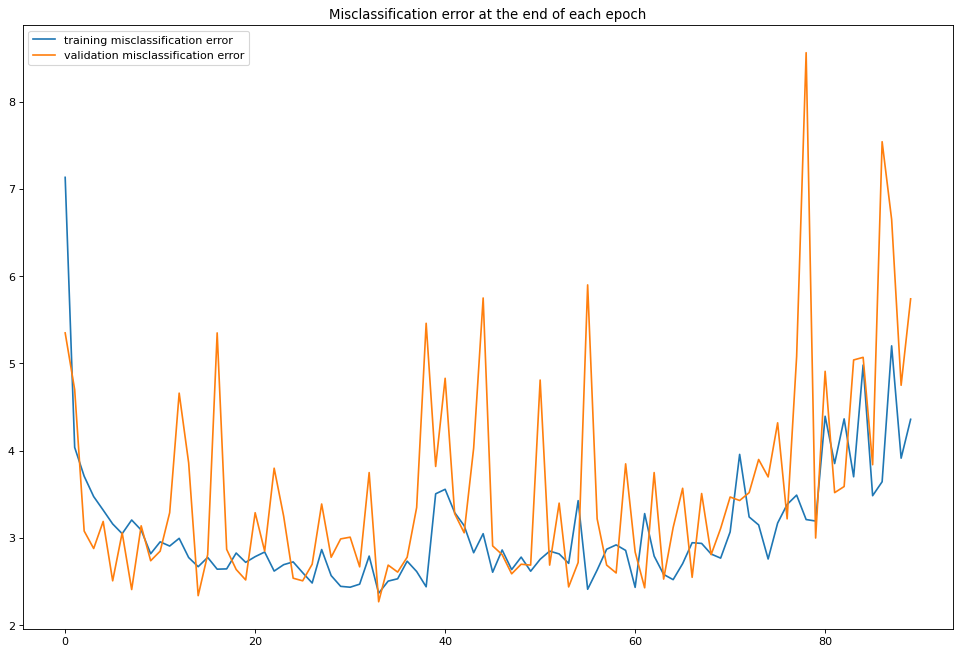

In [53]:
## misclassification
figure(figsize=(15, 10), dpi=80)
plt.plot([100-t/600 for t in train_correct], label='training misclassification error')
plt.plot([100-t/100 for t in test_correct], label='validation misclassification error')
plt.title('Misclassification error at the end of each epoch')
plt.legend();

In [54]:
# Extract the data all at once, not in batches
test_load_all = DataLoader(test_data, batch_size=10000, shuffle=False)

In [55]:
with torch.no_grad():
    correct = 0
    for X_test, y_test in test_load_all:
        y_val = cnn_model(X_test)  # we don't flatten the data this time
        predicted = torch.max(y_val,1)[1]
        correct += (predicted == y_test).sum()
print(f'Test accuracy: {correct.item()}/{len(test_data)} = {correct.item()*100/(len(test_data)):7.3f}%')

Test accuracy: 9426/10000 =  94.260%


## Different parameters 

In [2069]:
train_loader = DataLoader(train_data, batch_size=10, shuffle=True)
test_loader = DataLoader(test_data, batch_size=10, shuffle=False)

In [2070]:
for i, (X_train, y_train) in enumerate(train_data):
    break
X = X_train.view(1,1,28,28)
print(x.shape)

torch.Size([1, 1, 28, 28])


In [2071]:
conv1 = nn.Conv2d(1, 6, 3, 1)
conv2 = nn.Conv2d(6, 16, 3, 1)
fc1 = nn.Linear(5*5*16, 120)
fc2 = nn.Linear(120, 84)
fc3 = nn.Linear(84,10)

In [2072]:
X = F.relu(conv1(X))
print(X.shape)
X = F.max_pool2d(X, 2, 2)
print(X.shape)
X = F.relu(conv2(X))
print(X.shape)
X = F.max_pool2d(X, 2, 2)
print(X.shape)
X = X.view(-1, 5*5*16)
print(X.shape)
X = F.relu(fc1(X))
print(X.shape)
X = F.relu(fc2(X))
print(X.shape)
X = fc3(X)
print(X.shape)

torch.Size([1, 6, 26, 26])
torch.Size([1, 6, 13, 13])
torch.Size([1, 16, 11, 11])
torch.Size([1, 16, 5, 5])
torch.Size([1, 400])
torch.Size([1, 120])
torch.Size([1, 84])
torch.Size([1, 10])


In [2073]:
class ConvolutionalNetwork(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(1, 6, 3, 1)
        self.conv2 = nn.Conv2d(6, 16, 3, 1)
        self.fc1 = nn.Linear(5*5*16, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84,10)

    def forward(self, X):
        X = F.relu(self.conv1(X))
        X = F.max_pool2d(X, 2, 2)
        X = F.relu(self.conv2(X))
        X = F.max_pool2d(X, 2, 2)
        X = X.view(-1, 5*5*16)
        X = F.relu(self.fc1(X))
        X = F.relu(self.fc2(X))
        X = self.fc3(X)
        return F.log_softmax(X, dim=1)

In [2085]:
torch.manual_seed(42)
cnn_model = ConvolutionalNetwork()
cnn_model

ConvolutionalNetwork(
  (conv1): Conv2d(1, 6, kernel_size=(3, 3), stride=(1, 1))
  (conv2): Conv2d(6, 16, kernel_size=(3, 3), stride=(1, 1))
  (fc1): Linear(in_features=400, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=84, bias=True)
  (fc3): Linear(in_features=84, out_features=10, bias=True)
)

In [2086]:
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(cnn_model.parameters(), lr=0.001)

In [2087]:
import time
start_time = time.time()
torch.manual_seed(42)
epochs = 10
train_losses = []
test_losses = []
train_correct = []
test_correct = []

for i in range(epochs):
    trn_corr = 0
    tst_corr = 0
    
    # Run the training batches
    for b, (X_train, y_train) in enumerate(train_loader):
        b+=1
        
        # Apply the model
        y_pred = cnn_model(X_train)  # we don't flatten X-train here
        loss = criterion(y_pred, y_train)
 
        # Tally the number of correct predictions
        predicted = torch.max(y_pred.data, 1)[1]
        batch_corr = (predicted == y_train).sum()
        trn_corr += batch_corr
        
        # Update parameters
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        # Print interim results
        if b%600 == 0:
            print(f'epoch: {i:2}  batch: {b:4} [{10*b:6}/60000]  loss: {loss.item():10.8f}  \
accuracy: {trn_corr.item()*100/(10*b):7.3f}%')
        
    train_losses.append(loss)
    train_correct.append(trn_corr)
        
    # Run the testing batches
    with torch.no_grad():
        for b, (X_test, y_test) in enumerate(test_loader):

            # Apply the model
            y_val = cnn_model(X_test)

            # Tally the number of correct predictions
            predicted = torch.max(y_val.data, 1)[1] 
            tst_corr += (predicted == y_test).sum()
            
    loss = criterion(y_val, y_test)
    test_losses.append(loss)
    test_correct.append(tst_corr)
        
print(f'\nDuration: {time.time() - start_time:.0f} seconds') # print the time elapsed            

epoch:  0  batch:  600 [  6000/60000]  loss: 0.08654555  accuracy:  77.800%
epoch:  0  batch: 1200 [ 12000/60000]  loss: 0.57689154  accuracy:  85.225%
epoch:  0  batch: 1800 [ 18000/60000]  loss: 0.19149570  accuracy:  88.356%
epoch:  0  batch: 2400 [ 24000/60000]  loss: 0.12121473  accuracy:  90.121%
epoch:  0  batch: 3000 [ 30000/60000]  loss: 0.17241535  accuracy:  91.283%
epoch:  0  batch: 3600 [ 36000/60000]  loss: 0.12094252  accuracy:  92.153%
epoch:  0  batch: 4200 [ 42000/60000]  loss: 0.06916973  accuracy:  92.800%
epoch:  0  batch: 4800 [ 48000/60000]  loss: 0.02384527  accuracy:  93.348%
epoch:  0  batch: 5400 [ 54000/60000]  loss: 0.26314718  accuracy:  93.781%
epoch:  0  batch: 6000 [ 60000/60000]  loss: 0.08190775  accuracy:  94.137%
epoch:  1  batch:  600 [  6000/60000]  loss: 0.02405228  accuracy:  97.733%
epoch:  1  batch: 1200 [ 12000/60000]  loss: 0.21290512  accuracy:  97.775%
epoch:  1  batch: 1800 [ 18000/60000]  loss: 0.00250192  accuracy:  97.806%
epoch:  1  b

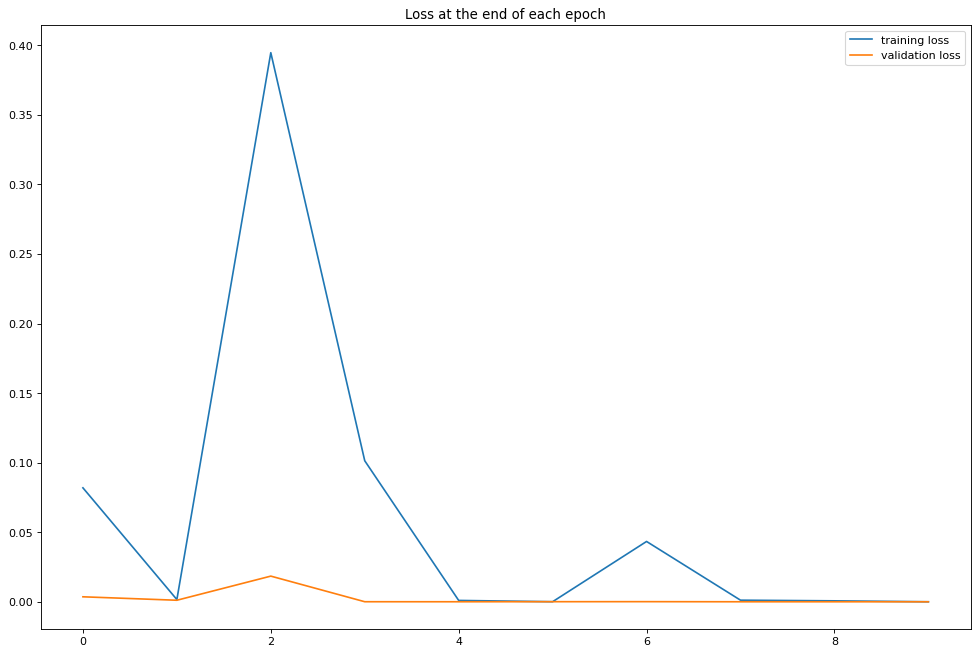

In [2088]:
## loss
trl = [loss.item() for loss in train_losses ]
tel = [loss.item() for loss in test_losses ]

figure(figsize=(15, 10), dpi=80)
plt.plot(trl, label='training loss')
plt.plot(tel, label='validation loss')
plt.title('Loss at the end of each epoch')
plt.legend();

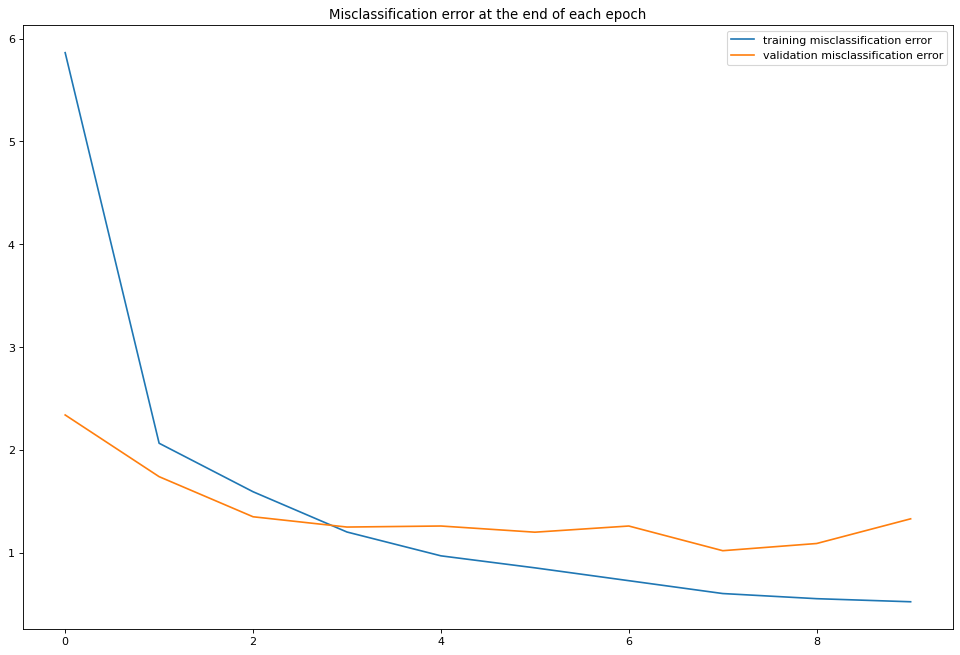

In [2089]:
## misclassification
figure(figsize=(15, 10), dpi=80)
plt.plot([100-t/600 for t in train_correct], label='training misclassification error')
plt.plot([100-t/100 for t in test_correct], label='validation misclassification error')
plt.title('Misclassification error at the end of each epoch')
plt.legend();

In [2090]:
test_load_all = DataLoader(test_data, batch_size=10000, shuffle=False)
with torch.no_grad():
    correct = 0
    for X_test, y_test in test_load_all:
        y_val = cnn_model(X_test)  
        predicted = torch.max(y_val,1)[1]
        correct += (predicted == y_test).sum()
print(f'Test accuracy: {correct.item()}/{len(test_data)} = {correct.item()*100/(len(test_data)):7.3f}%')

Test accuracy: 9867/10000 =  98.670%


In [2092]:
print(f'Test error: {round(100-98.67,3)}%, which is less than 1.4% we obtained from SVM with Gaussian Kernel' )

Test error: 1.33%, which is less than 1.4% we obtained from SVM with Gaussian Kernel


### c

In [2093]:
weights = []
for wei in cnn_model.parameters():
    weights.append(wei.detach().cpu().numpy())

In [2094]:
for wei in weights:
    print(wei.shape)

(6, 1, 3, 3)
(6,)
(16, 6, 3, 3)
(16,)
(120, 400)
(120,)
(84, 120)
(84,)
(10, 84)
(10,)


<Figure size 1200x1600 with 0 Axes>

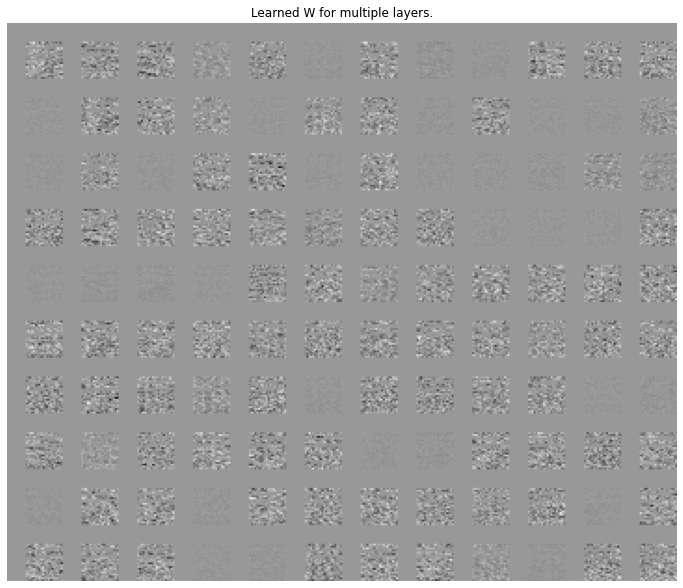

In [2095]:

# Assemble to images.
fc_images = weights[4].reshape(10, 12, 20, 20)
pad_images = np.zeros((10, 12, 30, 30))
pad_images[:, :, 10:30, 10:30] = fc_images
fc_vis = np.transpose(pad_images, (0, 2, 1, 3)).reshape(300, 360)

# Show weights.
figure(figsize=(15, 20), dpi=80)
plt.figure(figsize=(12, 12))
plt.imshow(fc_vis, cmap='gray')
plt.title("Learned W for multiple layers.")
plt.axis("off")
plt.show()

# Visualize conv filter

In [2100]:
cnn_model.parameters()

<generator object Module.parameters at 0x7fcd7ebfecf0>

In [2036]:
kernels = cnn_model.conv2.weight.detach()
cnn_model

ConvolutionalNetwork(
  (conv1): Conv2d(1, 6, kernel_size=(3, 3), stride=(1, 1))
  (conv2): Conv2d(6, 16, kernel_size=(3, 3), stride=(1, 1))
  (fc1): Linear(in_features=400, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=84, bias=True)
  (fc3): Linear(in_features=84, out_features=10, bias=True)
)

##  first filter

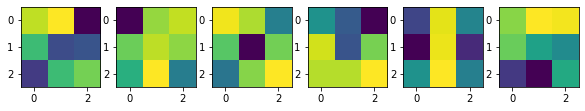

In [2037]:
kernels = cnn_model.conv1.weight.detach()

fig, axarr = plt.subplots(1,kernels.size(0))
fig.set_size_inches(10,10)
for idx in range(kernels.size(0)):
    axarr[idx].imshow(kernels[idx].squeeze())

torch.Size([3, 7, 32])

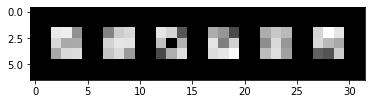

In [2128]:
from torchvision.utils import make_grid

kernels = cnn_model.conv1.weight.detach().clone()
kernels = kernels - kernels.min()
kernels = kernels / kernels.max()
img = make_grid(kernels)
plt.imshow(img.permute(1, 2, 0))
img.shape

## second filter 

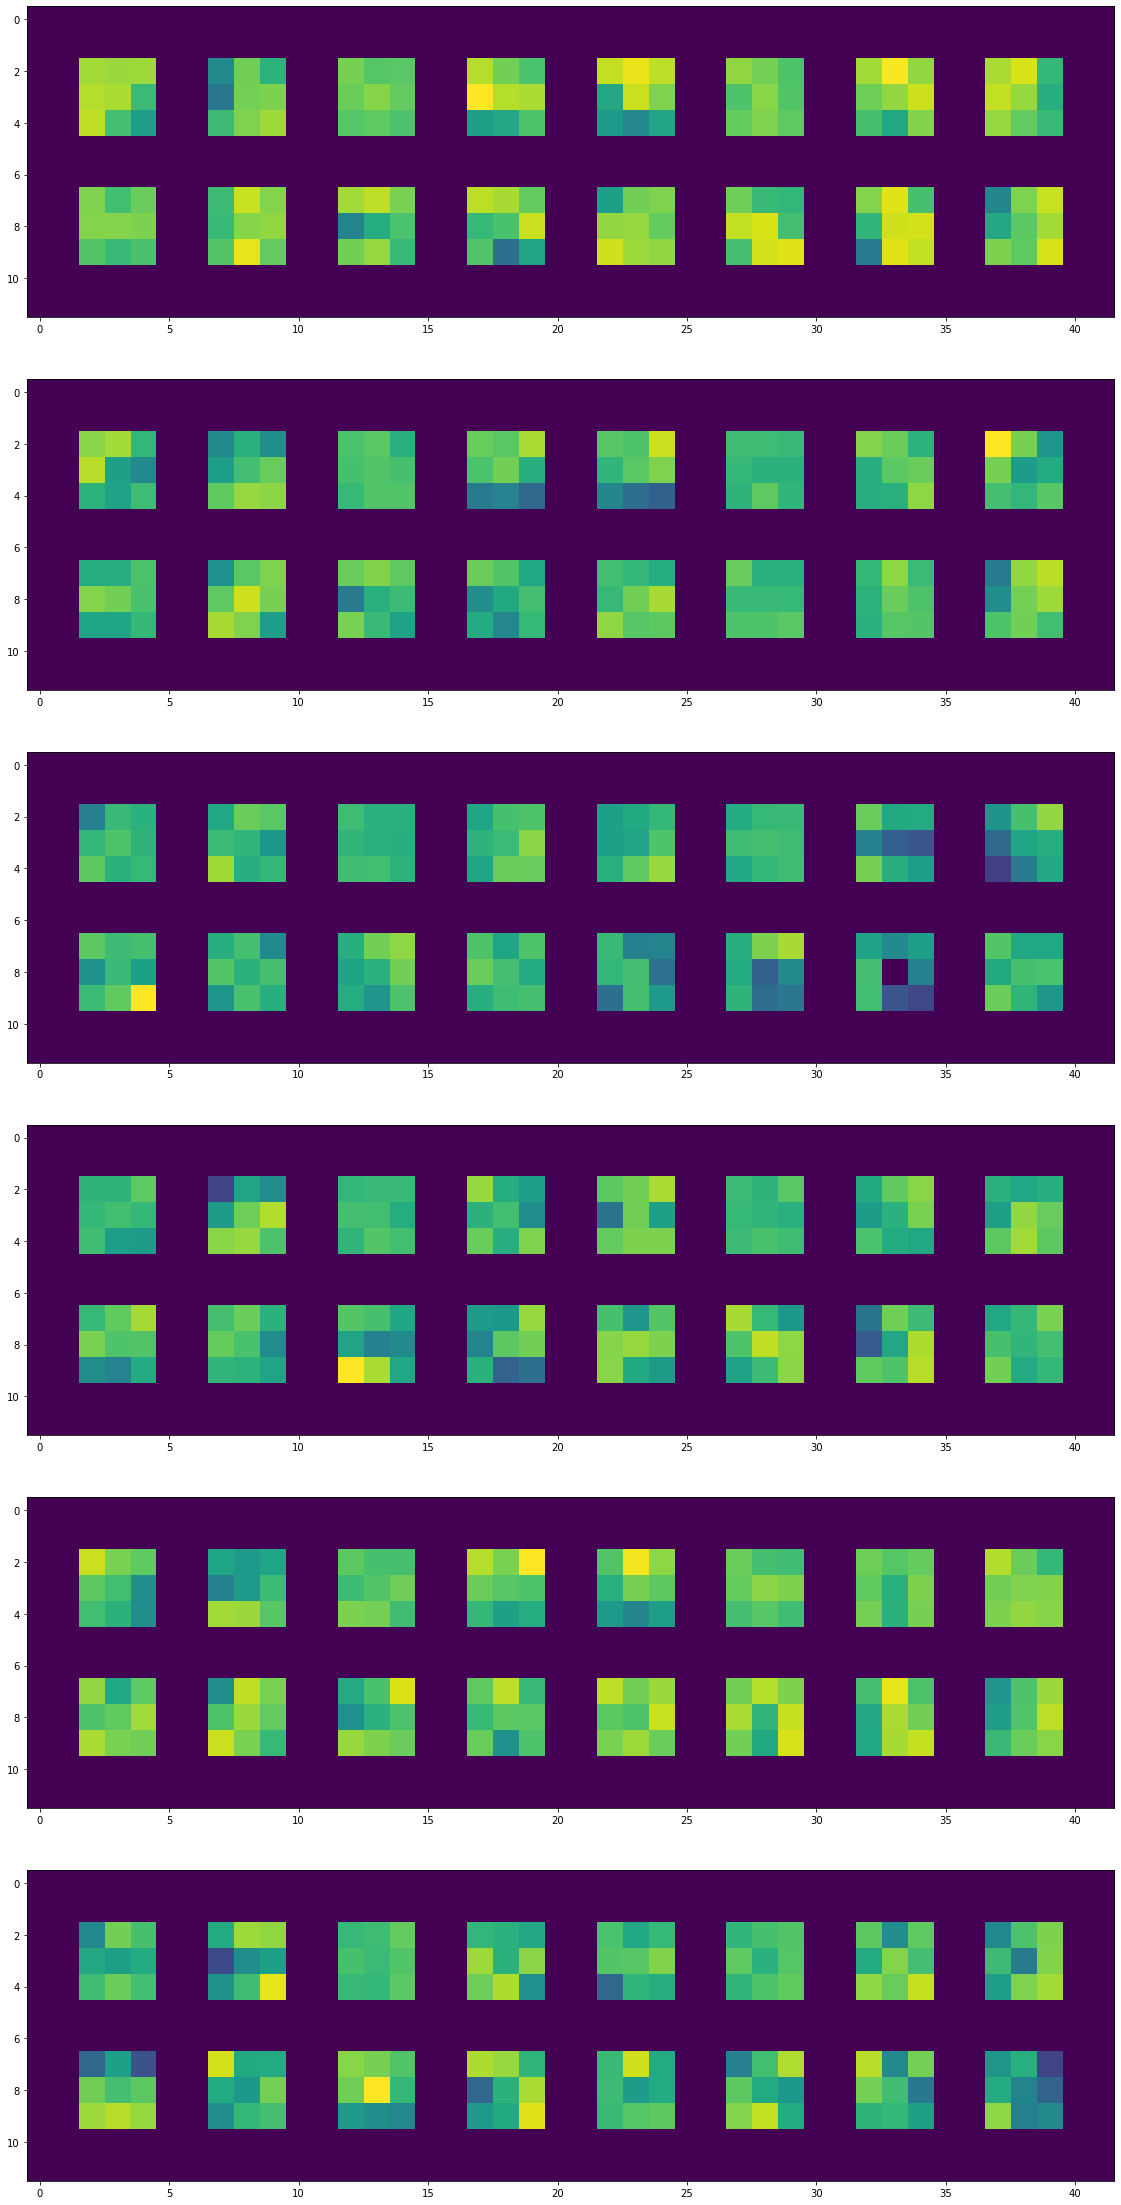

In [2153]:
from torchvision.utils import make_grid

kernels = cnn_model.conv2.weight.detach().clone()
kernels = kernels - kernels.min()
kernels = kernels / kernels.max()
img = make_grid(kernels)
# plt.imshow(img.permute(1,2,0))
fig, axarr = plt.subplots(img.shape[0])
fig.set_size_inches(30, 40)
img.shape
axarr[0].imshow(img[0,:])
axarr[1].imshow(img[1,:])
axarr[2].imshow(img[2,:])
axarr[3].imshow(img[3,:])
axarr[4].imshow(img[4,:])
axarr[5].imshow(img[5,:])

# Q5.

As I'm using optim.Adam as my optimizer and therefore I will skip the test for momentums,and also I'm using the accuracy plot instead of using the misclassification plot

In [1666]:
from sklearn.preprocessing import StandardScaler

### (a)

In [1667]:
train_q5 = pd.read_table('/Users/fuwang/Documents/Columbia University/Spring 2022/STAT 5241/Project/Final Project/train.txt',
                        sep=',',names=range(1569))
train_path = '/Users/fuwang/Documents/Columbia University/Spring 2022/STAT 5241/Project/Final Project/train.txt'

In [1668]:
train_q5.shape

(20000, 1569)

In [1669]:
np.unique(train_q5.iloc[:,1568].values)

array([   0,    1,    2,    3,    4,    5,    6,    7,    8,    9,   10,
         11,   12,   13,   14,   15,   16,   17,   18])

In [1670]:

val_q5 = pd.read_table('/Users/fuwang/Documents/Columbia University/Spring 2022/STAT 5241/Project/Final Project/val.txt',
                        sep=',',names=range(1569))
val_path = '/Users/fuwang/Documents/Columbia University/Spring 2022/STAT 5241/Project/Final Project/val.txt'

In [1671]:
val_q5.shape

(5000, 1569)

In [1672]:
np.unique(val_q5.iloc[:,1568].values)

array([   0,    1,    2,    3,    4,    5,    6,    7,    8,    9,   10,
         11,   12,   13,   14,   15,   16,   17,   18])

In [1673]:

test_q5 = pd.read_table('/Users/fuwang/Documents/Columbia University/Spring 2022/STAT 5241/Project/Final Project/test.txt',
                        sep=',',names=range(1569))
test_path = '/Users/fuwang/Documents/Columbia University/Spring 2022/STAT 5241/Project/Final Project/test.txt'

In [1674]:
test_q5.shape

(5000, 1569)

In [1675]:
np.unique(train_q5.iloc[:,1568:1569].values)

array([   0,    1,    2,    3,    4,    5,    6,    7,    8,    9,   10,
         11,   12,   13,   14,   15,   16,   17,   18])

The last coordinate is the label

###  Data Prepare

In [1940]:
class CustomerDataset(Dataset):
    def __init__(self, file_path):
        file_out = pd.read_table(file_path,sep=',',names=range(1569))
        X = file_out.iloc[:,:1568].values
        y = file_out.iloc[:,1568].values
        # Standardlize y
        sc = StandardScaler()
        X = sc.fit_transform(X)
        # convert to tensor
        self.X = torch.tensor(X,dtype=torch.float32)
        self.y = torch.tensor(y)
        
    def __len__(self):
        return len(self.y) 
    
    def __getitem__(self,idx):
        return self.X[idx],self.y[idx]
        
        

In [1941]:
train_q5 = CustomerDataset(train_path)
val_q5 = CustomerDataset(val_path)
test_q5 = CustomerDataset(test_path)

### (b)

### ANN

In [1942]:
train_loader = DataLoader(train_q5, batch_size=100, shuffle=True)
val_loader = DataLoader(val_q5,batch_size=100, shuffle=True)
test_loader = DataLoader(test_q5, batch_size=500, shuffle=False)

In [1943]:
for b, (X_train, y_train) in enumerate(train_loader):
    break
y_train

tensor([ 6,  7,  6, 15,  2, 10,  9,  9, 16, 13,  9,  9,  7, 11,  4, 13,  7, 13,
         3, 17,  9,  8, 12,  2,  7, 13, 17, 13,  9, 12, 10, 17, 13, 12, 10,  6,
        12,  6,  5,  9, 10,  7,  5,  8, 10,  4, 11, 11,  8, 11,  1,  5,  8,  9,
        12,  2,  8,  9, 12,  4, 11, 11, 12,  8, 15,  7,  1, 16,  6,  7,  6, 16,
        10, 12,  7, 12, 13,  8, 17,  4,  5,  4,  2, 11, 13,  8,  5, 18, 11,  5,
        10,  8, 16, 12,  9,  7,  8, 10,  8, 13])

In [1944]:
class MultilayerPerceptron(nn.Module):
    def __init__(self, in_sz=1568, out_sz=19, layers=[784,120,84]):
        super().__init__()
        self.fc1 = nn.Linear(in_sz,layers[0])
        self.fc2 = nn.Linear(layers[0],layers[1])
        self.fc3 = nn.Linear(layers[1],layers[2])
        self.fc4 = nn.Linear(layers[2],out_sz)
    
    def forward(self,X):
        X = F.relu(self.fc1(X))
        X = F.relu(self.fc2(X))
        X = F.relu(self.fc3(X))
        X = self.fc4(X)
        return F.log_softmax(X, dim=1)

In [1945]:
torch.manual_seed(42)
model = MultilayerPerceptron()
model

MultilayerPerceptron(
  (fc1): Linear(in_features=1568, out_features=784, bias=True)
  (fc2): Linear(in_features=784, out_features=120, bias=True)
  (fc3): Linear(in_features=120, out_features=84, bias=True)
  (fc4): Linear(in_features=84, out_features=19, bias=True)
)

In [1946]:
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

In [1947]:

# 1st training
import time
start_time = time.time()
torch.manual_seed(42)
epochs = 150
train_losses = []
test_losses = []
train_correct = []
test_correct = []

for i in range(epochs):
    trn_corr = 0
    tst_corr = 0
    
    # Run the training batches
    for b, (X_train, y_train) in enumerate(train_loader):
        b+=1
        
        # Apply the model
        y_pred = model(X_train)  
        loss = criterion(y_pred, y_train)
 
        # Tally the number of correct predictions
        predicted = torch.max(y_pred.data, 1)[1]
        batch_corr = (predicted == y_train).sum()
        trn_corr += batch_corr
        
        # Update parameters
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        # Print interim results
        if b%200 == 0:
            print(f'epoch: {i:2}  batch: {b:4} [{100*b:6}/60000]  loss: {loss.item():10.8f}  \
accuracy: {trn_corr.item()*100/(100*b):7.3f}%')
    
    # Update train loss & accuracy for the epoch
    train_losses.append(loss)
    train_correct.append(trn_corr)
        
    # Run the testing batches
    with torch.no_grad():
        for b, (X_vali, y_vali) in enumerate(test_loader):

            # Apply the model
            y_val = model(X_vali)  # Here we flatten X_test

            # Tally the number of correct predictions
            predicted = torch.max(y_val.data, 1)[1] 
            tst_corr += (predicted == y_vali).sum()
    
    # Update test loss & accuracy for the epoch
    loss = criterion(y_val, y_vali)
    test_losses.append(loss)
    test_correct.append(tst_corr)
        
print(f'\nDuration: {time.time() - start_time:.0f} seconds') # print the time elapsed            

epoch:  0  batch:  200 [ 20000/60000]  loss: 1.25705862  accuracy:  38.160%
epoch:  1  batch:  200 [ 20000/60000]  loss: 0.62453997  accuracy:  71.855%
epoch:  2  batch:  200 [ 20000/60000]  loss: 0.74645686  accuracy:  82.770%
epoch:  3  batch:  200 [ 20000/60000]  loss: 0.41702273  accuracy:  88.175%
epoch:  4  batch:  200 [ 20000/60000]  loss: 0.33985245  accuracy:  92.365%
epoch:  5  batch:  200 [ 20000/60000]  loss: 0.19088845  accuracy:  94.565%
epoch:  6  batch:  200 [ 20000/60000]  loss: 0.18829584  accuracy:  96.140%
epoch:  7  batch:  200 [ 20000/60000]  loss: 0.08044560  accuracy:  97.745%
epoch:  8  batch:  200 [ 20000/60000]  loss: 0.07231690  accuracy:  97.510%
epoch:  9  batch:  200 [ 20000/60000]  loss: 0.27361739  accuracy:  95.670%
epoch: 10  batch:  200 [ 20000/60000]  loss: 0.12407091  accuracy:  96.360%
epoch: 11  batch:  200 [ 20000/60000]  loss: 0.08757715  accuracy:  97.060%
epoch: 12  batch:  200 [ 20000/60000]  loss: 0.07580175  accuracy:  97.715%
epoch: 13  b

epoch: 108  batch:  200 [ 20000/60000]  loss: 0.00311539  accuracy:  99.720%
epoch: 109  batch:  200 [ 20000/60000]  loss: 0.00170598  accuracy:  99.800%
epoch: 110  batch:  200 [ 20000/60000]  loss: 0.01181535  accuracy:  99.720%
epoch: 111  batch:  200 [ 20000/60000]  loss: 0.08539143  accuracy:  99.555%
epoch: 112  batch:  200 [ 20000/60000]  loss: 0.00051447  accuracy:  98.840%
epoch: 113  batch:  200 [ 20000/60000]  loss: 0.05915627  accuracy:  99.150%
epoch: 114  batch:  200 [ 20000/60000]  loss: 0.00985572  accuracy:  99.050%
epoch: 115  batch:  200 [ 20000/60000]  loss: 0.00020214  accuracy:  99.355%
epoch: 116  batch:  200 [ 20000/60000]  loss: 0.02084630  accuracy:  99.545%
epoch: 117  batch:  200 [ 20000/60000]  loss: 0.00068072  accuracy:  99.450%
epoch: 118  batch:  200 [ 20000/60000]  loss: 0.01468053  accuracy:  99.290%
epoch: 119  batch:  200 [ 20000/60000]  loss: 0.00989334  accuracy:  99.540%
epoch: 120  batch:  200 [ 20000/60000]  loss: 0.01289255  accuracy:  99.545%

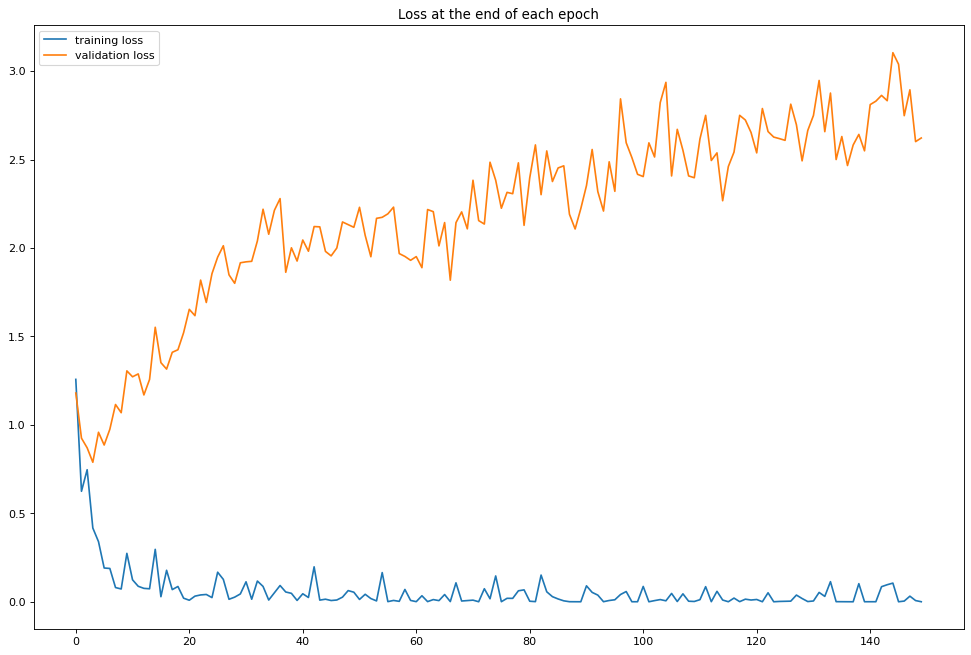

In [1948]:
## loss
trl = [loss.item() for loss in train_losses ]
tel = [loss.item() for loss in test_losses ]

figure(figsize=(15, 10), dpi=80)
plt.plot(trl, label='training loss')
plt.plot(tel, label='validation loss')
plt.title('Loss at the end of each epoch')
plt.legend();

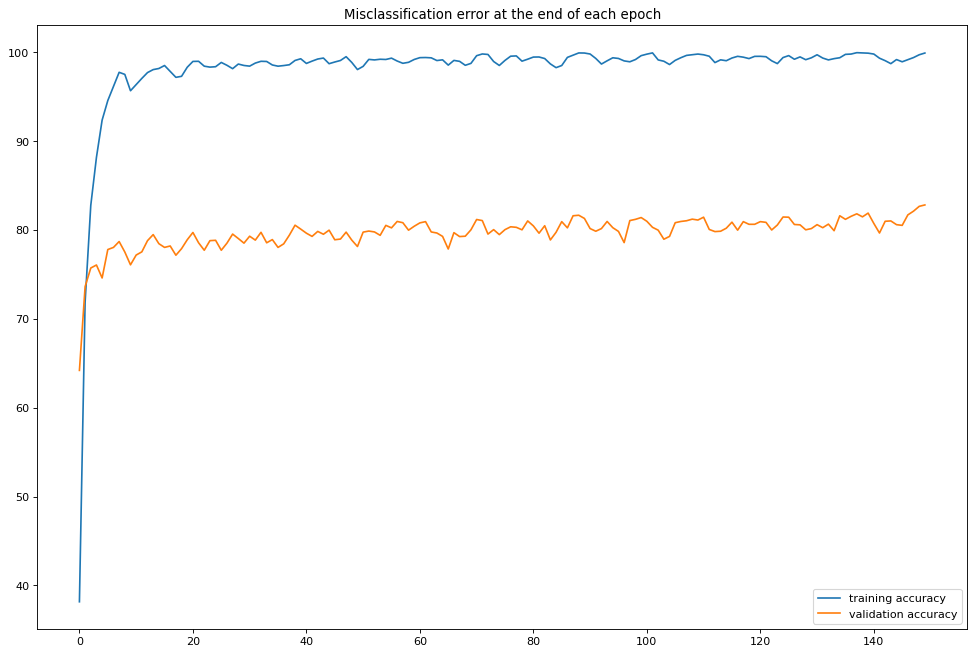

In [1949]:
## misclassification
figure(figsize=(15, 10), dpi=80)
plt.plot([t/200 for t in train_correct], label='training accuracy')
plt.plot([t/50 for t in test_correct], label='validation accuracy')
plt.title('Misclassification error at the end of each epoch')
plt.legend();

In [1950]:
train_cc = [t/200 for t in train_correct]
test_cc = [t/50 for t in test_correct]

In [1951]:
# Extract the data all at once, not in batches
test_load_all = DataLoader(test_q5, batch_size=5000, shuffle=False)

In [1952]:
with torch.no_grad():
    correct = 0
    for X_test, y_test in test_load_all:
        y_val = model(X_test)  # we don't flatten the data this time
        predicted = torch.max(y_val,1)[1]
        correct += (predicted == y_test).sum()
print(f'Test accuracy: {correct.item()}/{len(X_test)} = {correct.item()*100/(len(X_test)):7.3f}%')

Test accuracy: 4141/5000 =  82.820%


In [1953]:
max_index = test_cc.index(max(test_cc))
max_index

149

In [1954]:
# 2nd training
import time
start_time = time.time()
torch.manual_seed(77)
epochs = 150
train_losses = []
test_losses = []
train_correct = []
test_correct = []

for i in range(epochs):
    trn_corr = 0
    tst_corr = 0
    
    # Run the training batches
    for b, (X_train, y_train) in enumerate(train_loader):
        b+=1
        
        # Apply the model
        y_pred = model(X_train)  
        loss = criterion(y_pred, y_train)
 
        # Tally the number of correct predictions
        predicted = torch.max(y_pred.data, 1)[1]
        batch_corr = (predicted == y_train).sum()
        trn_corr += batch_corr
        
        # Update parameters
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        # Print interim results
        if b%200 == 0:
            print(f'epoch: {i:2}  batch: {b:4} [{100*b:6}/60000]  loss: {loss.item():10.8f}  \
accuracy: {trn_corr.item()*100/(100*b):7.3f}%')
    
    # Update train loss & accuracy for the epoch
    train_losses.append(loss)
    train_correct.append(trn_corr)
        
    # Run the testing batches
    with torch.no_grad():
        for b, (X_vali, y_vali) in enumerate(test_loader):

            # Apply the model
            y_val = model(X_vali)  # Here we flatten X_test

            # Tally the number of correct predictions
            predicted = torch.max(y_val.data, 1)[1] 
            tst_corr += (predicted == y_vali).sum()
    
    # Update test loss & accuracy for the epoch
    loss = criterion(y_val, y_vali)
    test_losses.append(loss)
    test_correct.append(tst_corr)
        
print(f'\nDuration: {time.time() - start_time:.0f} seconds') # print the time elapsed            

epoch:  0  batch:  200 [ 20000/60000]  loss: 0.00005587  accuracy:  99.855%
epoch:  1  batch:  200 [ 20000/60000]  loss: 0.00055168  accuracy:  99.890%
epoch:  2  batch:  200 [ 20000/60000]  loss: 0.00076735  accuracy:  99.860%
epoch:  3  batch:  200 [ 20000/60000]  loss: 0.01120381  accuracy:  99.785%
epoch:  4  batch:  200 [ 20000/60000]  loss: 0.04392472  accuracy:  99.565%
epoch:  5  batch:  200 [ 20000/60000]  loss: 0.00131232  accuracy:  99.455%
epoch:  6  batch:  200 [ 20000/60000]  loss: 0.00132495  accuracy:  99.480%
epoch:  7  batch:  200 [ 20000/60000]  loss: 0.15526809  accuracy:  98.770%
epoch:  8  batch:  200 [ 20000/60000]  loss: 0.06294633  accuracy:  98.935%
epoch:  9  batch:  200 [ 20000/60000]  loss: 0.00026358  accuracy:  99.205%
epoch: 10  batch:  200 [ 20000/60000]  loss: 0.11290230  accuracy:  99.710%
epoch: 11  batch:  200 [ 20000/60000]  loss: 0.00000364  accuracy:  99.830%
epoch: 12  batch:  200 [ 20000/60000]  loss: 0.00020970  accuracy:  99.810%
epoch: 13  b

epoch: 108  batch:  200 [ 20000/60000]  loss: 0.00000361  accuracy: 100.000%
epoch: 109  batch:  200 [ 20000/60000]  loss: 0.00001135  accuracy: 100.000%
epoch: 110  batch:  200 [ 20000/60000]  loss: 0.00000210  accuracy: 100.000%
epoch: 111  batch:  200 [ 20000/60000]  loss: 0.00000018  accuracy: 100.000%
epoch: 112  batch:  200 [ 20000/60000]  loss: 0.00000014  accuracy: 100.000%
epoch: 113  batch:  200 [ 20000/60000]  loss: 0.00000033  accuracy: 100.000%
epoch: 114  batch:  200 [ 20000/60000]  loss: 0.00000000  accuracy: 100.000%
epoch: 115  batch:  200 [ 20000/60000]  loss: 0.00000019  accuracy: 100.000%
epoch: 116  batch:  200 [ 20000/60000]  loss: 0.00000113  accuracy: 100.000%
epoch: 117  batch:  200 [ 20000/60000]  loss: 0.00000000  accuracy: 100.000%
epoch: 118  batch:  200 [ 20000/60000]  loss: 0.00000008  accuracy: 100.000%
epoch: 119  batch:  200 [ 20000/60000]  loss: 0.00000032  accuracy: 100.000%
epoch: 120  batch:  200 [ 20000/60000]  loss: 0.00000000  accuracy: 100.000%

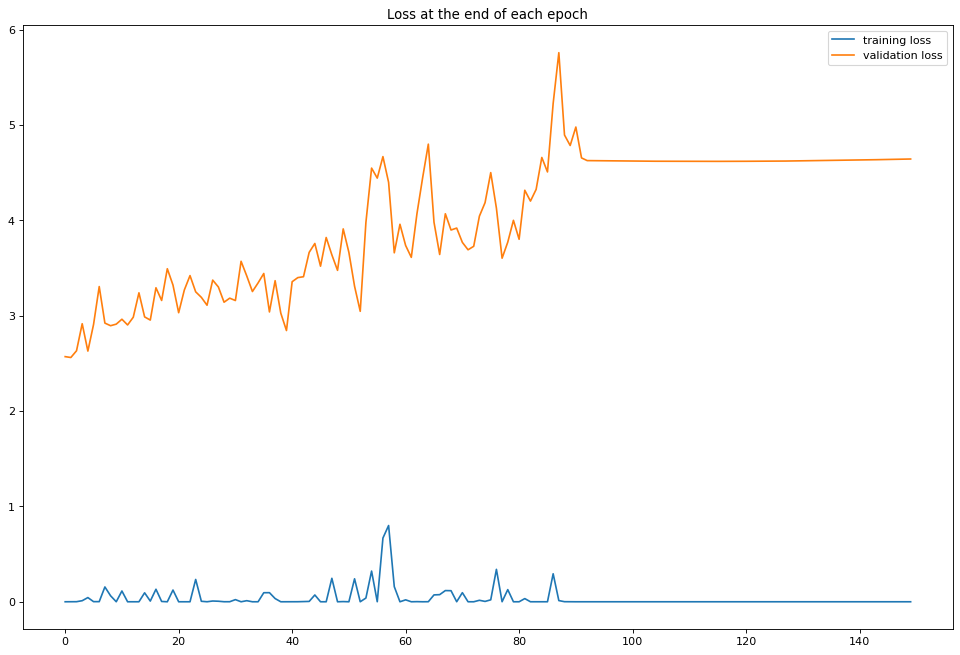

In [1955]:
## loss
trl = [loss.item() for loss in train_losses ]
tel = [loss.item() for loss in test_losses ]

figure(figsize=(15, 10), dpi=80)
plt.plot(trl, label='training loss')
plt.plot(tel, label='validation loss')
plt.title('Loss at the end of each epoch')
plt.legend();

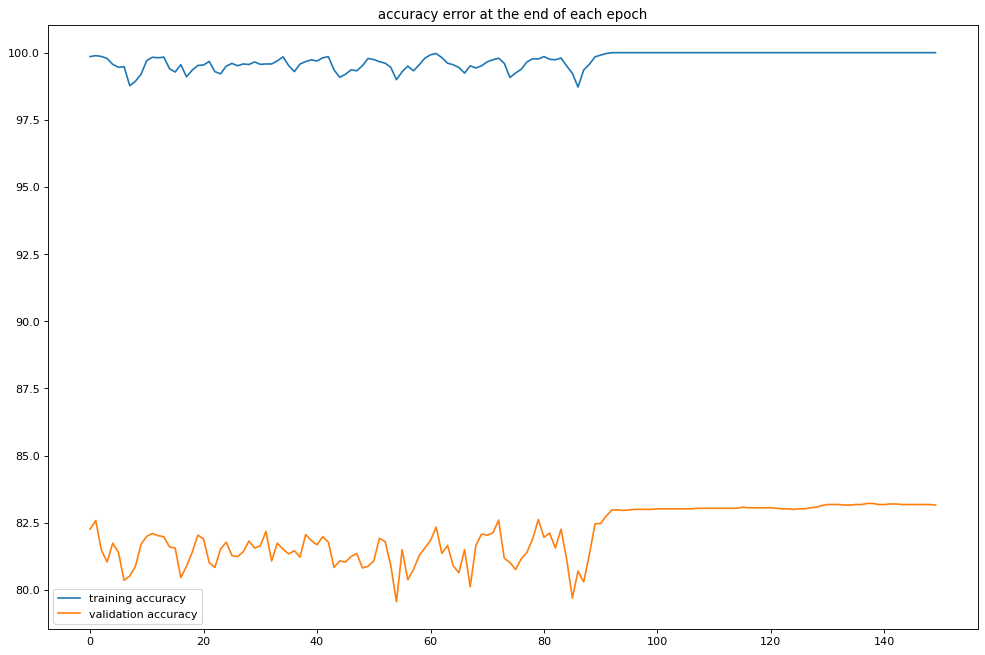

In [1956]:
## accuracy
figure(figsize=(15, 10), dpi=80)
plt.plot([t/200 for t in train_correct], label='training accuracy')
plt.plot([t/50 for t in test_correct], label='validation accuracy')
plt.title('accuracy error at the end of each epoch')
plt.legend();

In [1973]:
with torch.no_grad():
    correct = 0
    for X_test, y_test in test_load_all:
        y_val = model(X_test)  # we don't flatten the data this time
        predicted = torch.max(y_val,1)[1]
        correct += (predicted == y_test).sum()
print(f'Test accuracy: {correct.item()}/{len(X_test)} = {correct.item()*100/(len(X_test)):7.3f}%')

Test accuracy: 4158/5000 =  83.160%


In [1974]:
max_index = test_cc.index(max(test_cc))
max_index

149

## c

In [1975]:
weights = []
for wei in model.parameters():
    weights.append(wei.detach().cpu().numpy())
    

In [1976]:
for wei in weights:
    print(wei.shape)

(784, 1568)
(784,)
(120, 784)
(120,)
(84, 120)
(84,)
(19, 84)
(19,)


<Figure size 1200x1600 with 0 Axes>

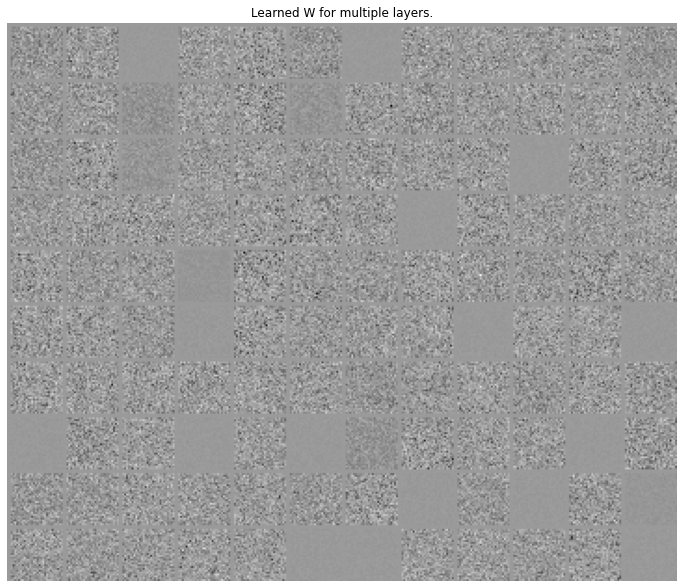

In [1977]:

# Assemble to images.
fc_images = weights[2].reshape(10, 12, 28, 28)
pad_images = np.zeros((10, 12, 30, 30))
pad_images[:, :, 2:30, 2:30] = fc_images
fc_vis = np.transpose(pad_images, (0, 2, 1, 3)).reshape(300, 360)

# Show weights.
figure(figsize=(15, 20), dpi=80)
plt.figure(figsize=(12, 12))
plt.imshow(fc_vis, cmap='gray')
plt.title("Learned W for multiple layers.")
plt.axis("off")
plt.show()

### lr = 0.2

In [1759]:
train_loader = DataLoader(train_q5, batch_size=100, shuffle=True)
val_loader = DataLoader(val_q5,batch_size=100, shuffle=True)
test_loader = DataLoader(test_q5, batch_size=500, shuffle=False)

In [1760]:
torch.manual_seed(42)
model = MultilayerPerceptron()
model
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

In [1761]:
# 1st training
import time
start_time = time.time()
torch.manual_seed(77)
epochs = 150
train_losses = []
test_losses = []
train_correct = []
test_correct = []

for i in range(epochs):
    trn_corr = 0
    tst_corr = 0
    
    # Run the training batches
    for b, (X_train, y_train) in enumerate(train_loader):
        b+=1
        
        # Apply the model
        y_pred = model(X_train)  
        loss = criterion(y_pred, y_train)
 
        # Tally the number of correct predictions
        predicted = torch.max(y_pred.data, 1)[1]
        batch_corr = (predicted == y_train).sum()
        trn_corr += batch_corr
        
        # Update parameters
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        # Print interim results
        if b%200 == 0:
            print(f'epoch: {i:2}  batch: {b:4} [{100*b:6}/60000]  loss: {loss.item():10.8f}  \
accuracy: {trn_corr.item()*100/(100*b):7.3f}%')
    
    # Update train loss & accuracy for the epoch
    train_losses.append(loss)
    train_correct.append(trn_corr)
        
    # Run the testing batches
    with torch.no_grad():
        for b, (X_vali, y_vali) in enumerate(test_loader):

            # Apply the model
            y_val = model(X_vali)  # Here we flatten X_test

            # Tally the number of correct predictions
            predicted = torch.max(y_val.data, 1)[1] 
            tst_corr += (predicted == y_vali).sum()
    
    # Update test loss & accuracy for the epoch
    loss = criterion(y_val, y_vali)
    test_losses.append(loss)
    test_correct.append(tst_corr)
        
print(f'\nDuration: {time.time() - start_time:.0f} seconds') # print the time elapsed            

epoch:  0  batch:  200 [ 20000/60000]  loss: 1.03678799  accuracy:  38.435%
epoch:  1  batch:  200 [ 20000/60000]  loss: 0.79400945  accuracy:  71.950%
epoch:  2  batch:  200 [ 20000/60000]  loss: 0.51622415  accuracy:  82.640%
epoch:  3  batch:  200 [ 20000/60000]  loss: 0.35579911  accuracy:  88.245%
epoch:  4  batch:  200 [ 20000/60000]  loss: 0.19203365  accuracy:  92.295%
epoch:  5  batch:  200 [ 20000/60000]  loss: 0.21662717  accuracy:  94.390%
epoch:  6  batch:  200 [ 20000/60000]  loss: 0.16883652  accuracy:  96.730%
epoch:  7  batch:  200 [ 20000/60000]  loss: 0.17763437  accuracy:  96.555%
epoch:  8  batch:  200 [ 20000/60000]  loss: 0.08822335  accuracy:  96.225%
epoch:  9  batch:  200 [ 20000/60000]  loss: 0.11703558  accuracy:  96.355%
epoch: 10  batch:  200 [ 20000/60000]  loss: 0.20223208  accuracy:  97.385%
epoch: 11  batch:  200 [ 20000/60000]  loss: 0.12303656  accuracy:  97.115%
epoch: 12  batch:  200 [ 20000/60000]  loss: 0.07749555  accuracy:  97.835%
epoch: 13  b

epoch: 108  batch:  200 [ 20000/60000]  loss: 0.10243546  accuracy:  98.600%
epoch: 109  batch:  200 [ 20000/60000]  loss: 0.01836356  accuracy:  99.080%
epoch: 110  batch:  200 [ 20000/60000]  loss: 0.00812645  accuracy:  98.975%
epoch: 111  batch:  200 [ 20000/60000]  loss: 0.02069528  accuracy:  99.370%
epoch: 112  batch:  200 [ 20000/60000]  loss: 0.00069322  accuracy:  99.550%
epoch: 113  batch:  200 [ 20000/60000]  loss: 0.00923531  accuracy:  99.330%
epoch: 114  batch:  200 [ 20000/60000]  loss: 0.01679049  accuracy:  99.400%
epoch: 115  batch:  200 [ 20000/60000]  loss: 0.00004530  accuracy:  99.610%
epoch: 116  batch:  200 [ 20000/60000]  loss: 0.00006736  accuracy:  99.620%
epoch: 117  batch:  200 [ 20000/60000]  loss: 0.04991628  accuracy:  99.465%
epoch: 118  batch:  200 [ 20000/60000]  loss: 0.11569741  accuracy:  99.580%
epoch: 119  batch:  200 [ 20000/60000]  loss: 0.03128894  accuracy:  99.675%
epoch: 120  batch:  200 [ 20000/60000]  loss: 0.06901843  accuracy:  99.315%

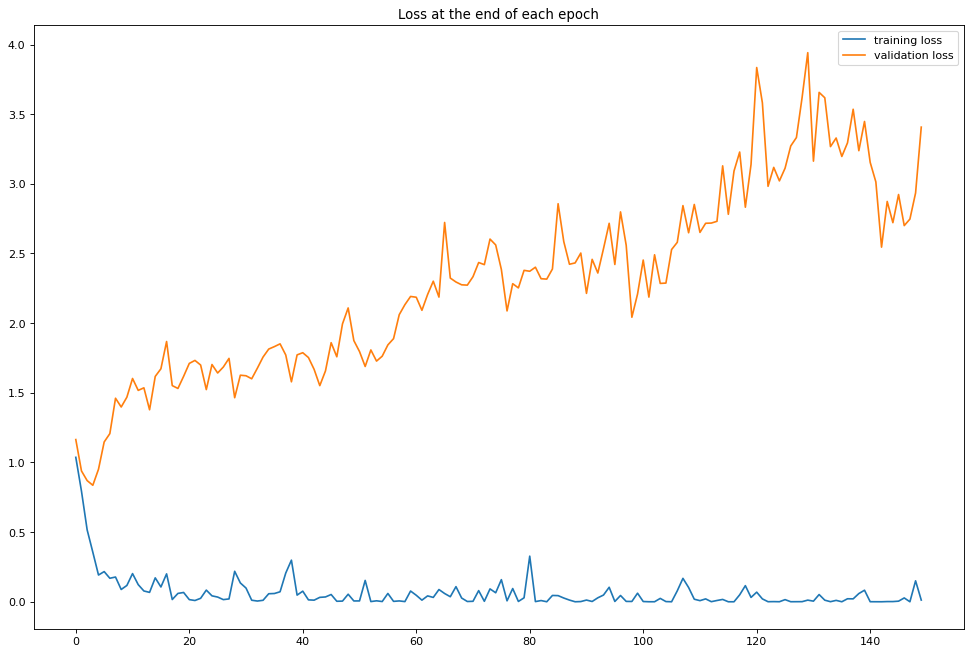

In [1762]:
## loss
trl = [loss.item() for loss in train_losses ]
tel = [loss.item() for loss in test_losses ]

figure(figsize=(15, 10), dpi=80)
plt.plot(trl, label='training loss')
plt.plot(tel, label='validation loss')
plt.title('Loss at the end of each epoch')
plt.legend();

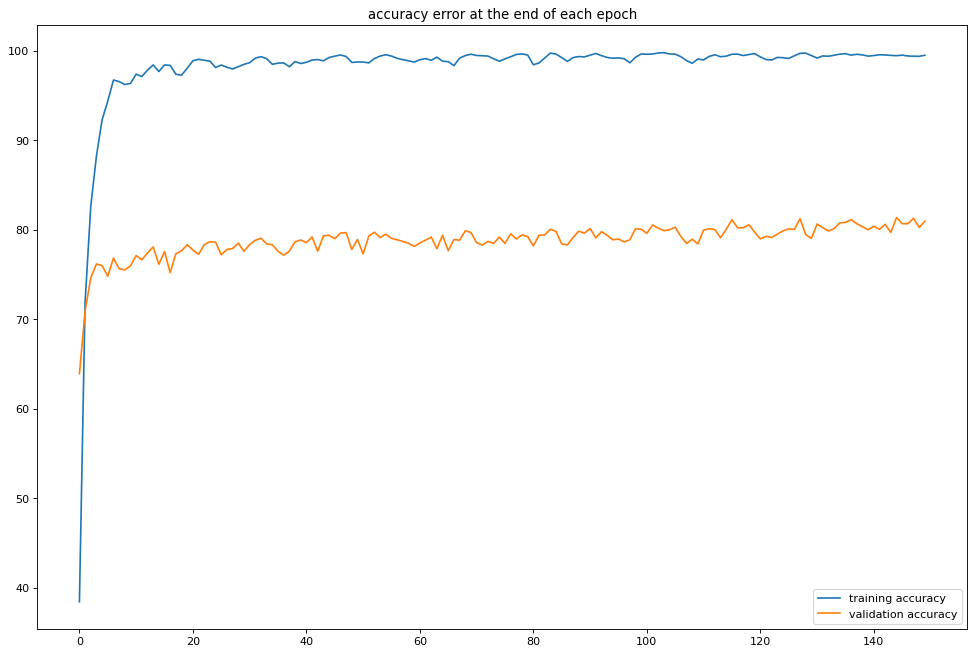

In [1763]:
## accuracy
figure(figsize=(15, 10), dpi=80)
plt.plot([t/200 for t in train_correct], label='training accuracy')
plt.plot([t/50 for t in test_correct], label='validation accuracy')
plt.title('accuracy error at the end of each epoch')
plt.legend();

In [1765]:
test_cc = [t/50 for t in test_correct]
max_index = test_cc.index(max(test_cc))
print(f'epoch with the best reslut: {max_index}')
print(f'best test accuracy is: {test_cc[max_index]}')

epoch with the best reslut: 144
best test accuracy is: 81.36000061035156


### lr = 0.5

In [1770]:
train_loader = DataLoader(train_q5, batch_size=100, shuffle=True)
val_loader = DataLoader(val_q5,batch_size=100, shuffle=True)
test_loader = DataLoader(test_q5, batch_size=500, shuffle=False)

In [1778]:
torch.manual_seed(42)
model = MultilayerPerceptron()
model

MultilayerPerceptron(
  (fc1): Linear(in_features=1568, out_features=784, bias=True)
  (fc2): Linear(in_features=784, out_features=120, bias=True)
  (fc3): Linear(in_features=120, out_features=84, bias=True)
  (fc4): Linear(in_features=84, out_features=19, bias=True)
)

In [1779]:
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.5)
# 1st training
import time
start_time = time.time()
torch.manual_seed(42)
epochs = 150
train_losses = []
test_losses = []
train_correct = []
test_correct = []

for i in range(epochs):
    trn_corr = 0
    tst_corr = 0
    
    # Run the training batches
    for b, (X_train, y_train) in enumerate(train_loader):
        b+=1
        
        # Apply the model
        y_pred = model(X_train)  
        loss = criterion(y_pred, y_train)
 
        # Tally the number of correct predictions
        predicted = torch.max(y_pred.data, 1)[1]
        batch_corr = (predicted == y_train).sum()
        trn_corr += batch_corr
        
        # Update parameters
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        # Print interim results
        if b%200 == 0:
            print(f'epoch: {i:2}  batch: {b:4} [{100*b:6}/60000]  loss: {loss.item():10.8f}  \
accuracy: {trn_corr.item()*100/(100*b):7.3f}%')
    
    # Update train loss & accuracy for the epoch
    train_losses.append(loss)
    train_correct.append(trn_corr)
        
    # Run the testing batches
    with torch.no_grad():
        for b, (X_vali, y_vali) in enumerate(test_loader):

            # Apply the model
            y_val = model(X_vali)  # Here we flatten X_test

            # Tally the number of correct predictions
            predicted = torch.max(y_val.data, 1)[1] 
            tst_corr += (predicted == y_vali).sum()
    
    # Update test loss & accuracy for the epoch
    loss = criterion(y_val, y_vali)
    test_losses.append(loss)
    test_correct.append(tst_corr)
        
print(f'\nDuration: {time.time() - start_time:.0f} seconds') # print the time elapsed            

epoch:  0  batch:  200 [ 20000/60000]  loss: 2.83202457  accuracy:   8.550%
epoch:  1  batch:  200 [ 20000/60000]  loss: 2.83711338  accuracy:   9.405%
epoch:  2  batch:  200 [ 20000/60000]  loss: 2.82349730  accuracy:   8.660%
epoch:  3  batch:  200 [ 20000/60000]  loss: 2.83457184  accuracy:   8.765%
epoch:  4  batch:  200 [ 20000/60000]  loss: 2.82189202  accuracy:   9.320%
epoch:  5  batch:  200 [ 20000/60000]  loss: 2.90477633  accuracy:   9.030%
epoch:  6  batch:  200 [ 20000/60000]  loss: 2.83563852  accuracy:   8.905%
epoch:  7  batch:  200 [ 20000/60000]  loss: 2.88640904  accuracy:   8.840%
epoch:  8  batch:  200 [ 20000/60000]  loss: 2.89946198  accuracy:   8.715%
epoch:  9  batch:  200 [ 20000/60000]  loss: 2.85119629  accuracy:   9.115%
epoch: 10  batch:  200 [ 20000/60000]  loss: 2.81457829  accuracy:   8.930%
epoch: 11  batch:  200 [ 20000/60000]  loss: 2.83775473  accuracy:   8.975%
epoch: 12  batch:  200 [ 20000/60000]  loss: 2.69786000  accuracy:   9.150%
epoch: 13  b

epoch: 108  batch:  200 [ 20000/60000]  loss: 2.84421325  accuracy:   9.130%
epoch: 109  batch:  200 [ 20000/60000]  loss: 2.81132793  accuracy:   8.965%
epoch: 110  batch:  200 [ 20000/60000]  loss: 2.71434903  accuracy:   9.220%
epoch: 111  batch:  200 [ 20000/60000]  loss: 2.85178471  accuracy:   9.190%
epoch: 112  batch:  200 [ 20000/60000]  loss: 2.97340107  accuracy:   8.860%
epoch: 113  batch:  200 [ 20000/60000]  loss: 2.72473598  accuracy:   8.950%
epoch: 114  batch:  200 [ 20000/60000]  loss: 2.87149358  accuracy:   9.190%
epoch: 115  batch:  200 [ 20000/60000]  loss: 2.78650761  accuracy:   9.395%
epoch: 116  batch:  200 [ 20000/60000]  loss: 2.75146770  accuracy:   9.060%
epoch: 117  batch:  200 [ 20000/60000]  loss: 2.93625998  accuracy:   8.875%
epoch: 118  batch:  200 [ 20000/60000]  loss: 2.93880820  accuracy:   8.870%
epoch: 119  batch:  200 [ 20000/60000]  loss: 2.78282142  accuracy:   8.955%
epoch: 120  batch:  200 [ 20000/60000]  loss: 2.75555754  accuracy:   8.925%

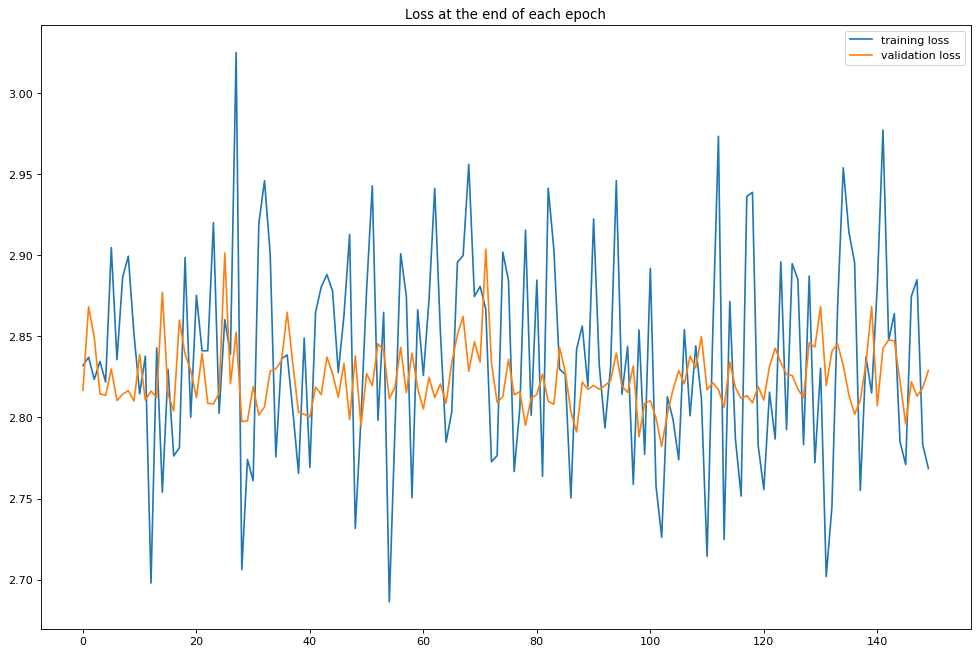

In [1780]:
## loss
trl = [loss.item() for loss in train_losses ]
tel = [loss.item() for loss in test_losses ]

figure(figsize=(15, 10), dpi=80)
plt.plot(trl, label='training loss')
plt.plot(tel, label='validation loss')
plt.title('Loss at the end of each epoch')
plt.legend();

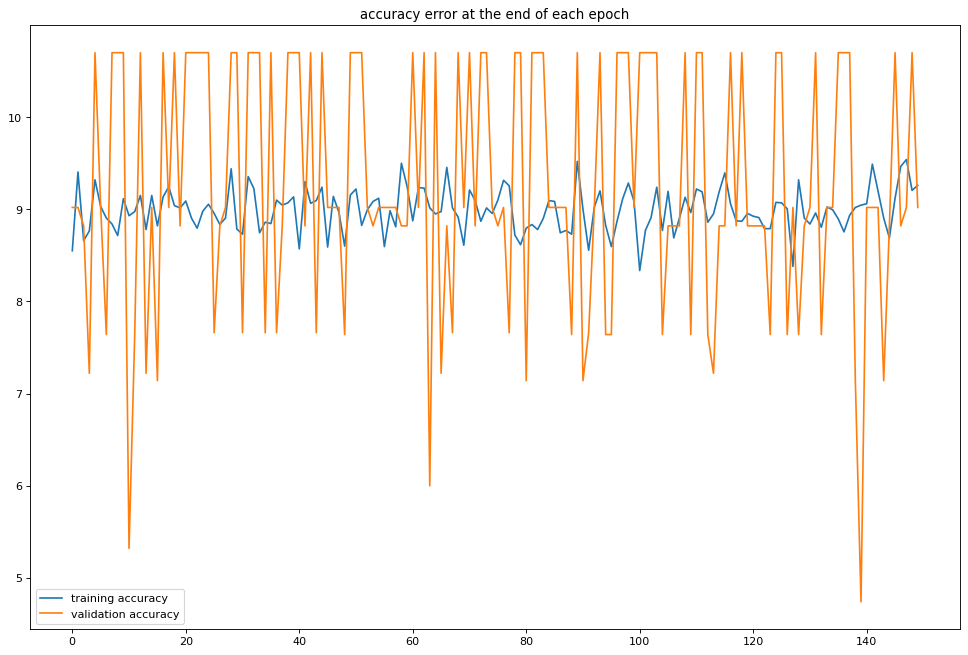

In [1781]:
## accuracy
figure(figsize=(15, 10), dpi=80)
plt.plot([t/200 for t in train_correct], label='training accuracy')
plt.plot([t/50 for t in test_correct], label='validation accuracy')
plt.title('accuracy error at the end of each epoch')
plt.legend();

In [1782]:
test_cc = [t/50 for t in test_correct]
max_index = test_cc.index(max(test_cc))
print(f'epoch with the best reslut: {max_index}')
print(f'best test accuracy is: {test_cc[max_index]}')

epoch with the best reslut: 4
best test accuracy is: 10.699999809265137


### CNN

In [1799]:
class CustomerDataset(Dataset):
    def __init__(self, file_path):
        file_out = pd.read_table(file_path,sep=',',names=range(1569))
        X = np.array(file_out.iloc[:,:1568].values).reshape(file_out.shape[0],28,56)
#         empty = []
        
#         for i in range (int(X.shape[0]/2)):
#             X = np.concatenate((temp1[0],temp1[1]),0)
#             empty.append(X)
#             i+=2
#         X = empty
        y = file_out.iloc[:,1568].values
        # convert to tensor
        self.X = torch.tensor(X,dtype=torch.float32)
        self.y = torch.tensor(y)
        
    def __len__(self):
        return len(self.y) 
    
    def __getitem__(self,idx):
        return self.X[idx],self.y[idx]
        

In [1800]:
train_q5 = CustomerDataset(train_path)
val_q5 = CustomerDataset(val_path)
test_q5 = CustomerDataset(test_path)

In [1801]:
train_loader = DataLoader(train_q5, batch_size=10, shuffle=True)
val_loader = DataLoader(val_q5,batch_size=10, shuffle=True)
test_loader = DataLoader(test_q5, batch_size=10, shuffle=False)

In [1802]:
class ConvolutionalNetwork(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(1, 6, 3, 1)
        self.conv2 = nn.Conv2d(6, 16, 3, 1)
        self.fc1 = nn.Linear(5*12*16, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84,19)

    def forward(self, X):
        X = F.relu(self.conv1(X))
        X = F.max_pool2d(X, 2, 2)    
        X = F.relu(self.conv2(X))
        X = F.max_pool2d(X, 2, 2)
        X = X.view(-1, 5*12*16)
        X = F.relu(self.fc1(X))
        X = F.relu(self.fc2(X))
        X = self.fc3(X)
        return F.log_softmax(X, dim=1)

In [1803]:
torch.manual_seed(42)
cnn_model = ConvolutionalNetwork()
cnn_model

ConvolutionalNetwork(
  (conv1): Conv2d(1, 6, kernel_size=(3, 3), stride=(1, 1))
  (conv2): Conv2d(6, 16, kernel_size=(3, 3), stride=(1, 1))
  (fc1): Linear(in_features=960, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=84, bias=True)
  (fc3): Linear(in_features=84, out_features=19, bias=True)
)

In [1709]:
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(cnn_model.parameters(), lr=0.001)

In [1710]:

import time
start_time = time.time()
torch.manual_seed(42)
epochs = 70
train_losses = []
test_losses = []
train_correct = []
test_correct = []

for i in range(epochs):
    trn_corr = 0
    tst_corr = 0
    
    # Run the training batches
    for b, (X_train, y_train) in enumerate(train_loader):
        b+=1
        
        # Apply the model
        y_pred = cnn_model(X_train.view(10,1,28,56)) 
        loss = criterion(y_pred, y_train)
 
        # Tally the number of correct predictions
        predicted = torch.max(y_pred.data, 1)[1]
        batch_corr = (predicted == y_train).sum()
        trn_corr += batch_corr
        
        # Update parameters
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        # Print interim results
        if b%600 == 0 and i%10==0:
            print(f'epoch: {i:2}  batch: {b:4} [{10*b:6}/60000]  loss: {loss.item():10.8f}  \
accuracy: {trn_corr.item()*100/(10*b):7.3f}%')
        
    train_losses.append(loss)
    train_correct.append(trn_corr)
        
    # Run the testing batches
    with torch.no_grad():
        for b, (X_vali, y_vali) in enumerate(val_loader):

            # Apply the model
            y_val = cnn_model(X_vali.view(10,1,28,56))

            # Tally the number of correct predictions
            predicted = torch.max(y_val.data, 1)[1] 
            tst_corr += (predicted == y_vali).sum()
            
    loss = criterion(y_val, y_vali)
    test_losses.append(loss)
    test_correct.append(tst_corr)
        
print(f'\nDuration: {time.time() - start_time:.0f} seconds') # print the time elapsed            

epoch:  0  batch:  600 [  6000/60000]  loss: 2.45193720  accuracy:  12.567%
epoch:  0  batch: 1200 [ 12000/60000]  loss: 1.95093596  accuracy:  19.508%
epoch:  0  batch: 1800 [ 18000/60000]  loss: 1.45480847  accuracy:  26.933%
epoch: 10  batch:  600 [  6000/60000]  loss: 0.06125475  accuracy:  97.600%
epoch: 10  batch: 1200 [ 12000/60000]  loss: 0.06559862  accuracy:  97.017%
epoch: 10  batch: 1800 [ 18000/60000]  loss: 0.22830176  accuracy:  96.711%
epoch: 20  batch:  600 [  6000/60000]  loss: 0.00678120  accuracy:  99.167%
epoch: 20  batch: 1200 [ 12000/60000]  loss: 0.00021980  accuracy:  98.742%
epoch: 20  batch: 1800 [ 18000/60000]  loss: 0.01231803  accuracy:  98.567%
epoch: 30  batch:  600 [  6000/60000]  loss: 0.00005814  accuracy:  99.383%
epoch: 30  batch: 1200 [ 12000/60000]  loss: 0.00109983  accuracy:  99.283%
epoch: 30  batch: 1800 [ 18000/60000]  loss: 0.00002539  accuracy:  99.194%
epoch: 40  batch:  600 [  6000/60000]  loss: 0.00716525  accuracy:  99.583%
epoch: 40  b

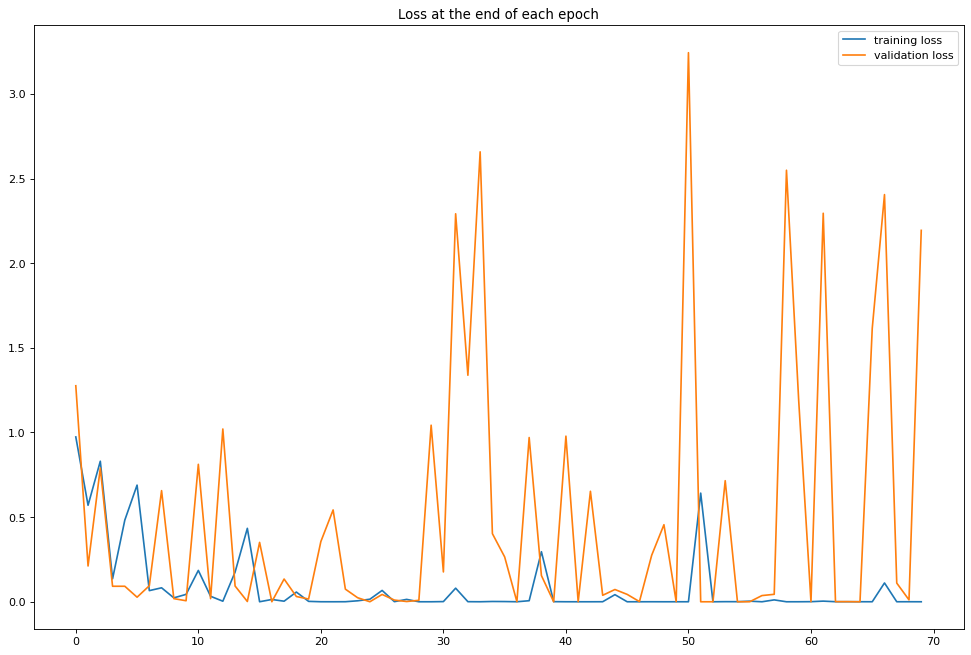

In [1711]:
## loss
trl = [loss.item() for loss in train_losses ]
tel = [loss.item() for loss in test_losses ]

figure(figsize=(15, 10), dpi=80)
plt.plot(trl, label='training loss')
plt.plot(tel, label='validation loss')
plt.title('Loss at the end of each epoch')
plt.legend();

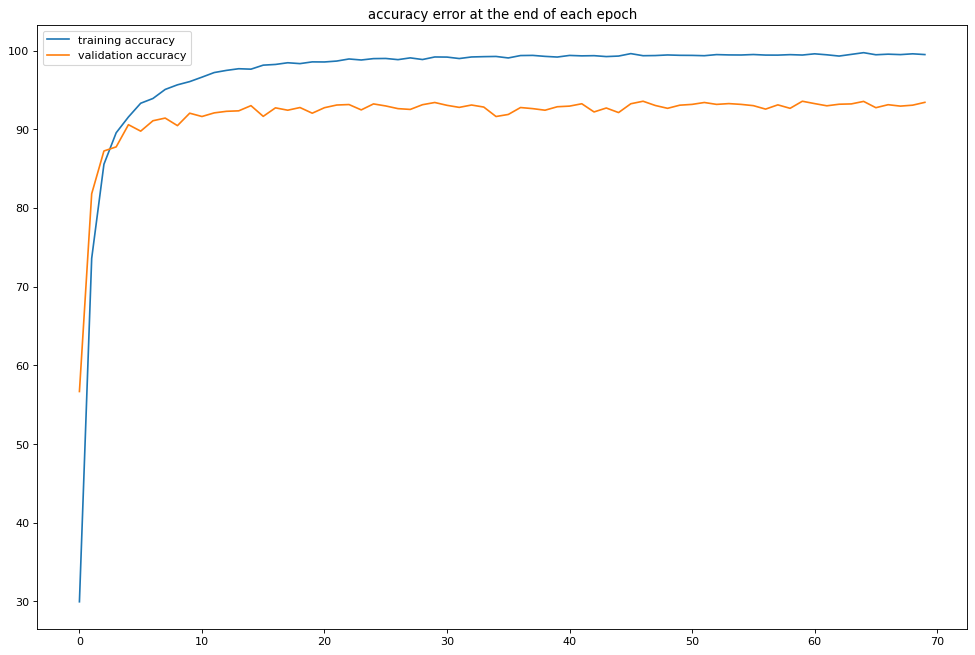

In [1712]:
## accuracy
figure(figsize=(15, 10), dpi=80)
plt.plot([t/200 for t in train_correct], label='training accuracy')
plt.plot([t/50 for t in test_correct], label='validation accuracy')
plt.title('accuracy error at the end of each epoch')
plt.legend();

In [1713]:
# Extract the data all at once, not in batches
test_load_all = DataLoader(test_q5, batch_size=5000, shuffle=False)

In [1714]:
with torch.no_grad():
    correct = 0
    for X_test, y_test in test_load_all:
        y_val = cnn_model(X_test.view(5000,1,28,56))  # we don't flatten the data this time
        predicted = torch.max(y_val,1)[1]
        correct += (predicted == y_test).sum()
print(f'Test accuracy: {correct.item()}/{len(X_test)} = {correct.item()*100/(len(X_test)):7.3f}%')

Test accuracy: 4698/5000 =  93.960%


In [1715]:
train_cc = [t/200 for t in train_correct]

In [1716]:
test_cc = [t/50 for t in test_correct]


In [1717]:
max_index = test_cc.index(max(test_cc))
max_index

46

## c

In [ ]:
weights = []
for wei in cnn_model.parameters():
    weights.append(wei.detach().cpu().numpy())

    
for wei in weights:
    print(wei.shape)

In [ ]:

# Assemble to images.
fc_images = weights[4].reshape(10, 12, 20, 20)
pad_images = np.zeros((10, 12, 30, 30))
pad_images[:, :, 10:30, 10:30] = fc_images
fc_vis = np.transpose(pad_images, (0, 2, 1, 3)).reshape(300, 360)

# Show weights.
figure(figsize=(15, 20), dpi=80)
plt.figure(figsize=(12, 12))
plt.imshow(fc_vis, cmap='gray')
plt.title("Learned W for multiple layers.")
plt.axis("off")
plt.show()

### lr = 0.2

In [1805]:
train_loader = DataLoader(train_q5, batch_size=10, shuffle=True)
val_loader = DataLoader(val_q5,batch_size=10, shuffle=True)
test_loader = DataLoader(test_q5, batch_size=10, shuffle=False)

In [1808]:
torch.manual_seed(42)
cnn_model = ConvolutionalNetwork()
cnn_model

ConvolutionalNetwork(
  (conv1): Conv2d(1, 6, kernel_size=(3, 3), stride=(1, 1))
  (conv2): Conv2d(6, 16, kernel_size=(3, 3), stride=(1, 1))
  (fc1): Linear(in_features=960, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=84, bias=True)
  (fc3): Linear(in_features=84, out_features=19, bias=True)
)

In [1809]:
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(cnn_model.parameters(), lr=0.2)

import time
start_time = time.time()
torch.manual_seed(42)
epochs = 70
train_losses = []
test_losses = []
train_correct = []
test_correct = []

for i in range(epochs):
    trn_corr = 0
    tst_corr = 0
    
    # Run the training batches
    for b, (X_train, y_train) in enumerate(train_loader):
        b+=1
        
        # Apply the model
        y_pred = cnn_model(X_train.view(10,1,28,56)) 
        loss = criterion(y_pred, y_train)
 
        # Tally the number of correct predictions
        predicted = torch.max(y_pred.data, 1)[1]
        batch_corr = (predicted == y_train).sum()
        trn_corr += batch_corr
        
        # Update parameters
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        # Print interim results
        if b%600 == 0 and i%10==0:
            print(f'epoch: {i:2}  batch: {b:4} [{10*b:6}/60000]  loss: {loss.item():10.8f}  \
accuracy: {trn_corr.item()*100/(10*b):7.3f}%')
        
    train_losses.append(loss)
    train_correct.append(trn_corr)
        
    # Run the testing batches
    with torch.no_grad():
        for b, (X_vali, y_vali) in enumerate(val_loader):

            # Apply the model
            y_val = cnn_model(X_vali.view(10,1,28,56))

            # Tally the number of correct predictions
            predicted = torch.max(y_val.data, 1)[1] 
            tst_corr += (predicted == y_vali).sum()
            
    loss = criterion(y_val, y_vali)
    test_losses.append(loss)
    test_correct.append(tst_corr)
        
print(f'\nDuration: {time.time() - start_time:.0f} seconds') # print the time elapsed            

epoch:  0  batch:  600 [  6000/60000]  loss: 2.83128095  accuracy:   9.050%
epoch:  0  batch: 1200 [ 12000/60000]  loss: 2.85656953  accuracy:   8.975%
epoch:  0  batch: 1800 [ 18000/60000]  loss: 2.95758176  accuracy:   8.900%
epoch: 10  batch:  600 [  6000/60000]  loss: 2.58340883  accuracy:   9.250%
epoch: 10  batch: 1200 [ 12000/60000]  loss: 2.96311903  accuracy:   8.850%
epoch: 10  batch: 1800 [ 18000/60000]  loss: 2.81125093  accuracy:   8.778%
epoch: 20  batch:  600 [  6000/60000]  loss: 2.96598911  accuracy:   8.450%
epoch: 20  batch: 1200 [ 12000/60000]  loss: 2.77917218  accuracy:   8.625%
epoch: 20  batch: 1800 [ 18000/60000]  loss: 2.61734557  accuracy:   8.800%
epoch: 30  batch:  600 [  6000/60000]  loss: 3.24664259  accuracy:   8.883%
epoch: 30  batch: 1200 [ 12000/60000]  loss: 3.18627691  accuracy:   9.050%
epoch: 30  batch: 1800 [ 18000/60000]  loss: 2.80974507  accuracy:   8.706%
epoch: 40  batch:  600 [  6000/60000]  loss: 2.93477535  accuracy:   8.083%
epoch: 40  b

In [ ]:
## loss
trl = [loss.item() for loss in train_losses ]
tel = [loss.item() for loss in test_losses ]

figure(figsize=(15, 10), dpi=80)
plt.plot(trl, label='training loss')
plt.plot(tel, label='validation loss')
plt.title('Loss at the end of each epoch')
plt.legend();

In [ ]:
## accuracy
figure(figsize=(15, 10), dpi=80)
plt.plot([t/200 for t in train_correct], label='training accuracy')
plt.plot([t/50 for t in test_correct], label='validation accuracy')
plt.title('accuracy error at the end of each epoch')
plt.legend();

In [ ]:
test_cc = [t/100 for t in test_correct]
max_index = test_cc.index(max(test_cc))
print(f'epoch with the best reslut: {max_index}')
print(f'best test accuracy is: {test_cc[max_index]}')

### lr = 0.5

In [ ]:
train_loader = DataLoader(train_q5, batch_size=10, shuffle=True)
val_loader = DataLoader(val_q5,batch_size=10, shuffle=True)
test_loader = DataLoader(test_q5, batch_size=10, shuffle=False)

In [1723]:
torch.manual_seed(42)
cnn_model = ConvolutionalNetwork()
cnn_model

ConvolutionalNetwork(
  (conv1): Conv2d(1, 6, kernel_size=(3, 3), stride=(1, 1))
  (conv2): Conv2d(6, 16, kernel_size=(3, 3), stride=(1, 1))
  (fc1): Linear(in_features=960, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=84, bias=True)
  (fc3): Linear(in_features=84, out_features=19, bias=True)
)

In [1724]:
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(cnn_model.parameters(), lr=0.2)
import time
start_time = time.time()
torch.manual_seed(42)
epochs = 70
train_losses = []
test_losses = []
train_correct = []
test_correct = []

for i in range(epochs):
    trn_corr = 0
    tst_corr = 0
    
    # Run the training batches
    for b, (X_train, y_train) in enumerate(train_loader):
        b+=1
        
        # Apply the model
        y_pred = cnn_model(X_train.view(10,1,28,56)) 
        loss = criterion(y_pred, y_train)
 
        # Tally the number of correct predictions
        predicted = torch.max(y_pred.data, 1)[1]
        batch_corr = (predicted == y_train).sum()
        trn_corr += batch_corr
        
        # Update parameters
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        # Print interim results
        if b%600 == 0 and i%10==0:
            print(f'epoch: {i:2}  batch: {b:4} [{10*b:6}/60000]  loss: {loss.item():10.8f}  \
accuracy: {trn_corr.item()*100/(10*b):7.3f}%')
        
    train_losses.append(loss)
    train_correct.append(trn_corr)
        
    # Run the testing batches
    with torch.no_grad():
        for b, (X_vali, y_vali) in enumerate(val_loader):

            # Apply the model
            y_val = cnn_model(X_vali.view(10,1,28,56))

            # Tally the number of correct predictions
            predicted = torch.max(y_val.data, 1)[1] 
            tst_corr += (predicted == y_vali).sum()
            
    loss = criterion(y_val, y_vali)
    test_losses.append(loss)
    test_correct.append(tst_corr)
        
print(f'\nDuration: {time.time() - start_time:.0f} seconds') # print the time elapsed            

epoch:  0  batch:  600 [  6000/60000]  loss: 2.83128095  accuracy:   9.050%
epoch:  0  batch: 1200 [ 12000/60000]  loss: 2.85656953  accuracy:   8.975%
epoch:  0  batch: 1800 [ 18000/60000]  loss: 2.95758176  accuracy:   8.900%
epoch: 10  batch:  600 [  6000/60000]  loss: 2.58340883  accuracy:   9.250%
epoch: 10  batch: 1200 [ 12000/60000]  loss: 2.96311903  accuracy:   8.850%
epoch: 10  batch: 1800 [ 18000/60000]  loss: 2.81125093  accuracy:   8.778%
epoch: 20  batch:  600 [  6000/60000]  loss: 2.96598911  accuracy:   8.450%
epoch: 20  batch: 1200 [ 12000/60000]  loss: 2.77917218  accuracy:   8.625%
epoch: 20  batch: 1800 [ 18000/60000]  loss: 2.61734557  accuracy:   8.800%
epoch: 30  batch:  600 [  6000/60000]  loss: 3.24664259  accuracy:   8.883%
epoch: 30  batch: 1200 [ 12000/60000]  loss: 3.18627691  accuracy:   9.050%
epoch: 30  batch: 1800 [ 18000/60000]  loss: 2.80974507  accuracy:   8.706%
epoch: 40  batch:  600 [  6000/60000]  loss: 2.93477535  accuracy:   8.083%
epoch: 40  b

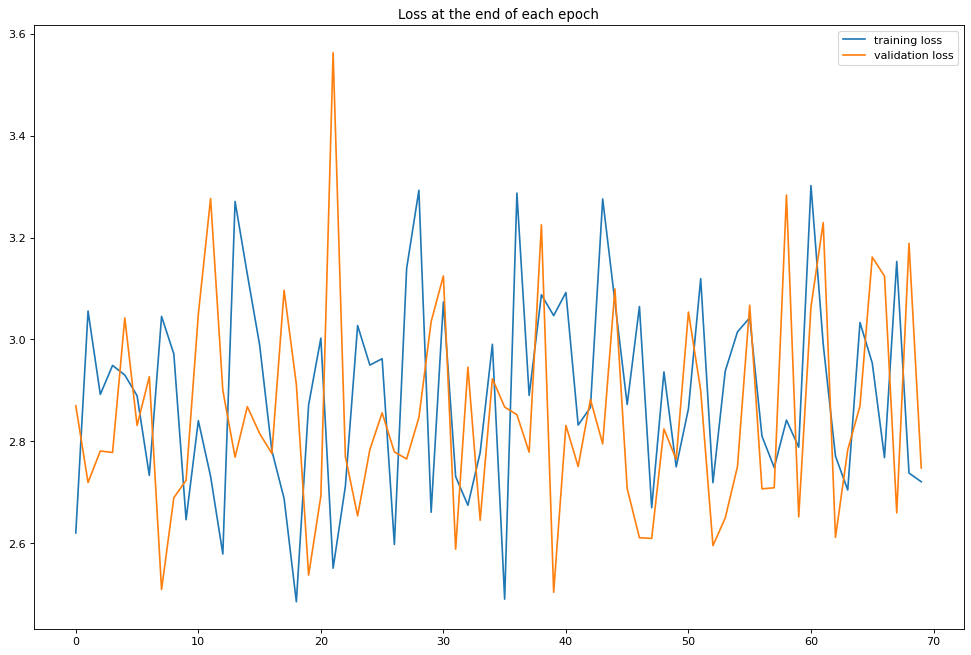

In [1725]:
## loss
trl = [loss.item() for loss in train_losses ]
tel = [loss.item() for loss in test_losses ]

figure(figsize=(15, 10), dpi=80)
plt.plot(trl, label='training loss')
plt.plot(tel, label='validation loss')
plt.title('Loss at the end of each epoch')
plt.legend();

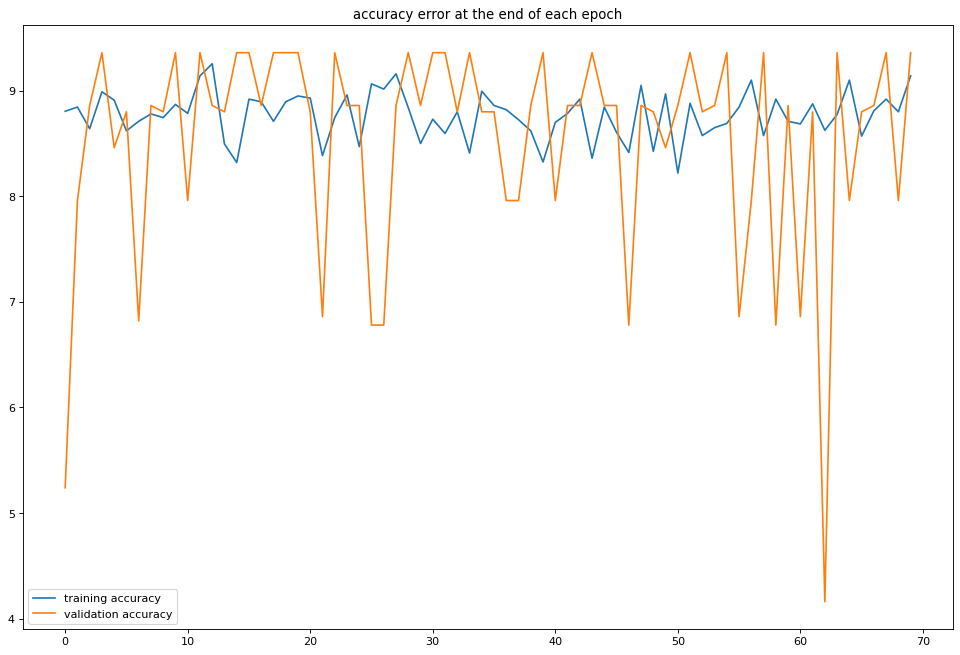

In [1726]:
## accuracy
figure(figsize=(15, 10), dpi=80)
plt.plot([t/200 for t in train_correct], label='training accuracy')
plt.plot([t/50 for t in test_correct], label='validation accuracy')
plt.title('accuracy error at the end of each epoch')
plt.legend();

In [1727]:
test_cc = [t/100 for t in test_correct]
max_index = test_cc.index(max(test_cc))
print(f'epoch with the best reslut: {max_index}')
print(f'best test accuracy is: {test_cc[max_index]}')

epoch with the best reslut: 3
best test accuracy is: 4.679999828338623
